# <span style = "color:red;">PROJECT - Cardiovascular Risk Prediction</span>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

##### Project Type   - Classification Algorithm 
##### Contribution   - Individual

![sample image](Heart.jpeg)

 # <span style = "color:red;">Data Description</span>

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [2]:
#libraries used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt#For visualizations
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature datas
from sklearn.impute import KNNImputer, SimpleImputer#for outlier handling
# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from sklearn.feature_selection import mutual_info_classif#For information gain analysis
from imblearn.over_sampling import SMOTE#for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset to dataframe named 'data_df'
data_df=pd.read_csv("data_cardiovascular_risk.csv")

 # <span style = "color:red;">Data preprocessing</span>


In [ ]:
data_df.head()#how does the data set looklike...?

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
data_df=data_df.drop(columns=['id'])#'id' feature has no relevence in this analysis so droping it from further analysis

In [ ]:
#Checking dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [ ]:
#Creating two variables for categorical and numerical feature for further analysis
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
#Running describe function
data_df[num_features].describe()

age      totChol   cigsPerDay       sysBP        diaBP  \
count  3390.000000  3352.000000  3368.000000  3390.00000  3390.000000   
mean     49.542183   237.074284     9.069477   132.60118    82.883038   
std       8.592878    45.247430    11.879078    22.29203    12.023581   
min      32.000000   107.000000     0.000000    83.50000    48.000000   
25%      42.000000   206.000000     0.000000   117.00000    74.500000   
50%      49.000000   234.000000     0.000000   128.50000    82.000000   
75%      56.000000   264.000000    20.000000   144.00000    90.000000   
max      70.000000   696.000000    70.000000   295.00000   142.500000   

               BMI    heartRate      glucose  
count  3376.000000  3389.000000  3086.000000  
mean     25.794964    75.977279    82.086520  
std       4.115449    11.971868    24.244753  
min      15.960000    45.000000    40.000000  
25%      23.020000    68.000000    71.000000  
50%      25.380000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      56.800000   143.000000   394.000000

In [ ]:
#label Encoding categorical features for further better analysis
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

## NaN value handling

In [ ]:
#Checking Nan Value count
data_df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

For Nan value handling, simple imputer("most_frequent") for categorical features and Knn imputer for numerical features is implemented.

In [ ]:
#Implementing simple imputer on categorical features
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [ ]:
#Implementing Knn imputer on numerical features
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

## Distribution and outlier analysis

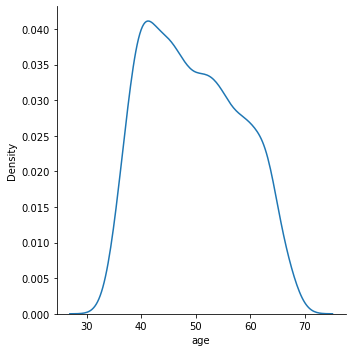

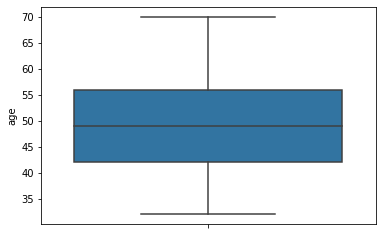

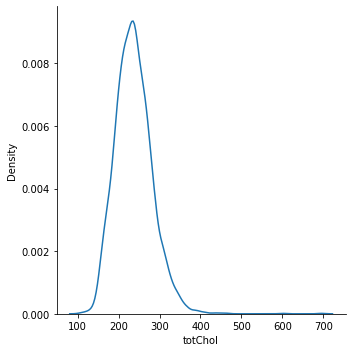

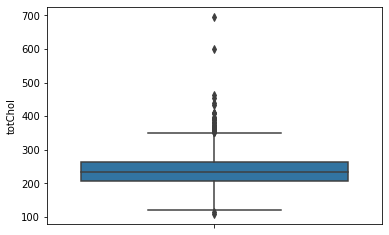

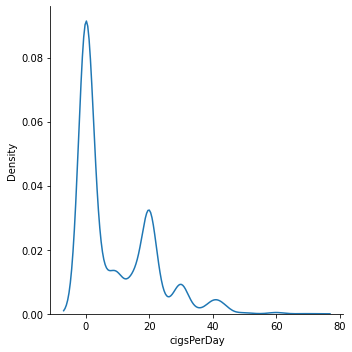

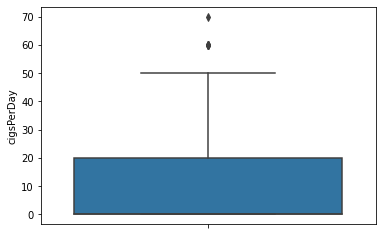

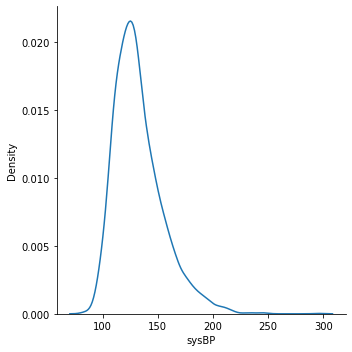

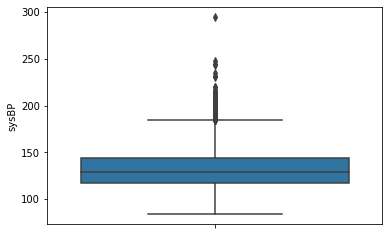

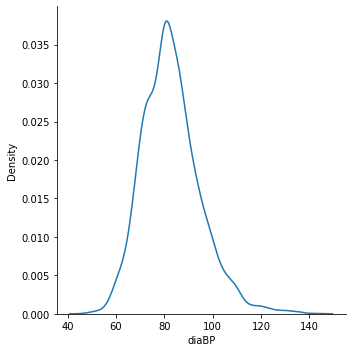

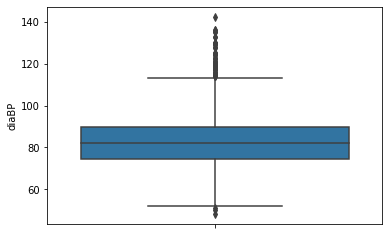

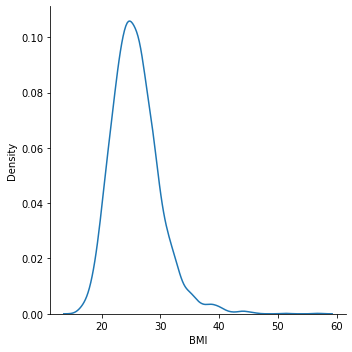

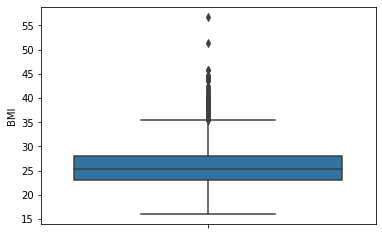

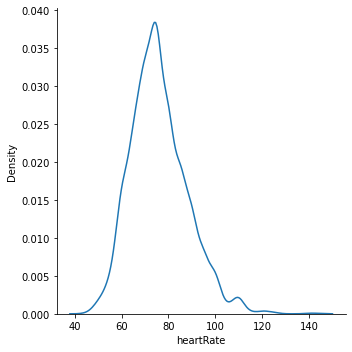

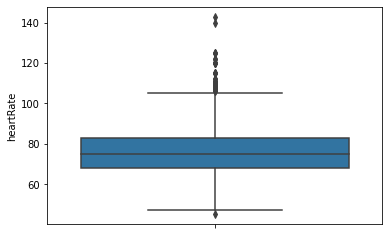

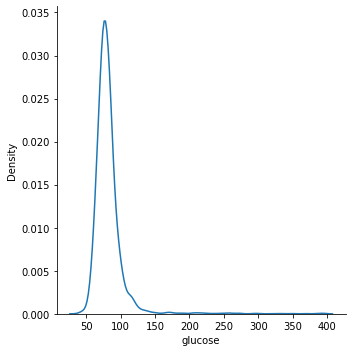

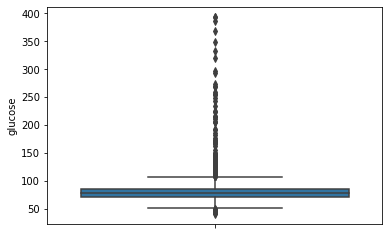

In [ ]:
#Disrtribution and outlier analysis
for v in num_features:
   sns.displot(data=data_df, x=v, kind="kde")#displot for distribution analysis
   plt.show()

   sns.boxplot(data=data_df,y=v)#boxplot for outlier analysis
   plt.show()

REMARKS:

1.   No outliers and good distribution is observed in age feature.
2.   Outliers are observed in 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose' features.

So, in order to handle those outliers IQR method is implemented.


In [ ]:
#Implementing IQR method 
for v in ['totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']:
   vals = data_df[v].quantile([0.25,0.75])
   iqr = vals.values[1] - vals.values[0]
   min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
   #Assigning those outliers with min and max values
   data_df[v] = data_df[v].apply(lambda x : min_lim if x < min_lim else x)
   data_df[v] = data_df[v].apply(lambda x : max_lim if x > max_lim else x)

Since 'glucose' feature is having very high outliers, Iam assigning max limit as 145(because in medical terms glucose level above 145 is considered to be high)


In [ ]:
#Implementing IQR method 
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


# Exploratory Data Analysis

In exploratory data analysis the approach used is ,


*   All categorical features is analysed w.r.t each other and the target variable
*   All numerical features is analysed w.r.t each other ,target feature and categorical features 





## Analysing each categorical feature with respect to each other

  To understand data concerning categorical features, I used count plot and barplot(to understand percentage distribution) and analyzed each feature with respect to each other.

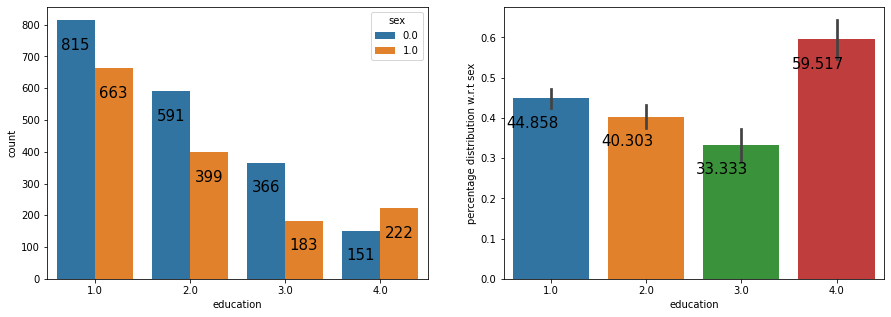

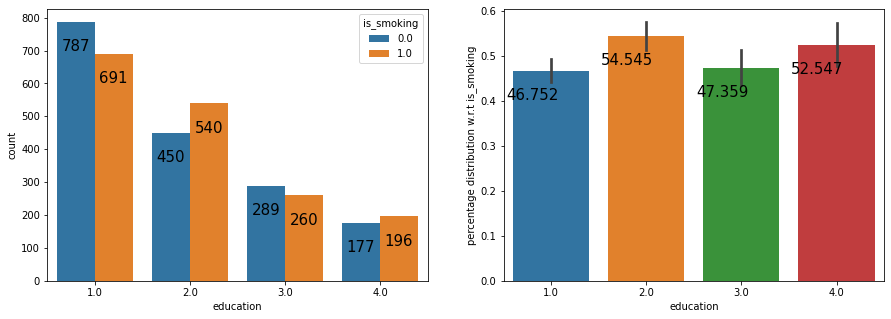

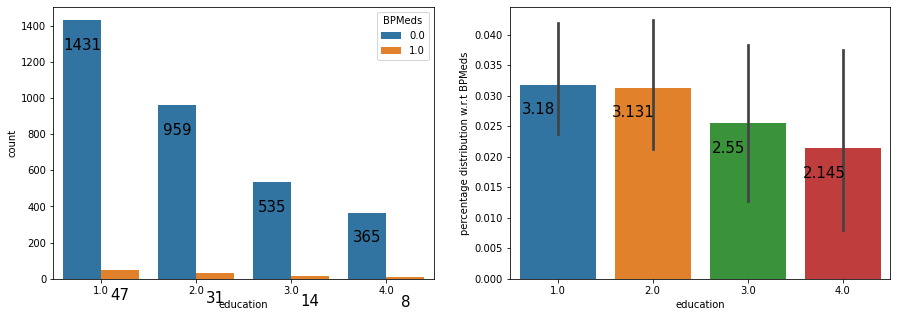

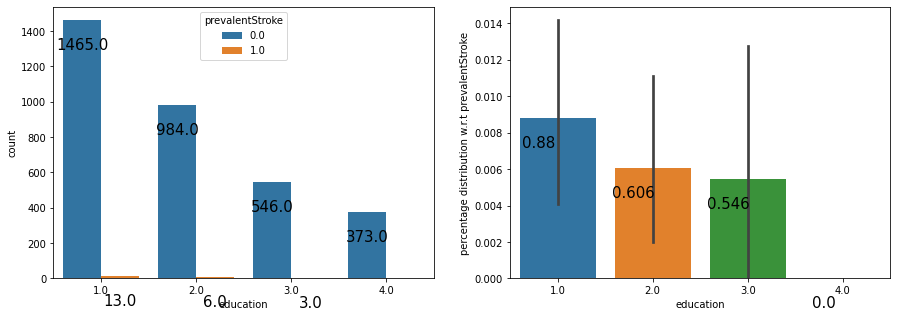

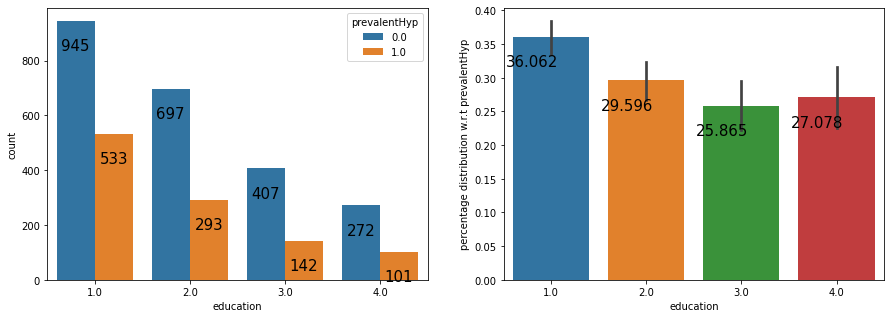

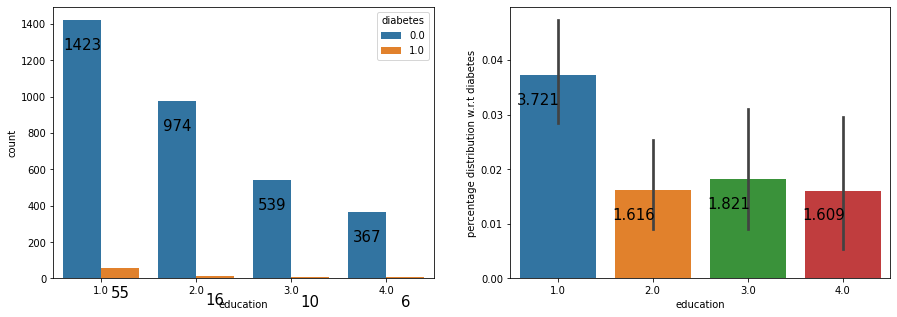

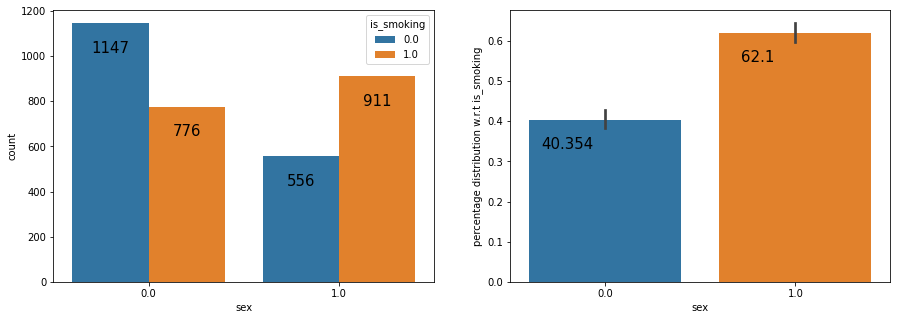

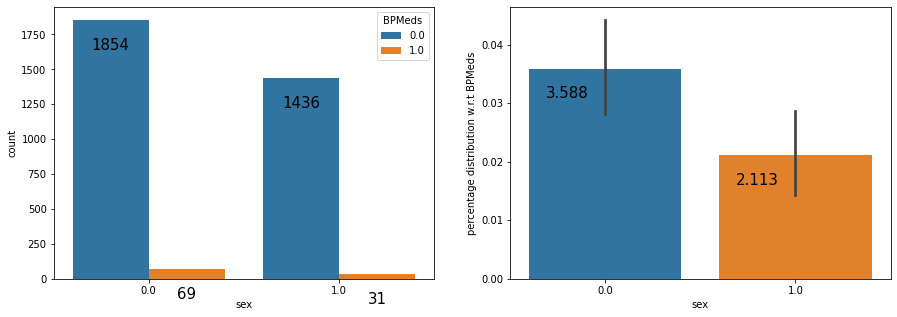

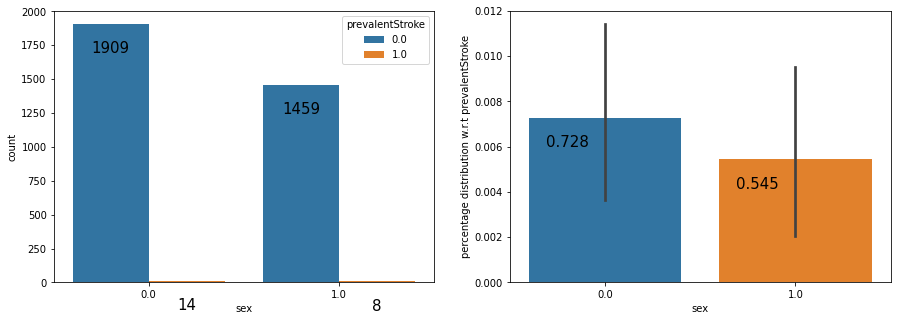

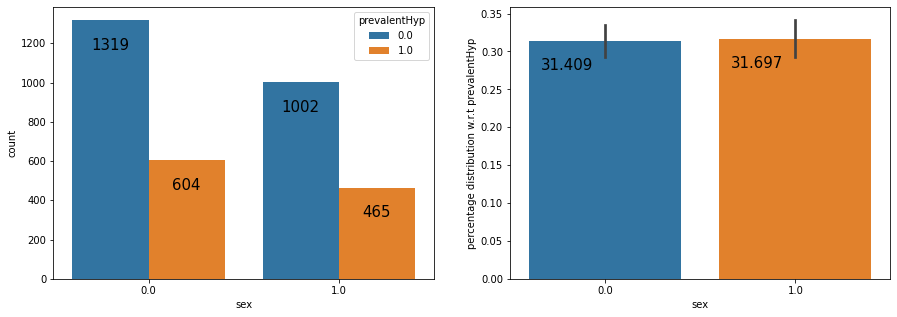

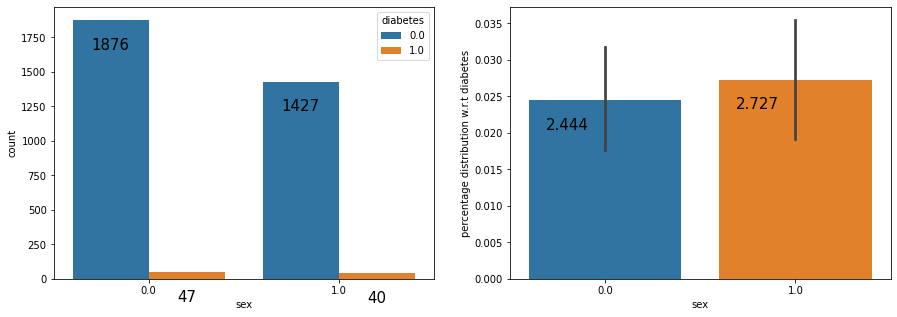

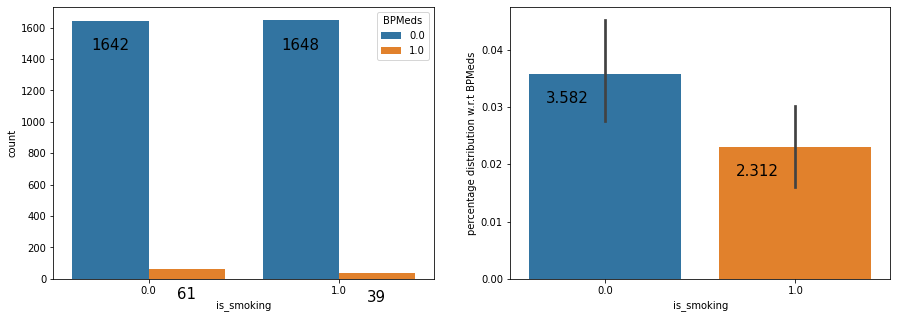

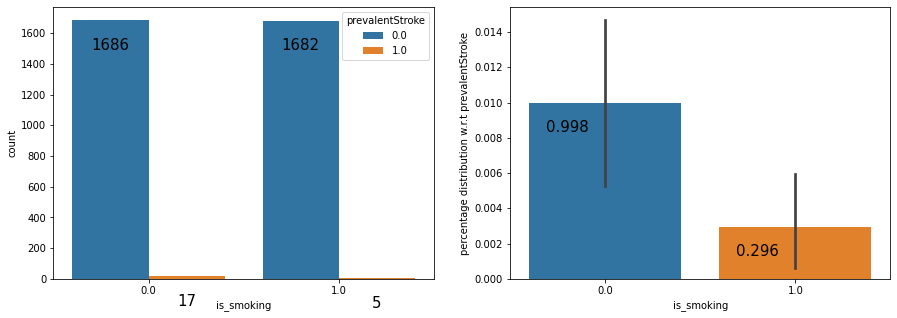

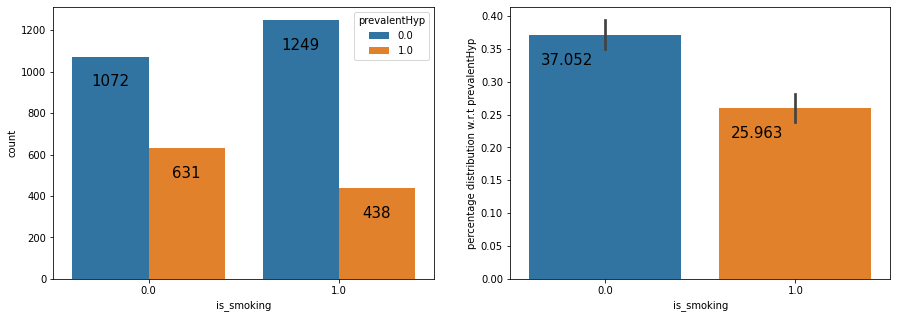

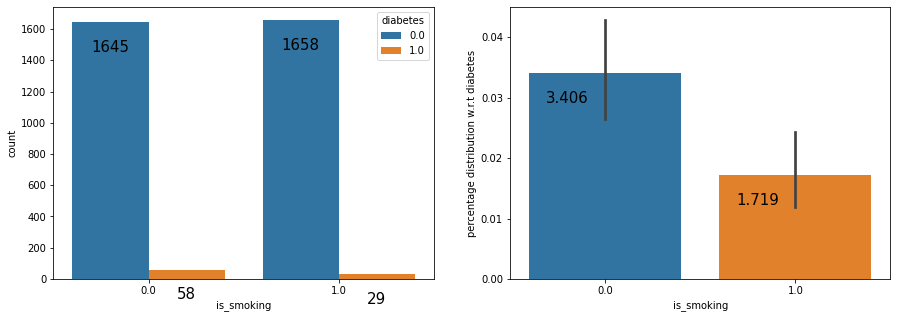

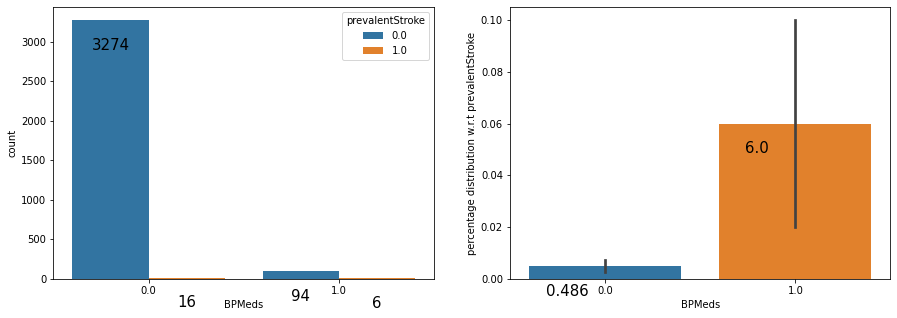

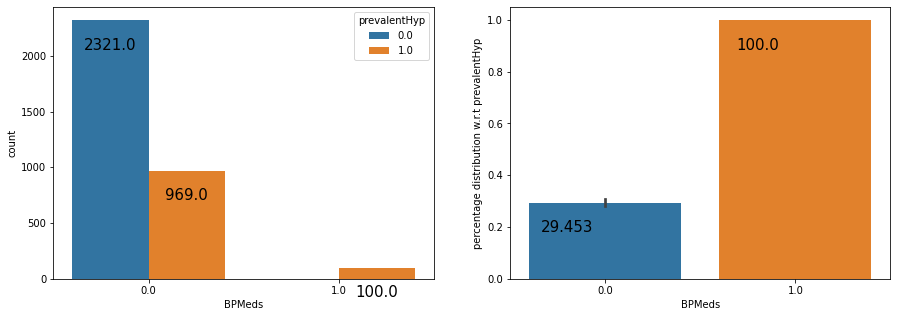

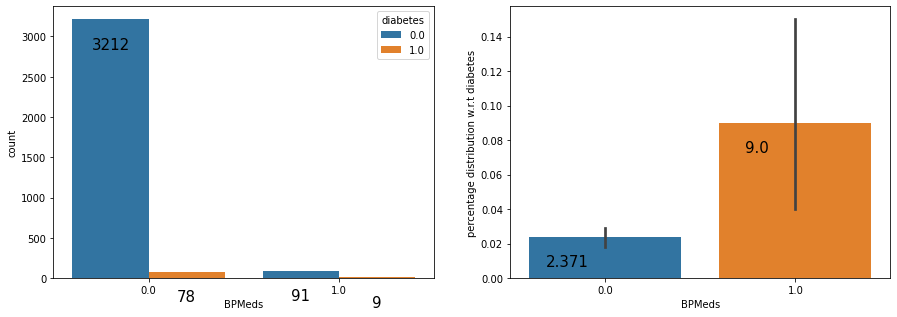

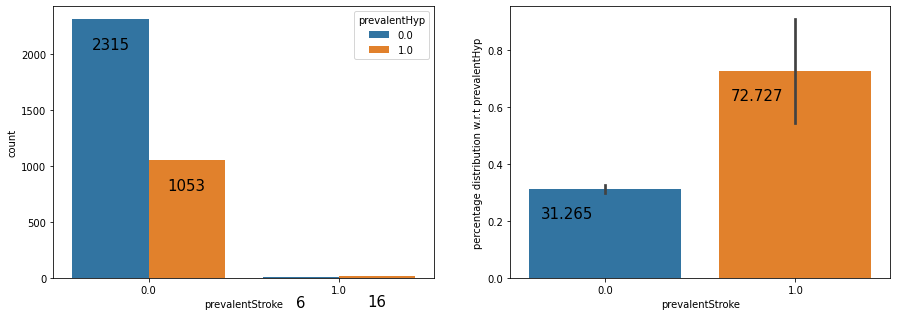

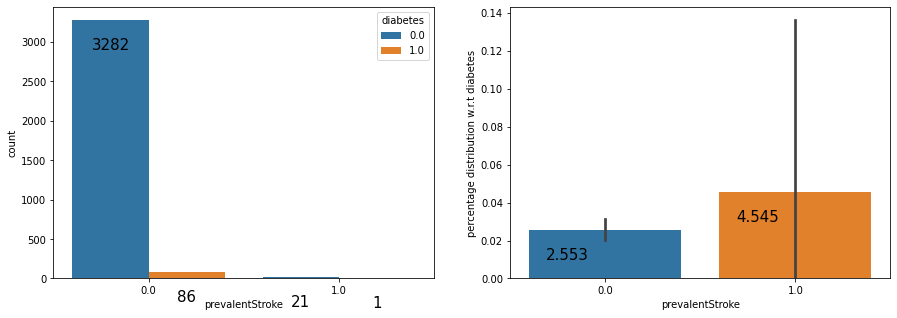

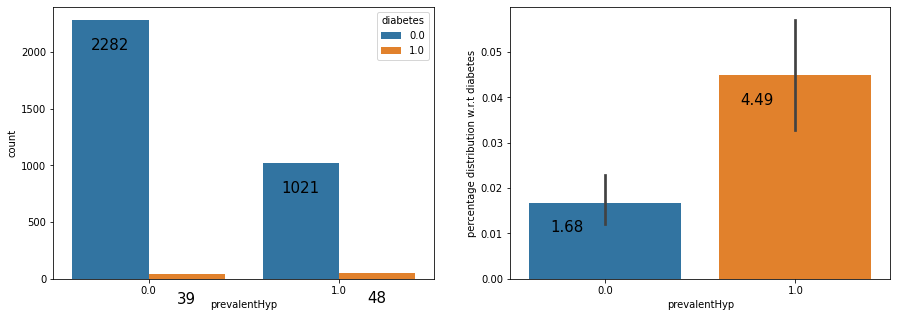

In [ ]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  i=i+1
  for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh=sns.barplot(v,z, data = data_df, ax=axes[1])#barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   Males have higher chance to be a smoker.
*   Non-smokers tend to have a bit higher chance(37%) of hypertension issues compared to smokers(25%).
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance(72%) of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.









## Categorical features with respect to target feature

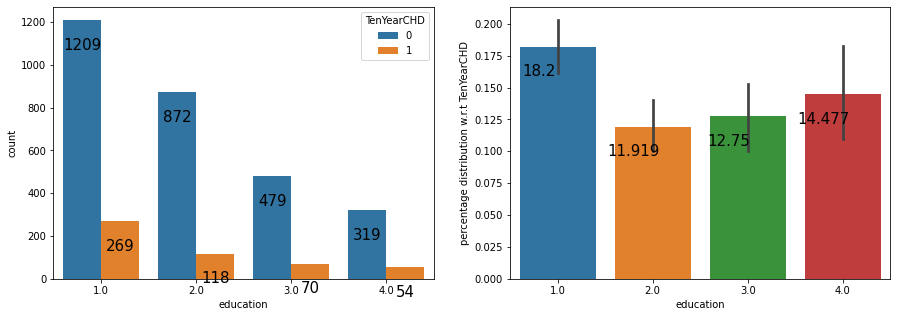

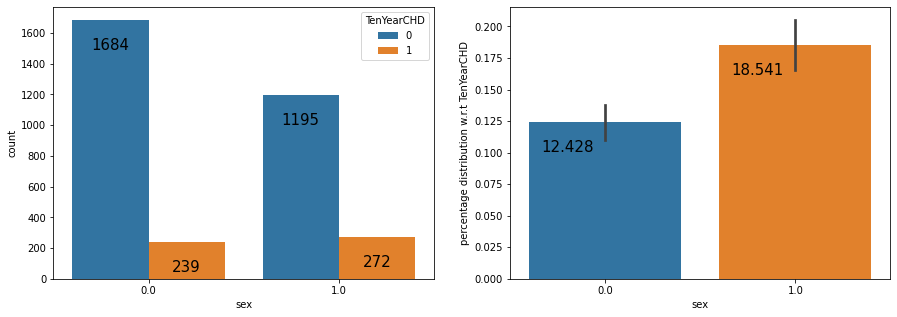

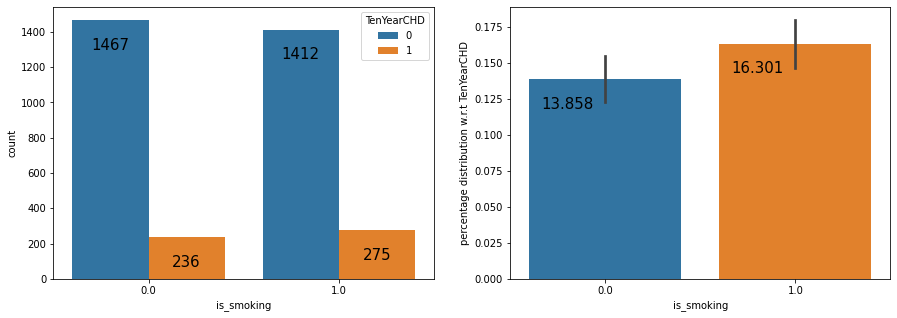

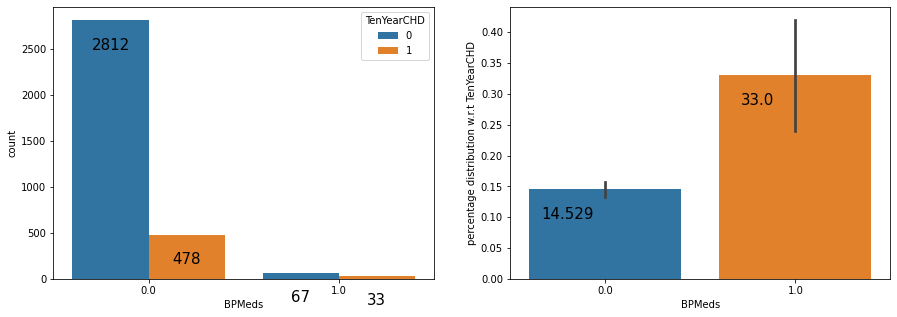

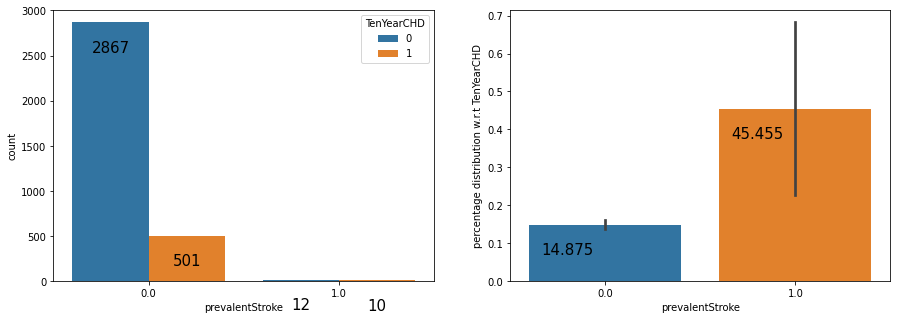

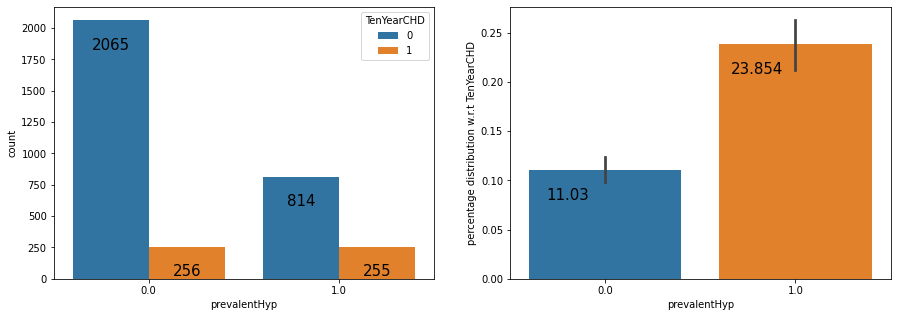

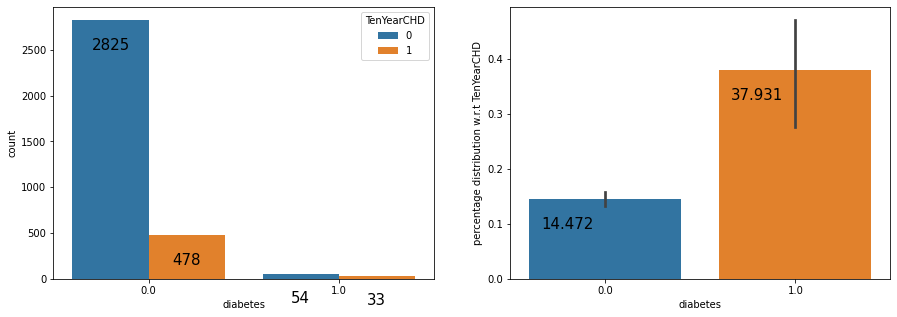

In [ ]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#countplot
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])#barplot
   vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.



## Analysing Numerical features with respect to categorical features

### Analysis with respect to age

**Analysising age feature with respect to other categorical features :**

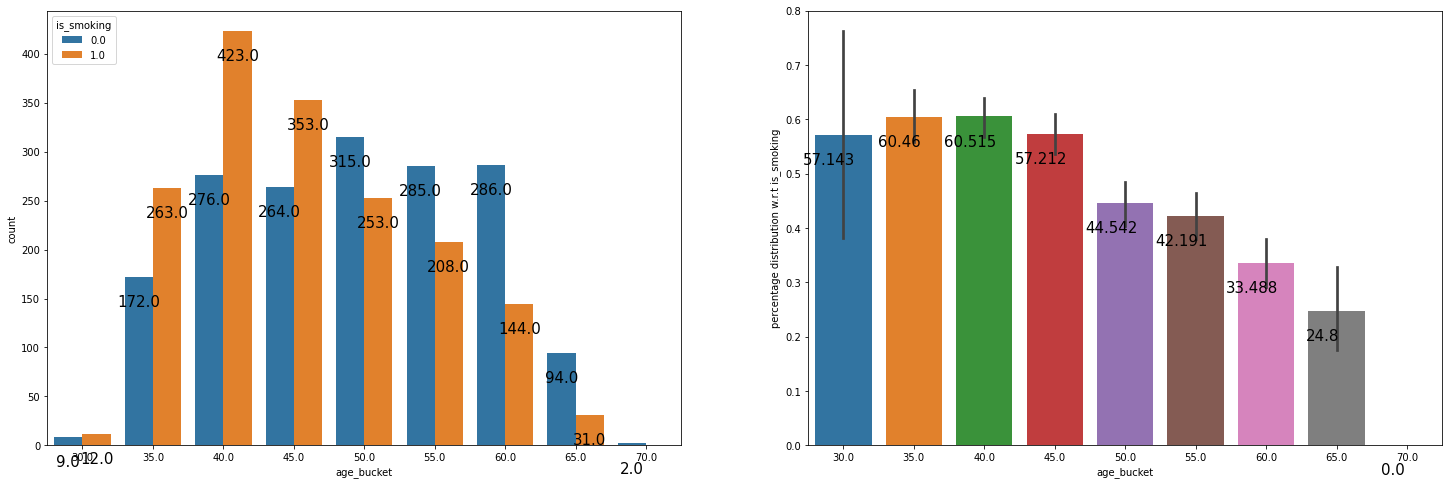

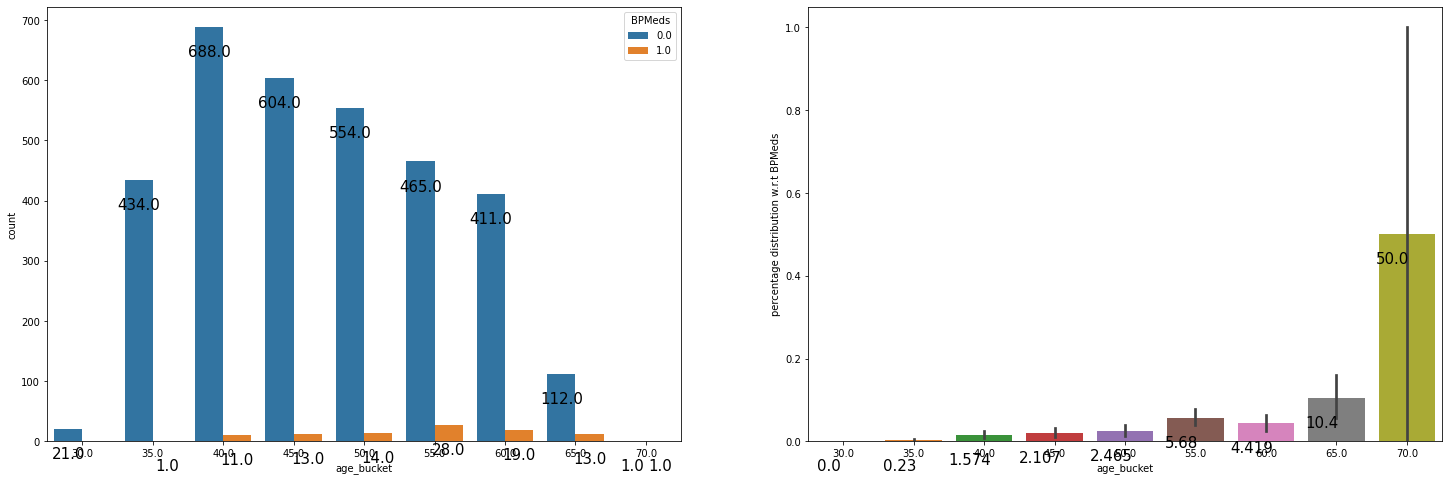

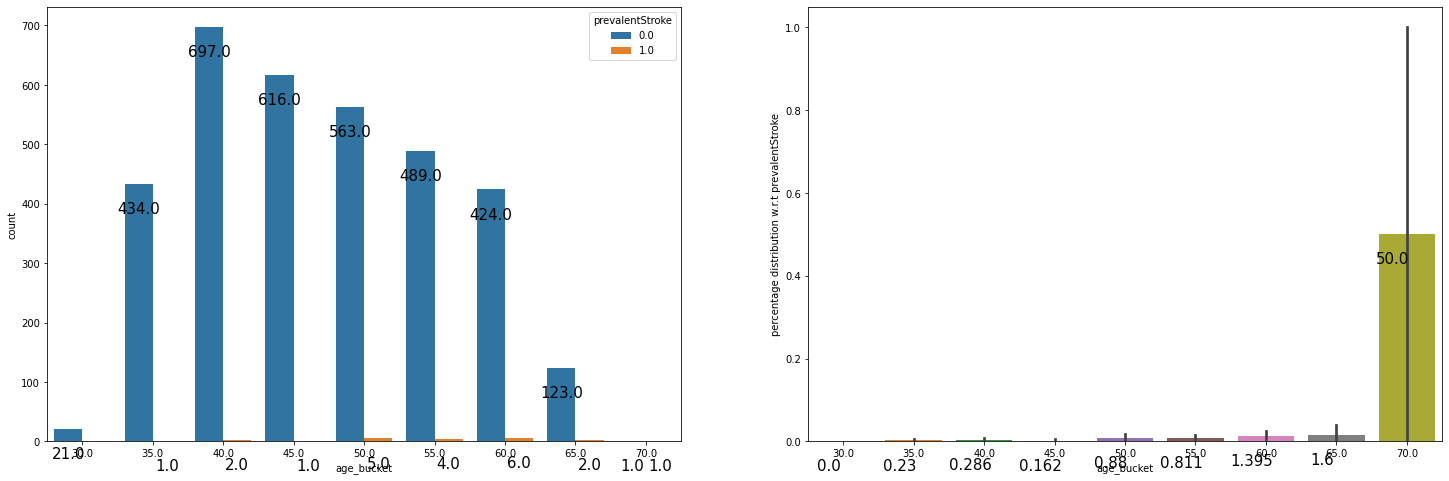

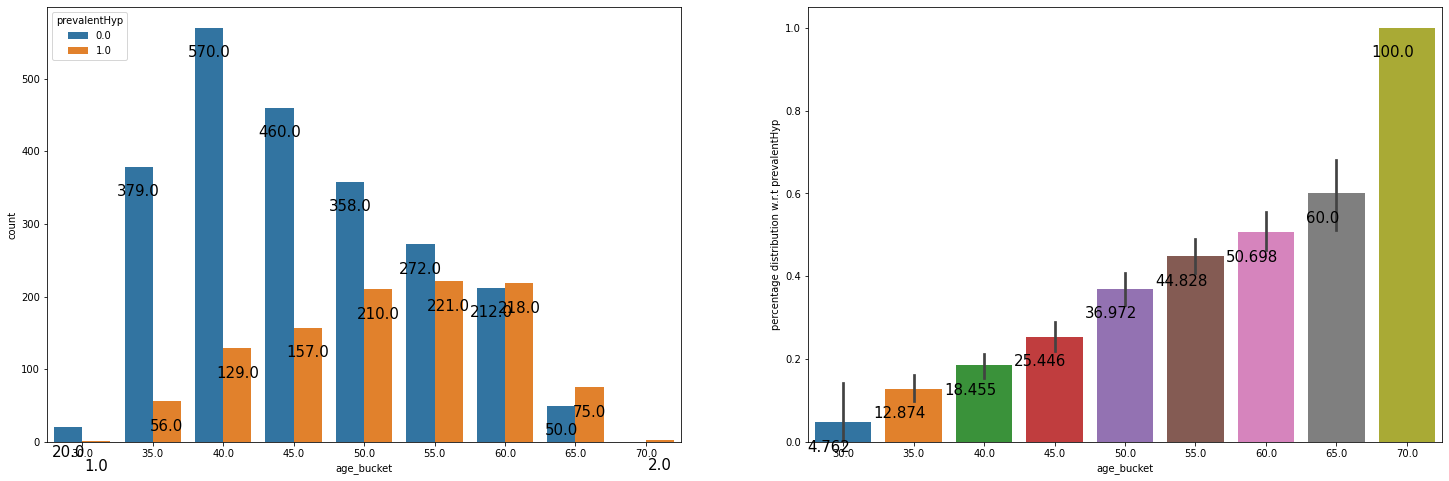

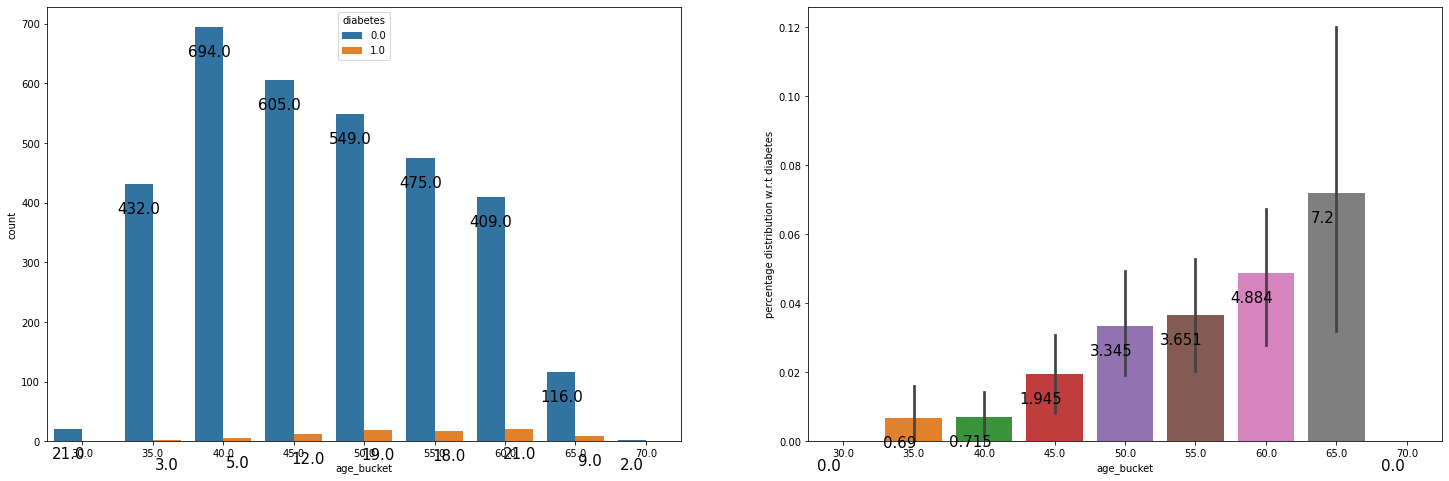

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Smoking habits tend to decrease with an increase in age.
*   Bp, hypertension and diabetes issues tend to increase with increases in age.



### Analysis with respect to totChol

**Analysising totChol feature with respect to other categorical features :**

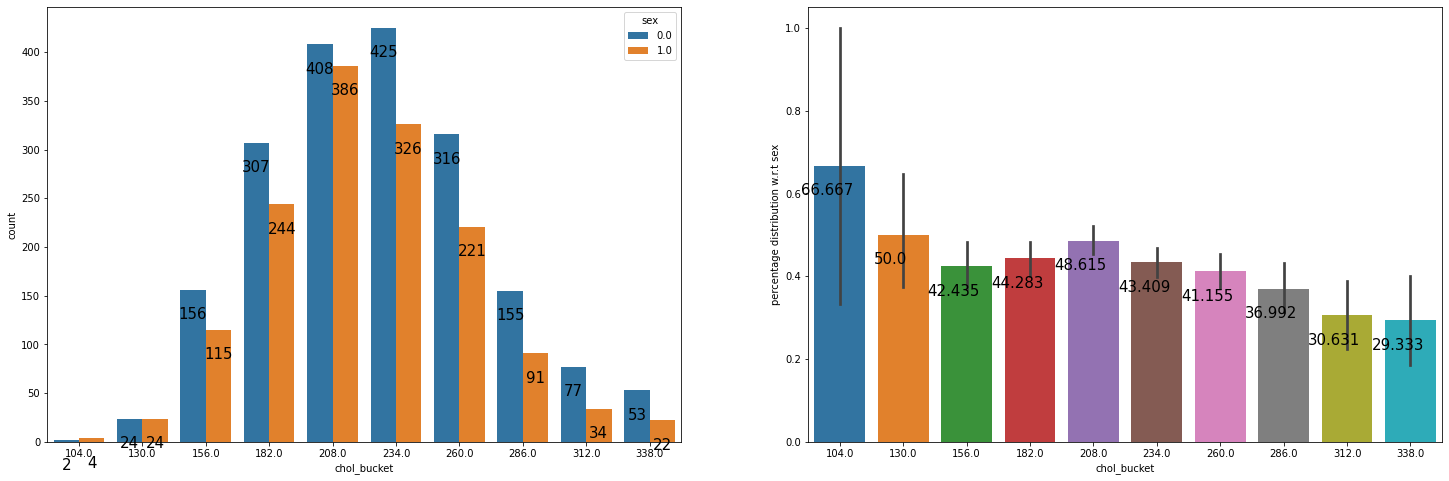

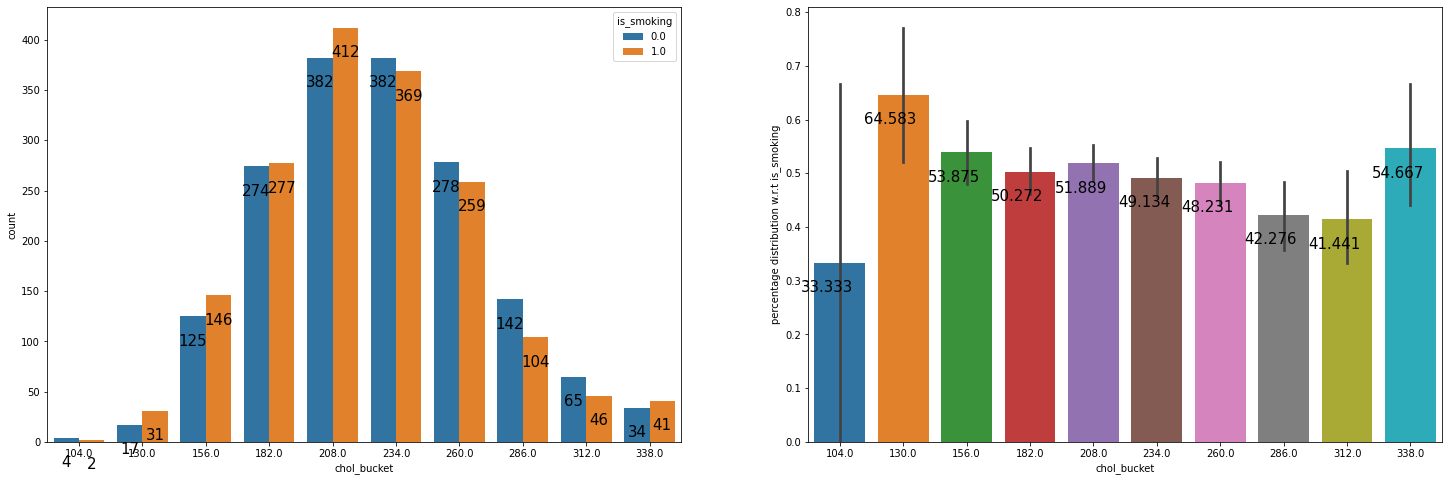

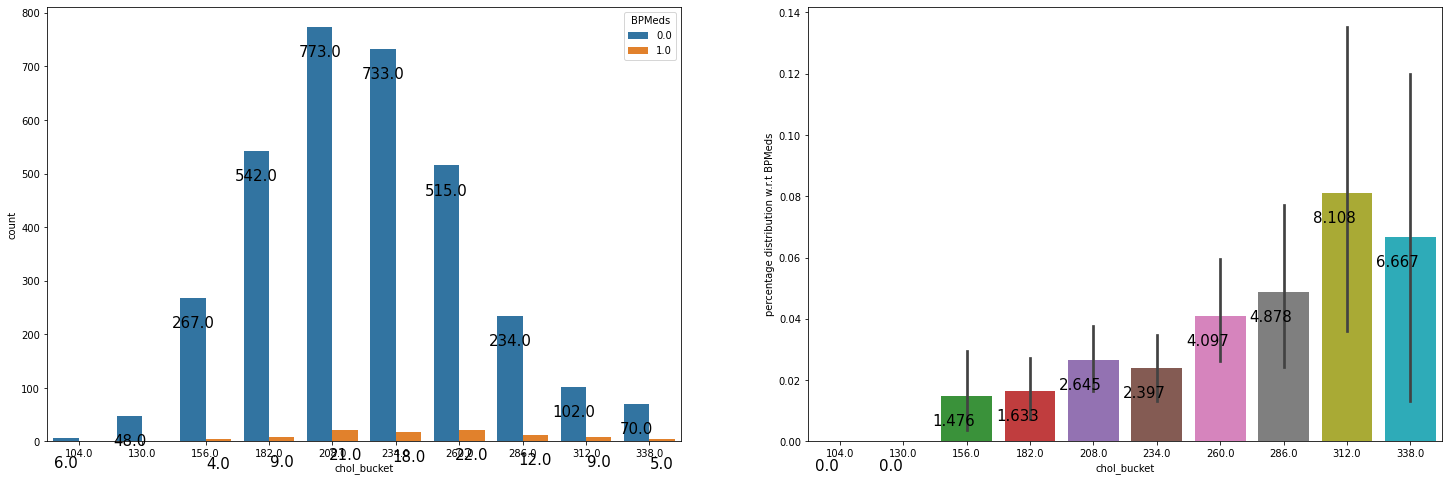

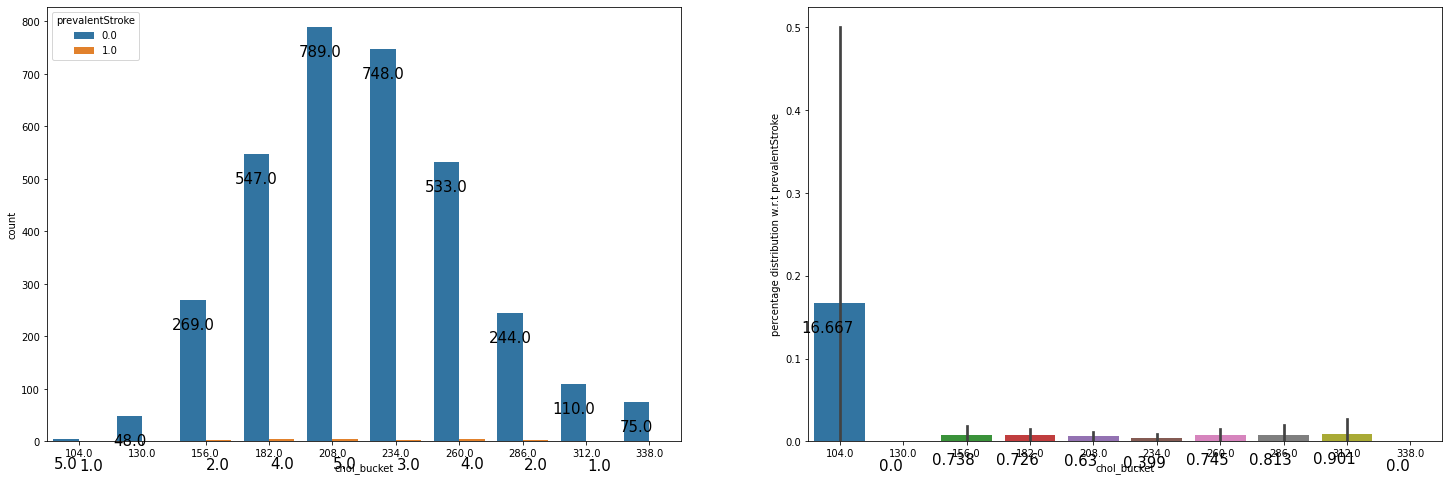

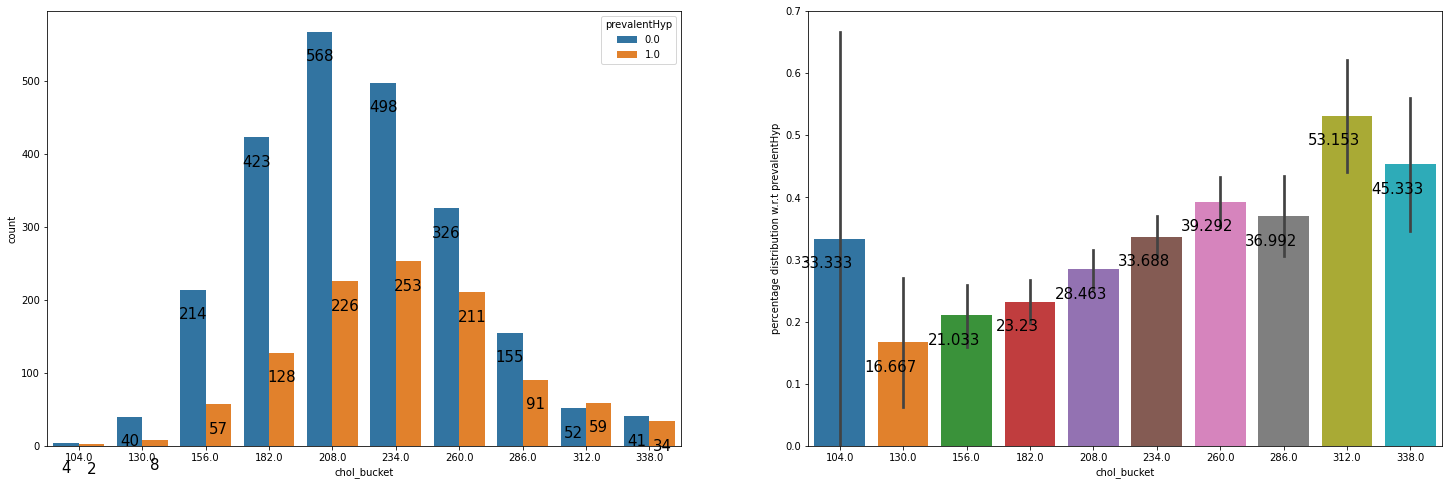

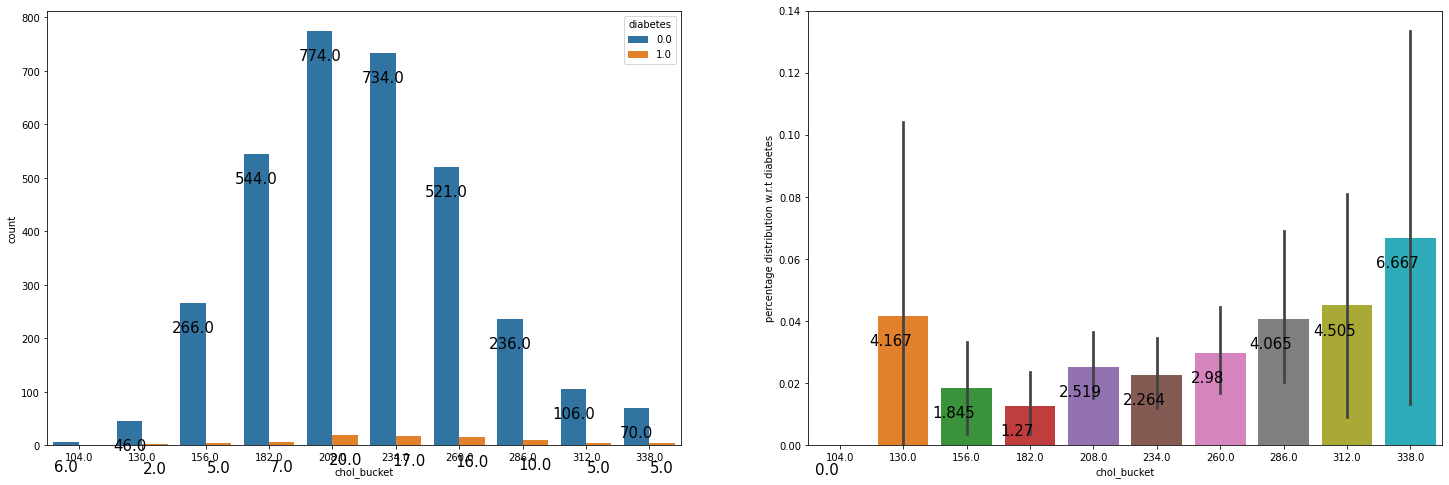

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

  vh=sns.barplot('chol_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Females tend to have higher cholesterol levels compared to males.
*   Bp and hypertension issues tend to increase with an increase in cholesterol levels



### **Analysis with respect to cigsPerDay**

**Analysising cigsPerDay feature with respect to other categorical features :**

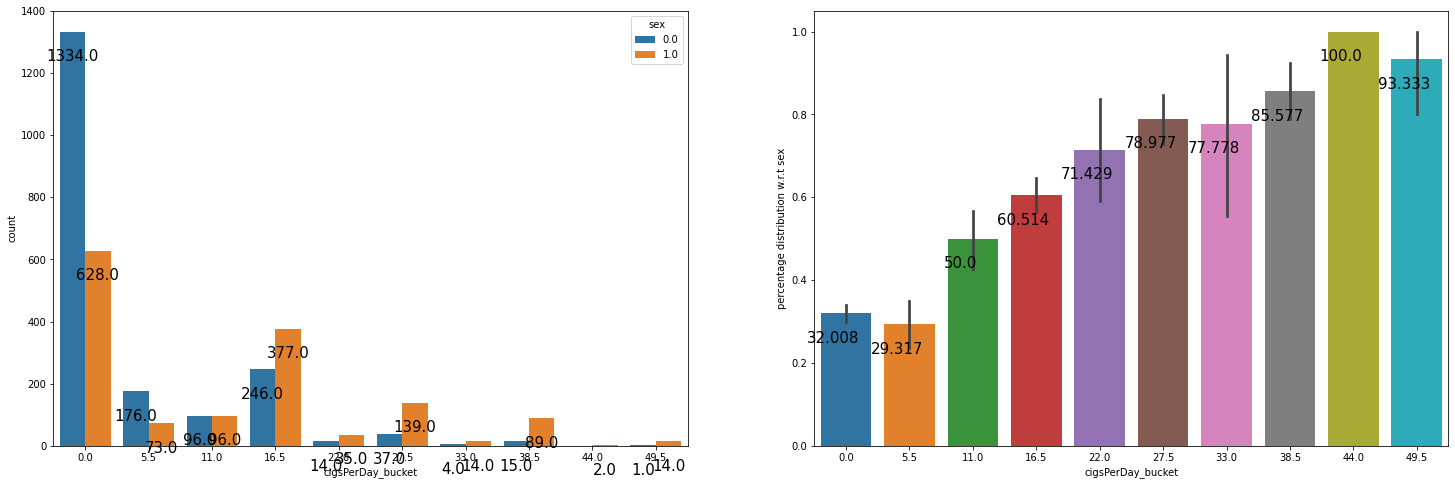

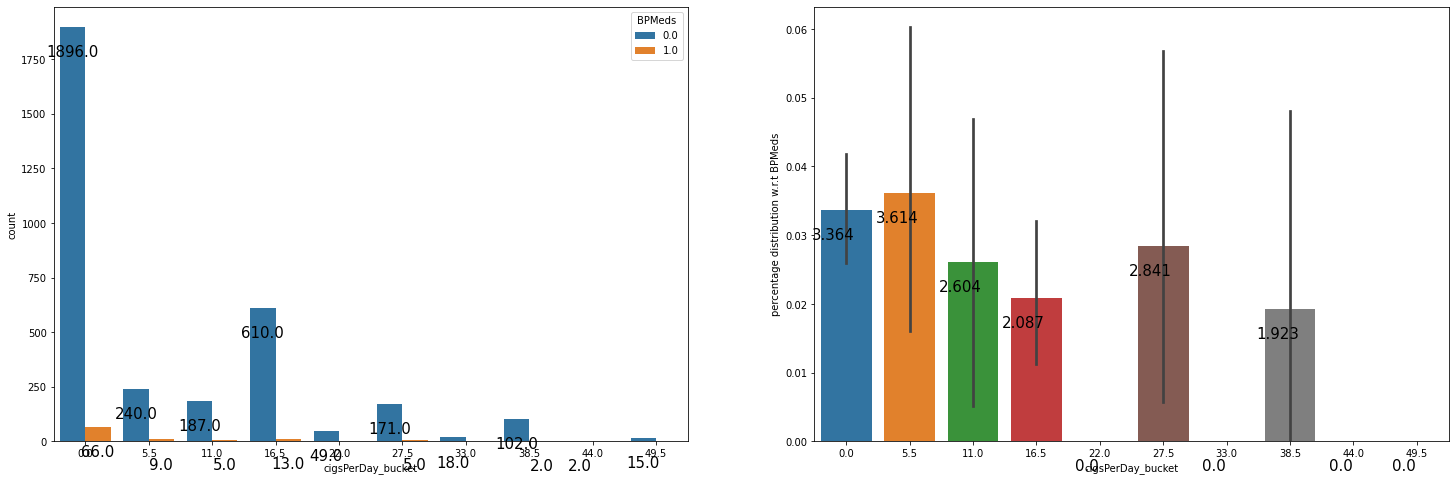

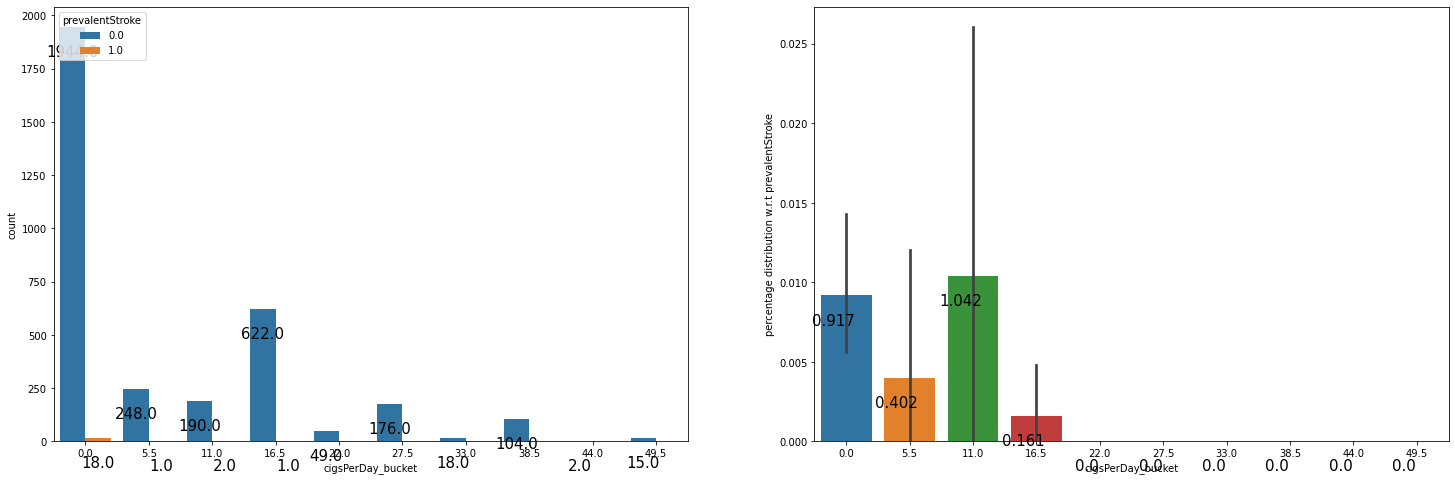

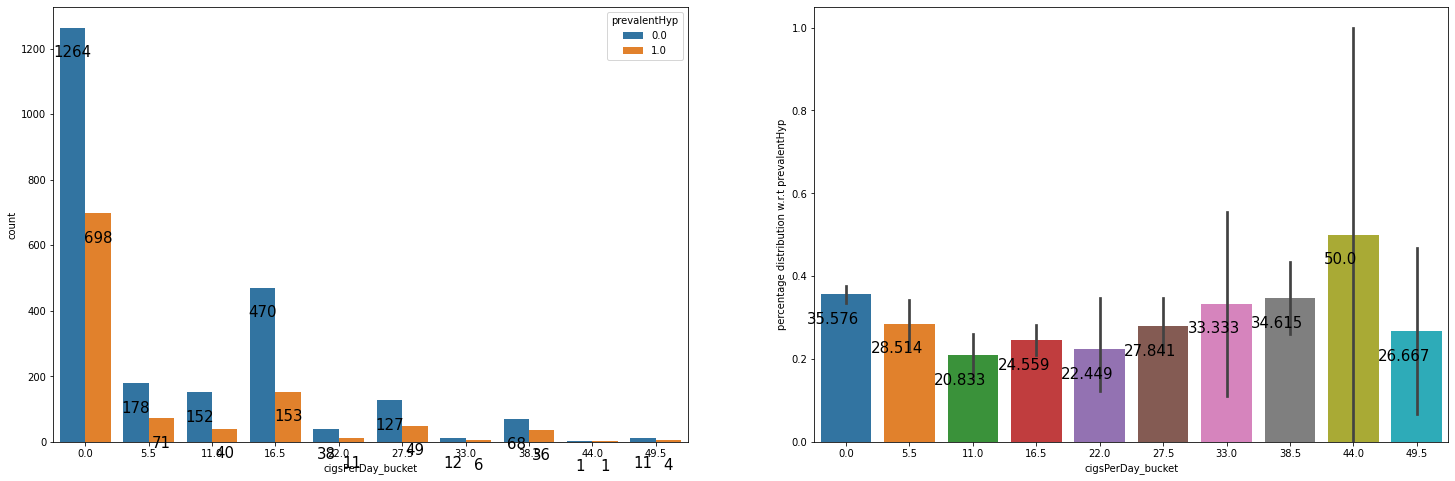

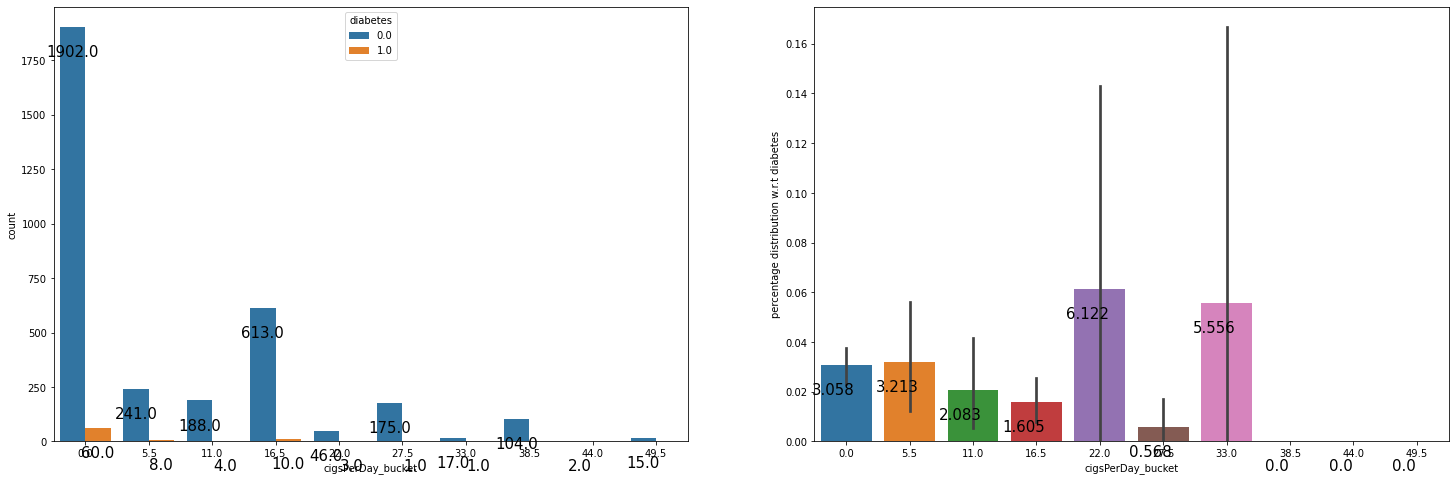

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   Males tend to smoke more cigarettes compared to females.



### Analysis with respect to sysBP

**Analysising sysBP feature with respect to other categorical features :**

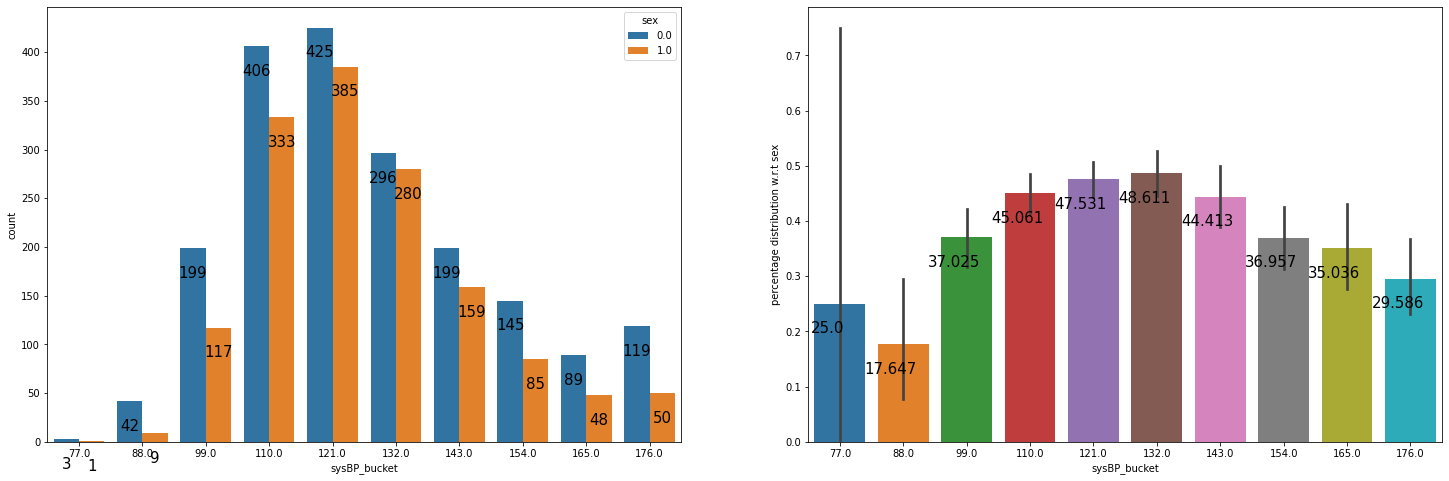

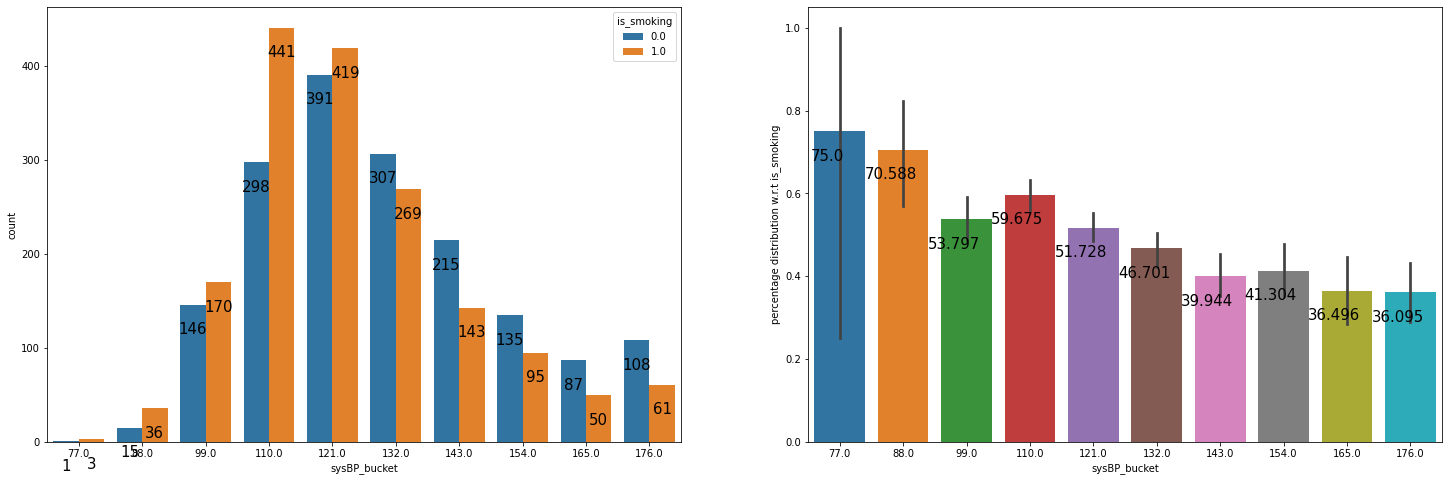

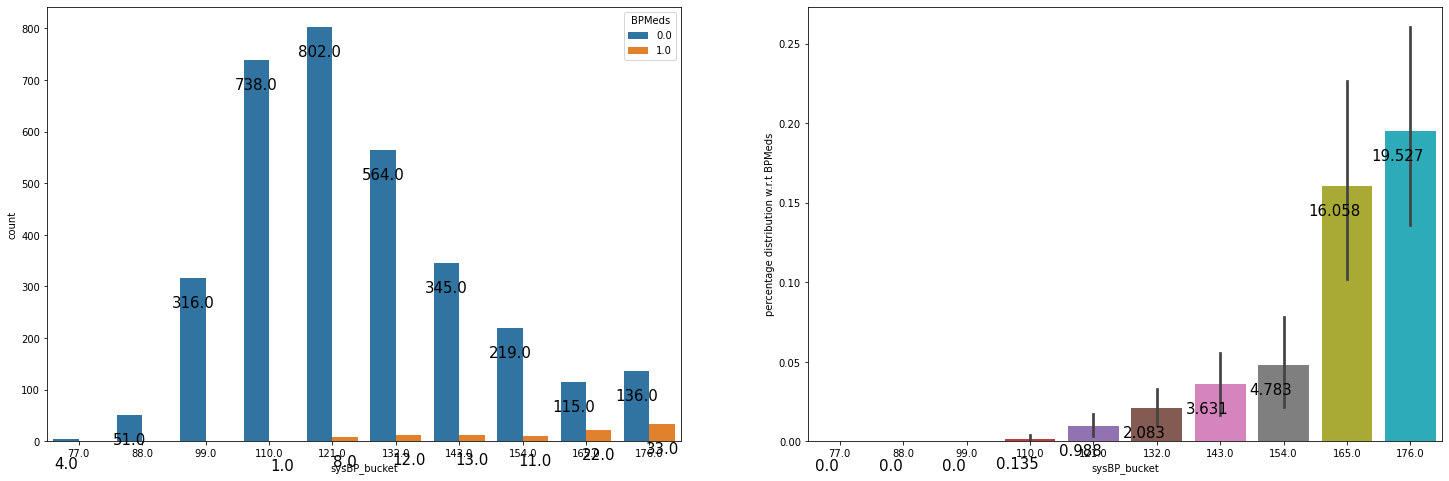

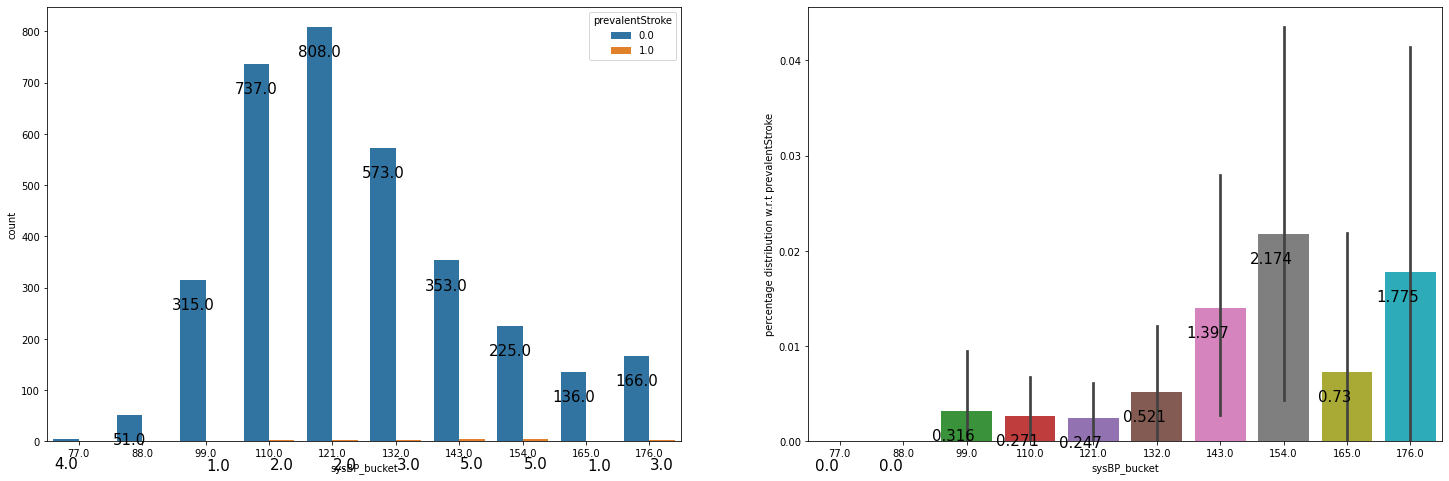

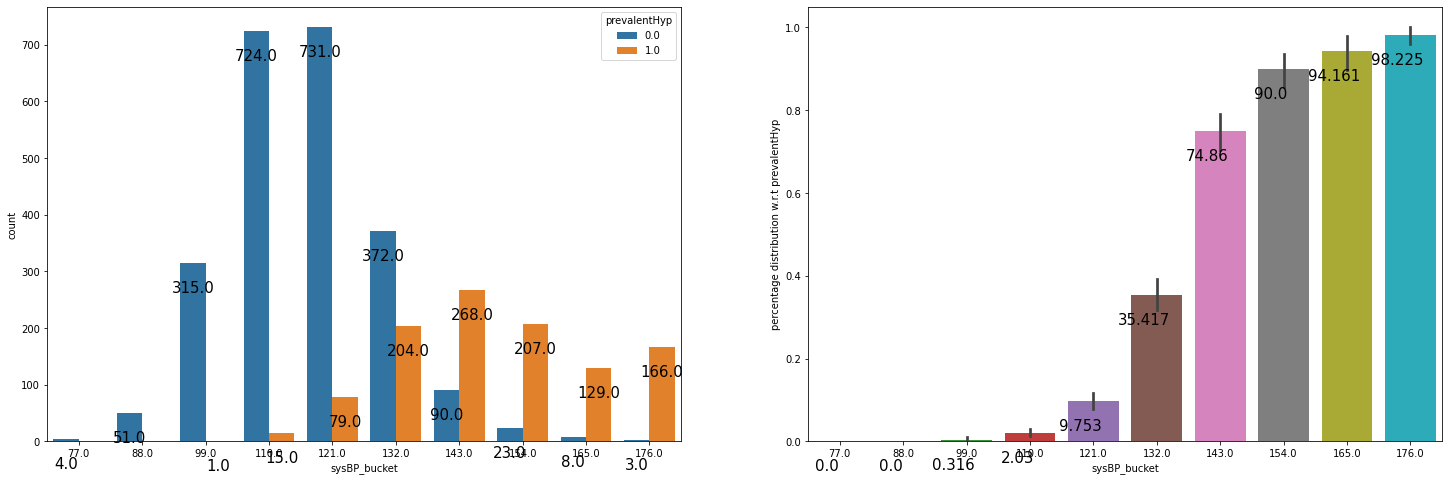

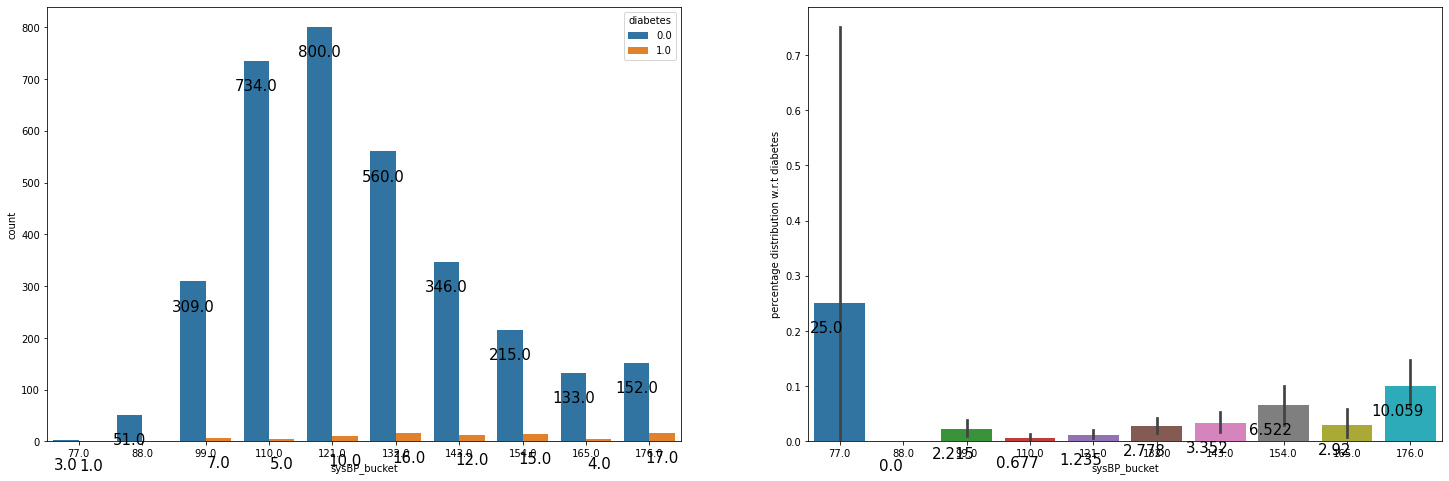

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   SysBp tends to be low for smokers.
*   SysBp tends to be high for people with BP medication and hypertension issues.




### **Analysis with respect to diaBP**

**Analysising diaBP feature with respect to other categorical features :**

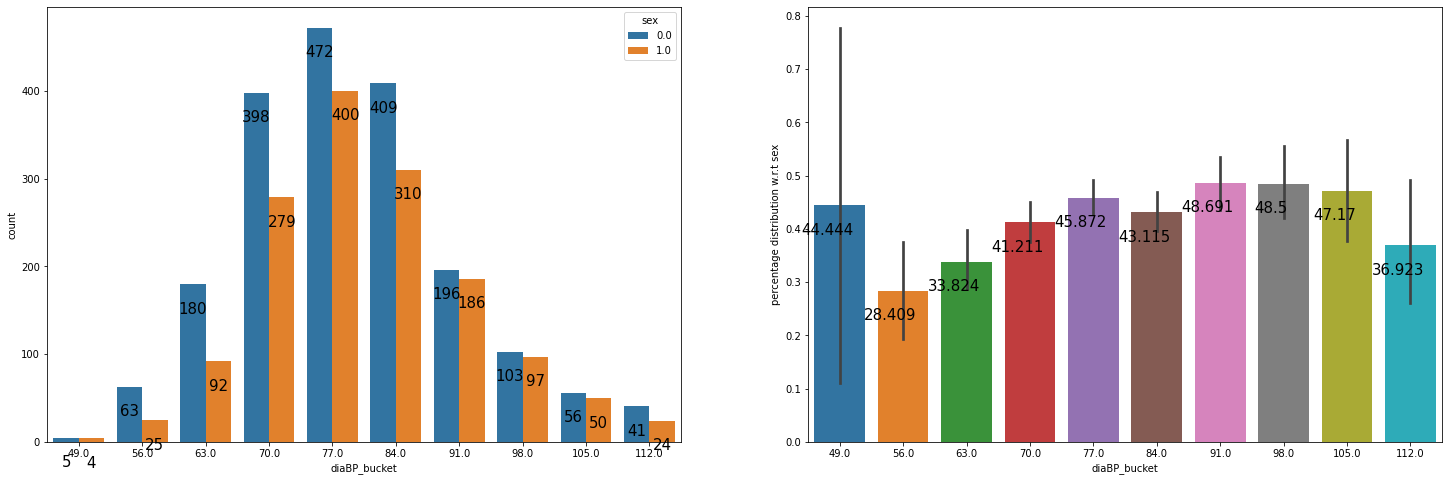

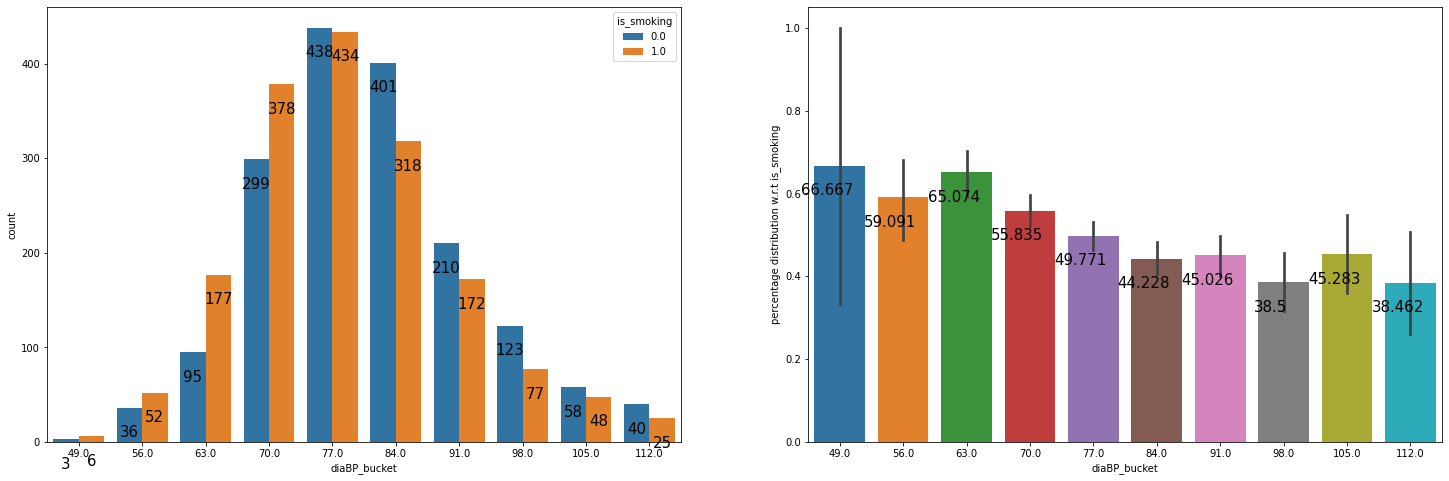

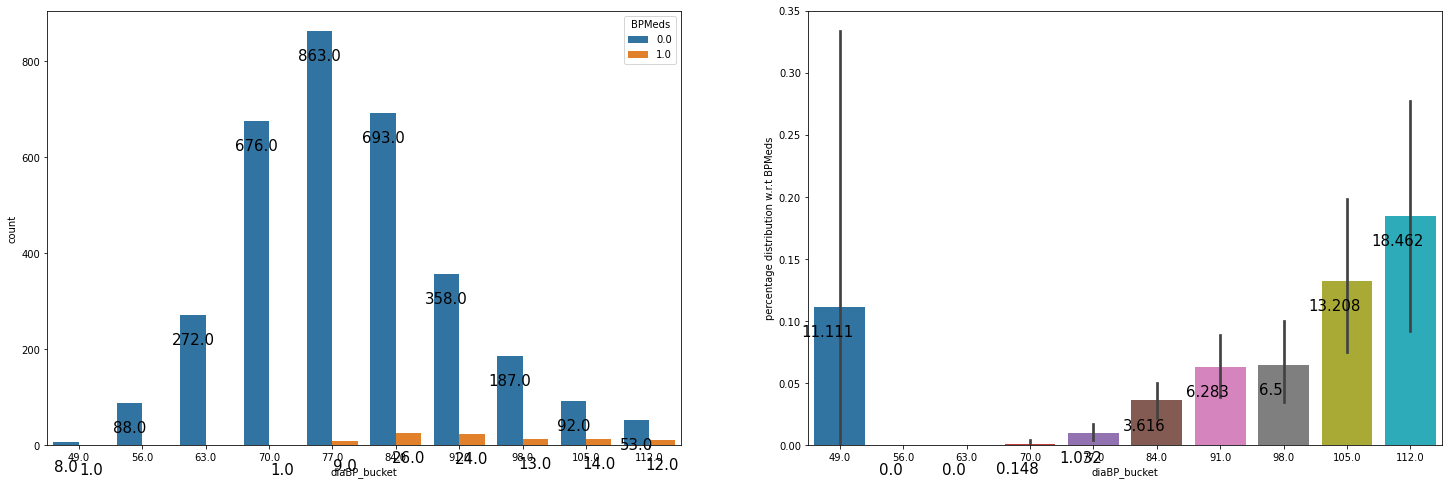

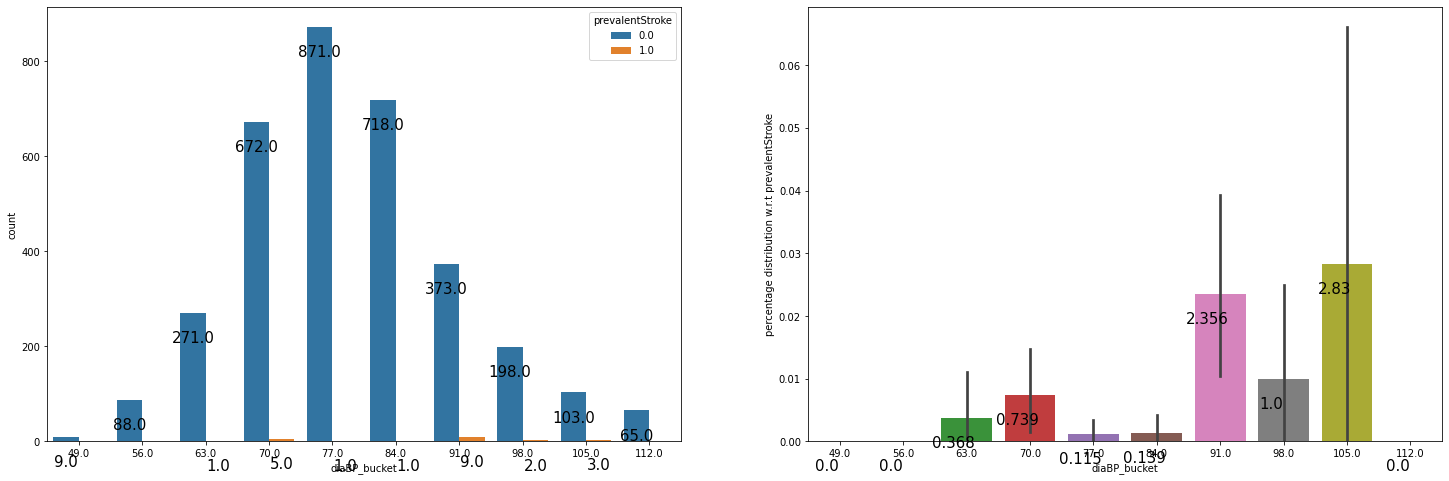

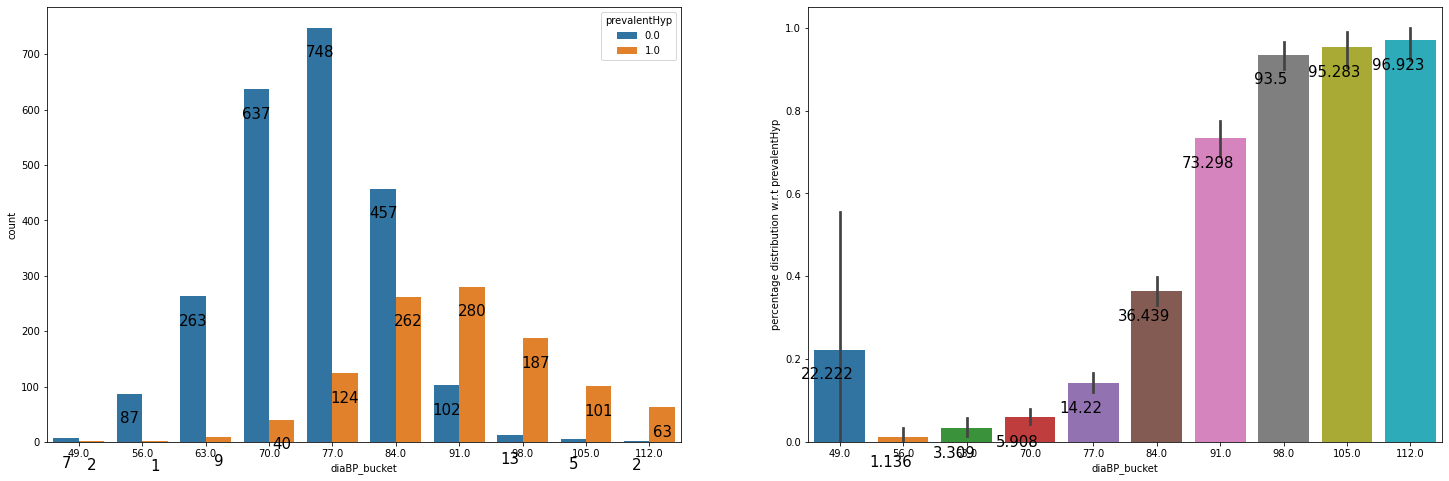

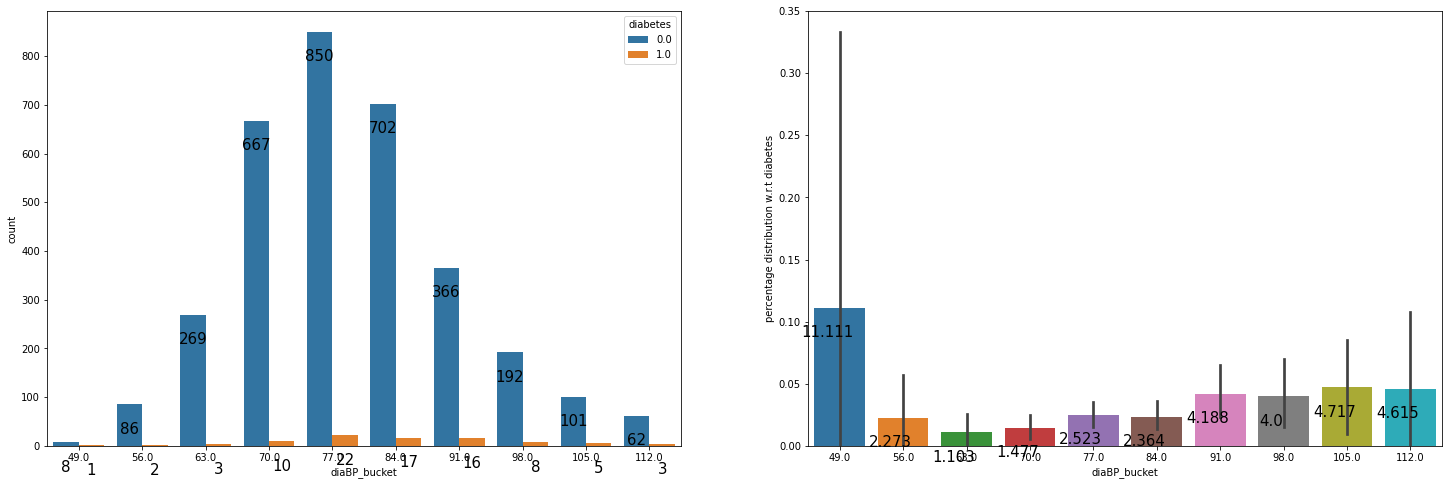

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   DiaBp tends to be low for smokers.
*   DiaBp tends to be high for people with BP medication and hypertension issues.



### **Analysis with respect to BMI**

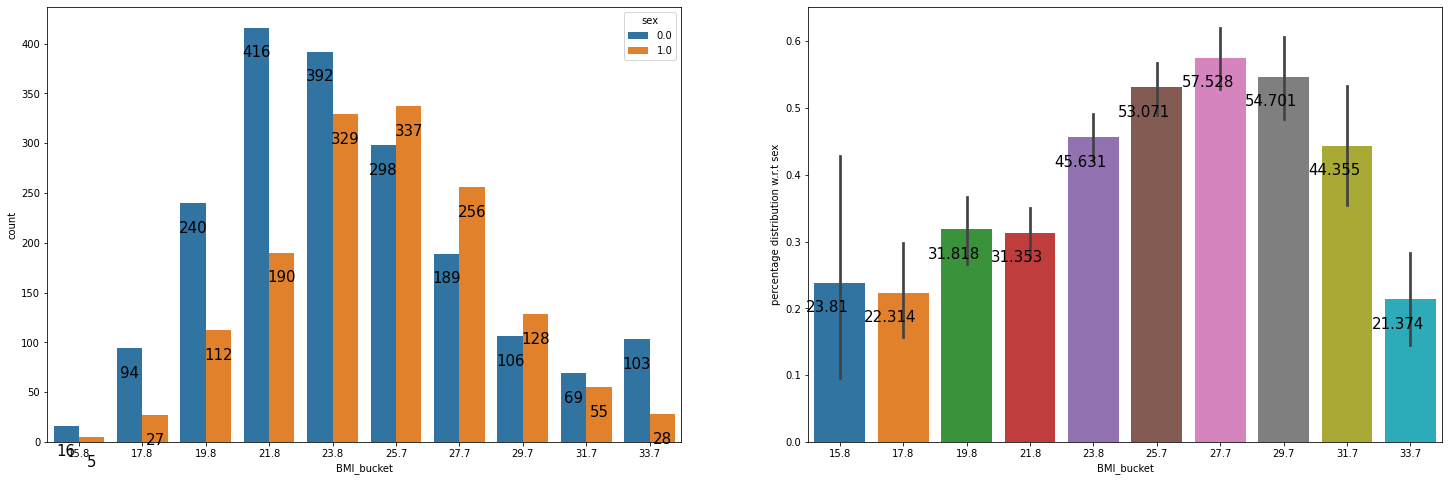

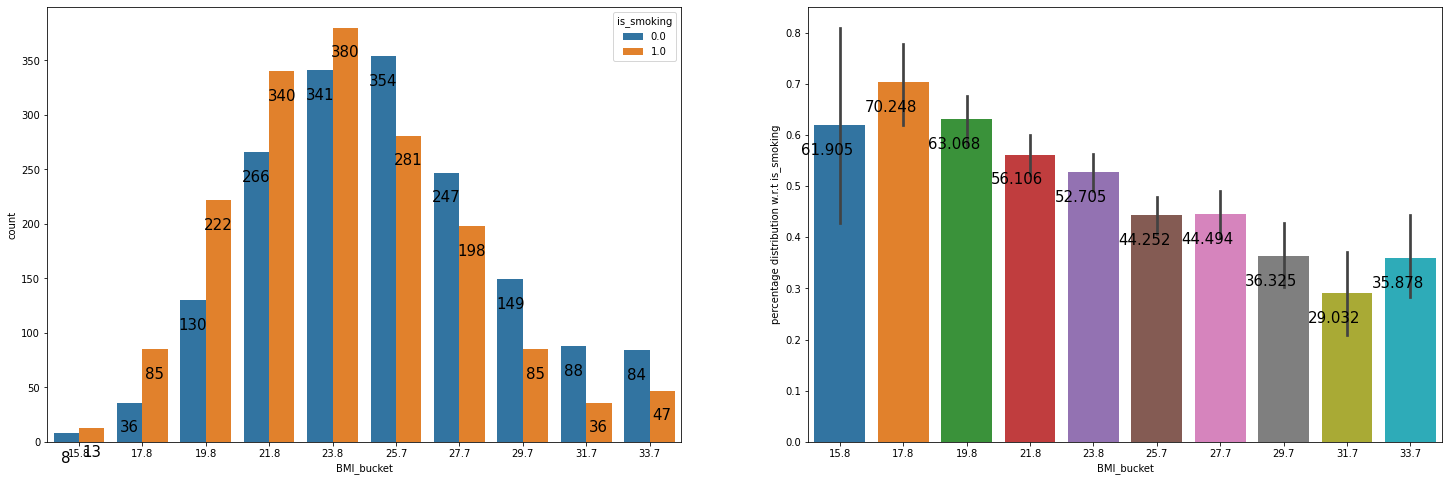

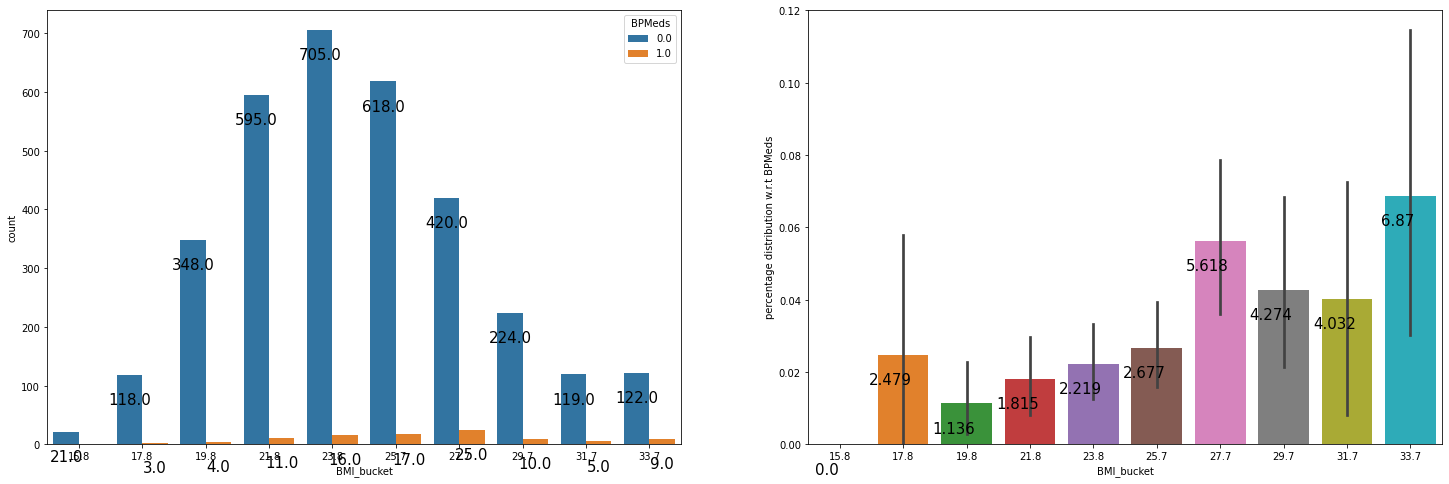

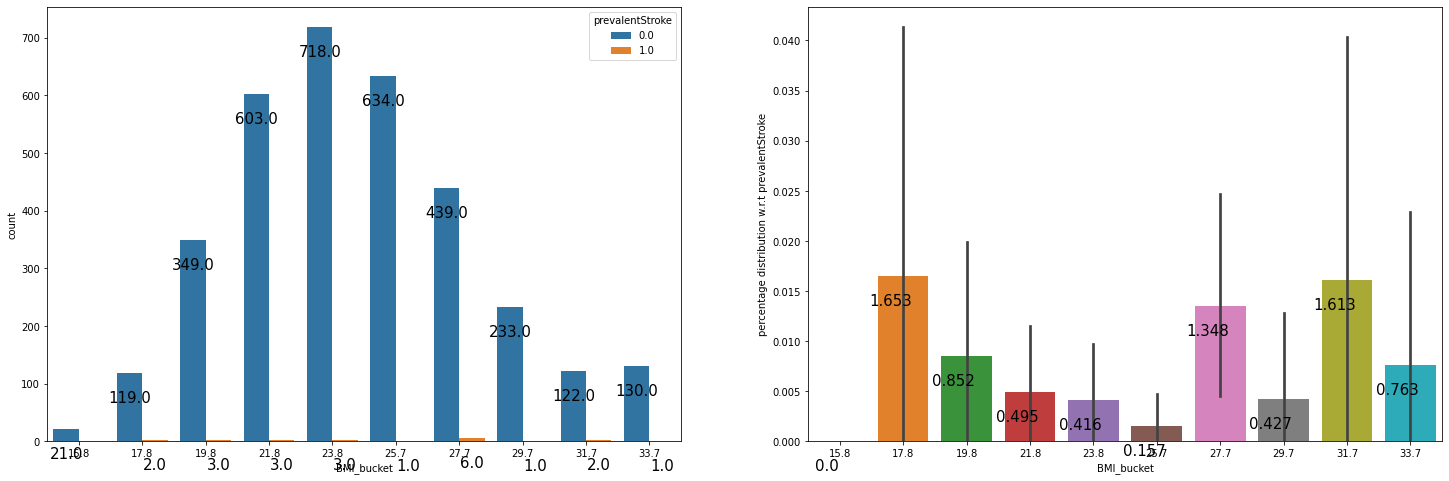

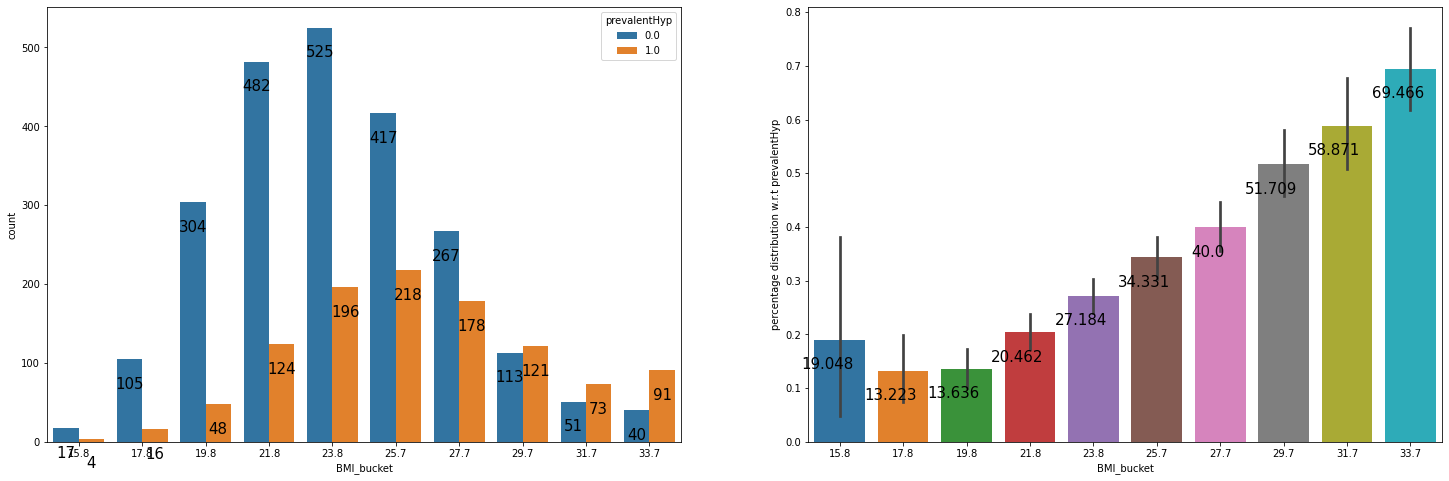

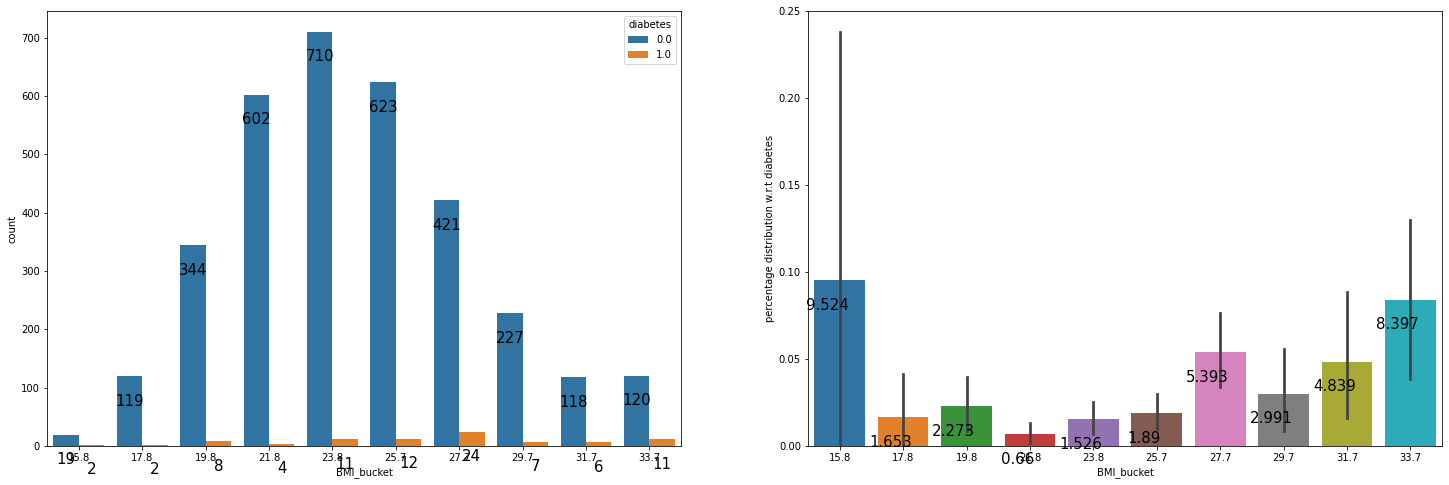

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   BMI levels from 15 to 22 and 30 to 34 are more prevalent in females.
*   Smokers tend to have lower BMI.
*   People with prevalent hypertension tend to have higher BMI.





### Analysis with respect to heartRate

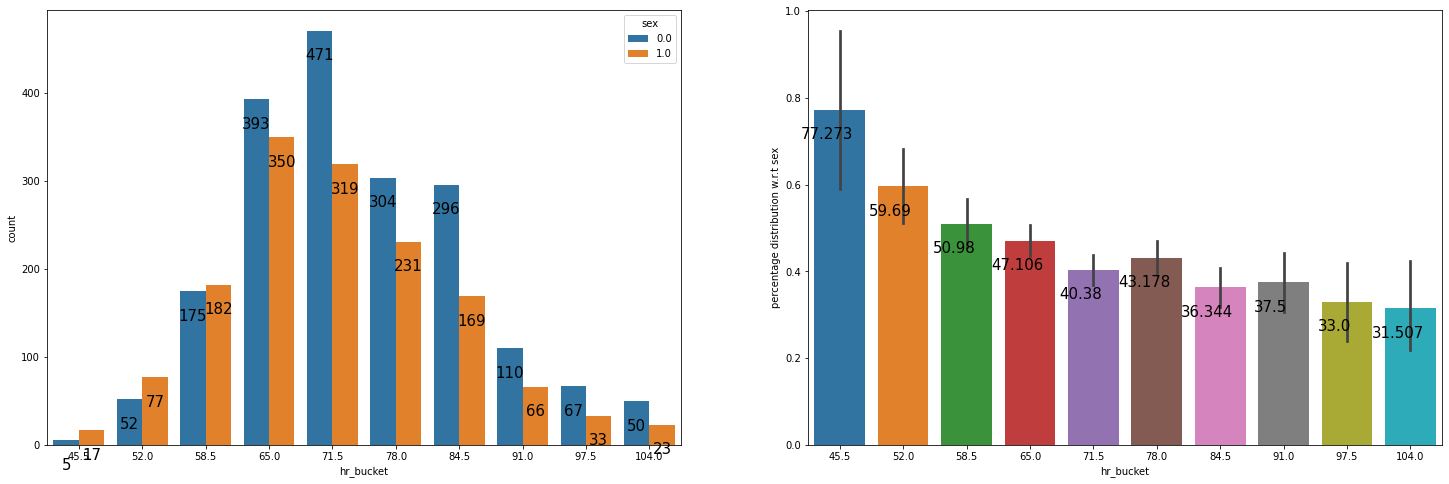

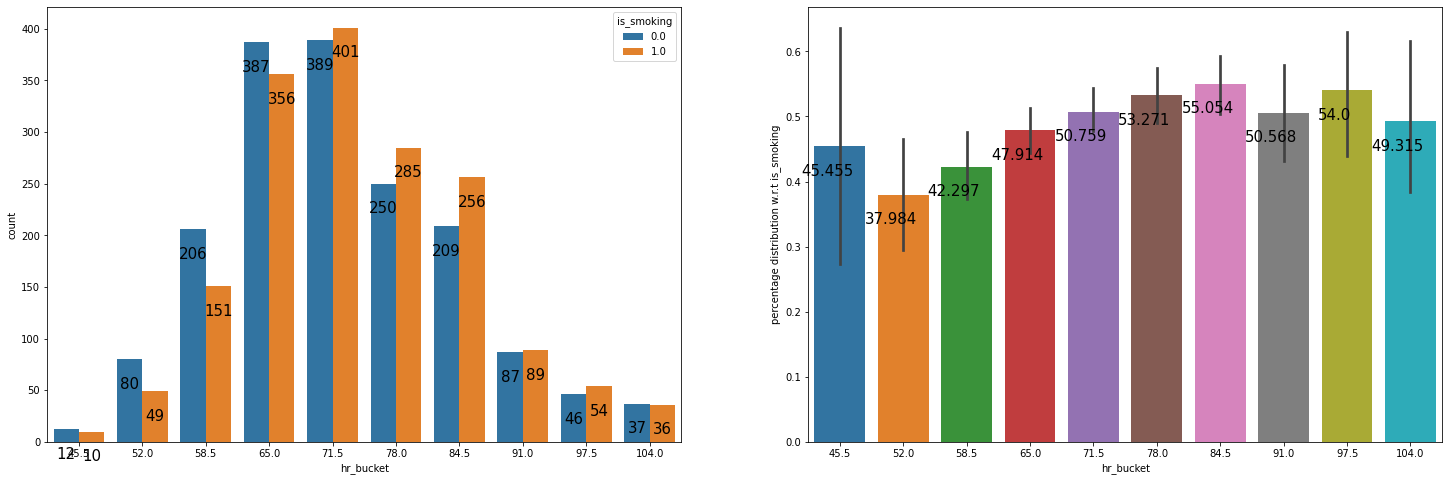

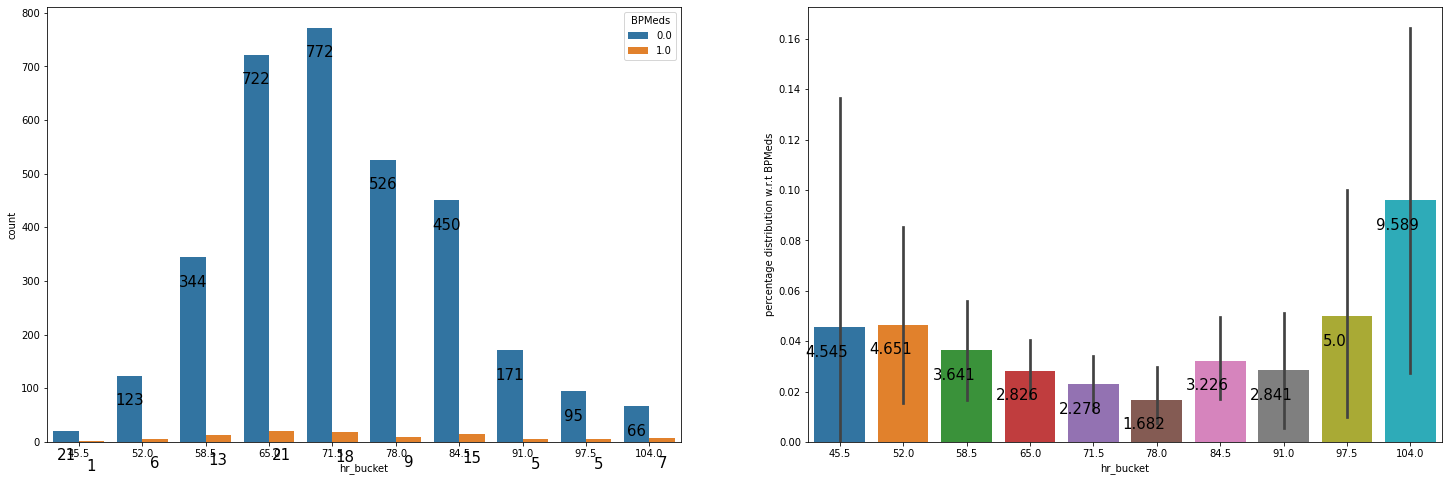

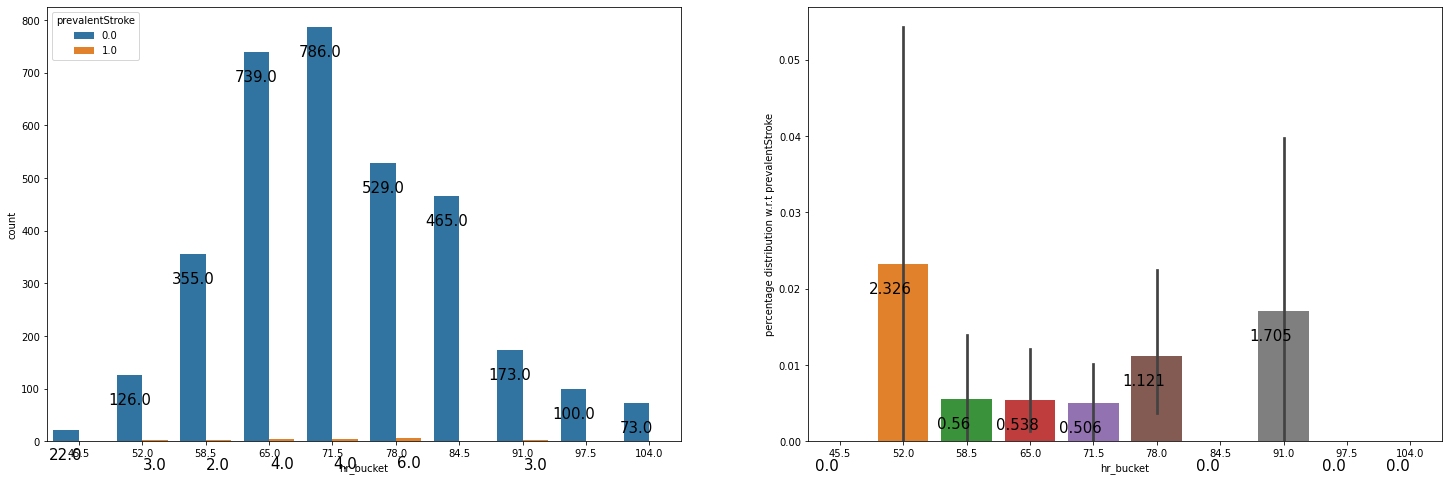

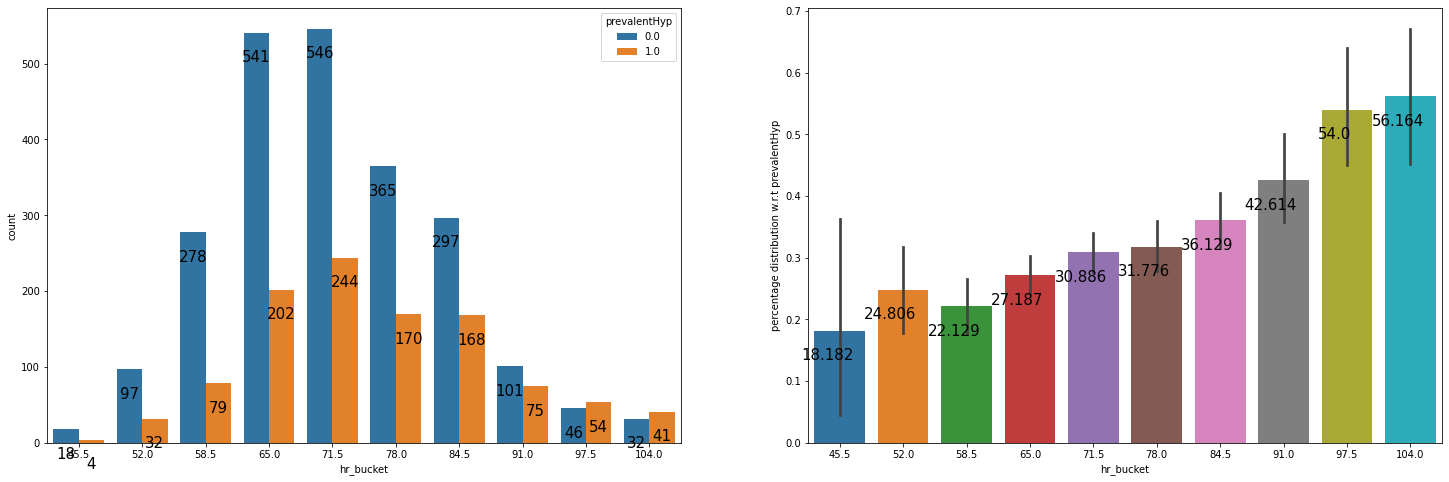

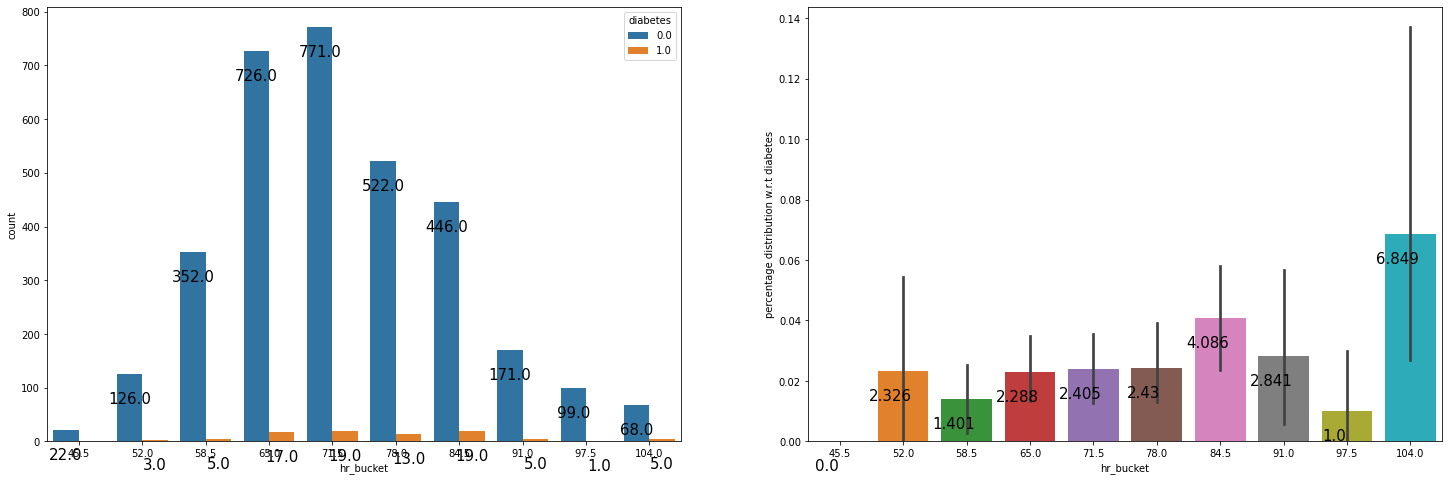

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   Females and people with prevalent hypertension tend to have higher heart rates.



### Analysis with respect to glucose

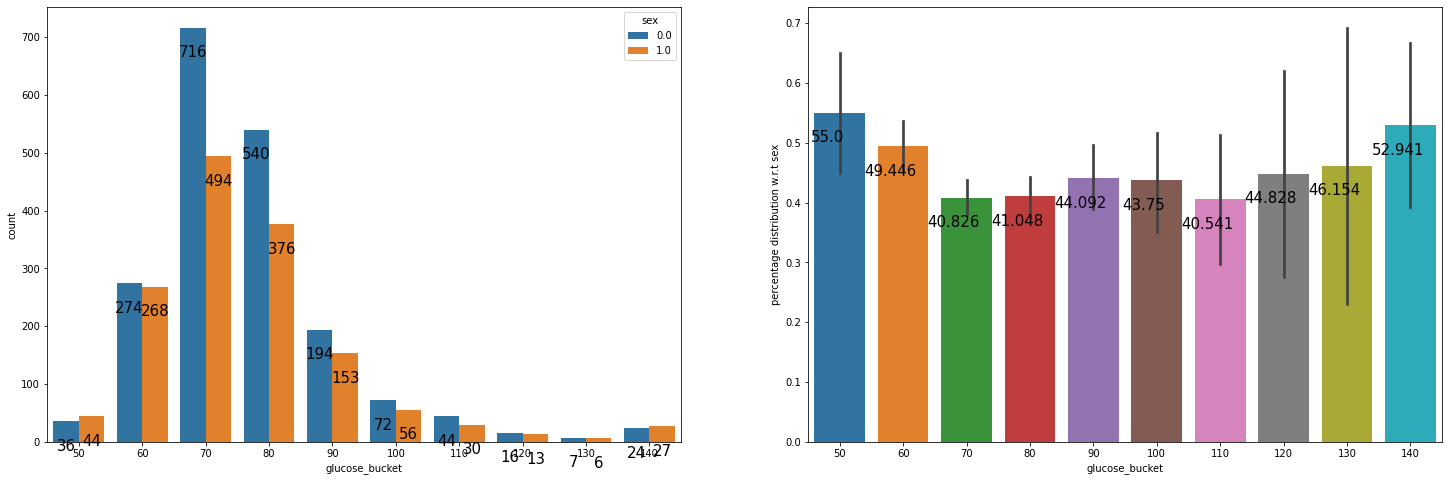

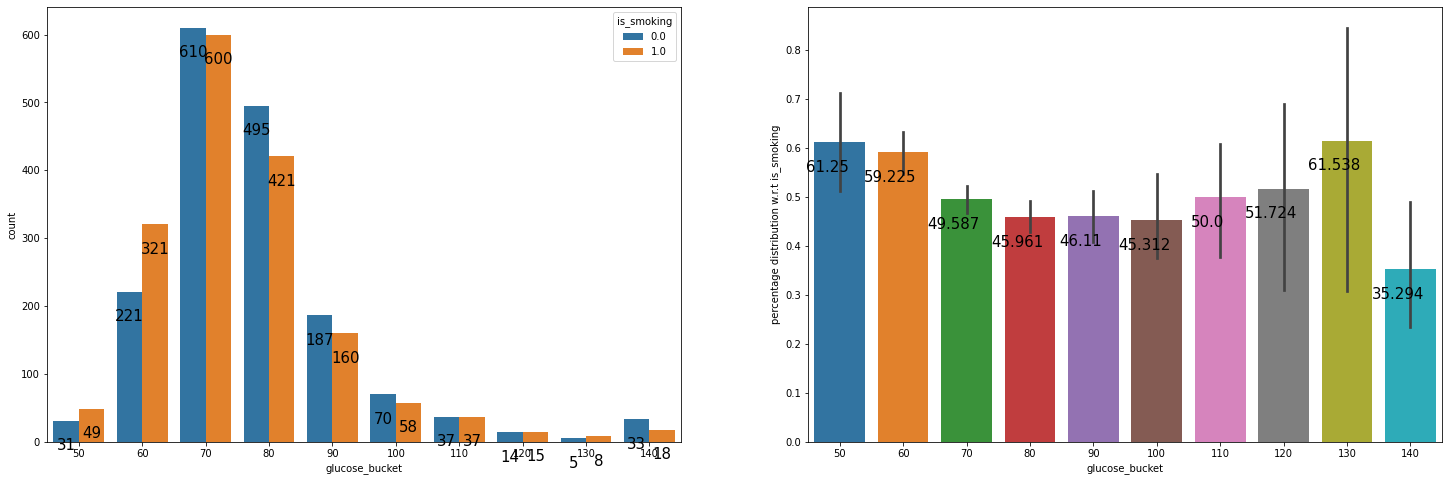

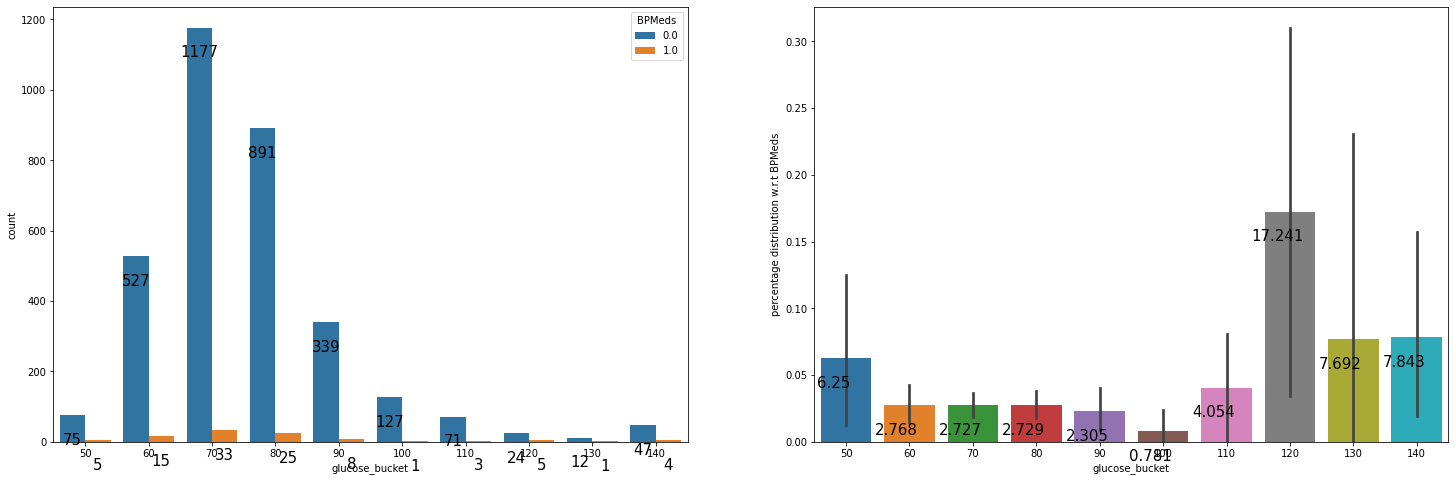

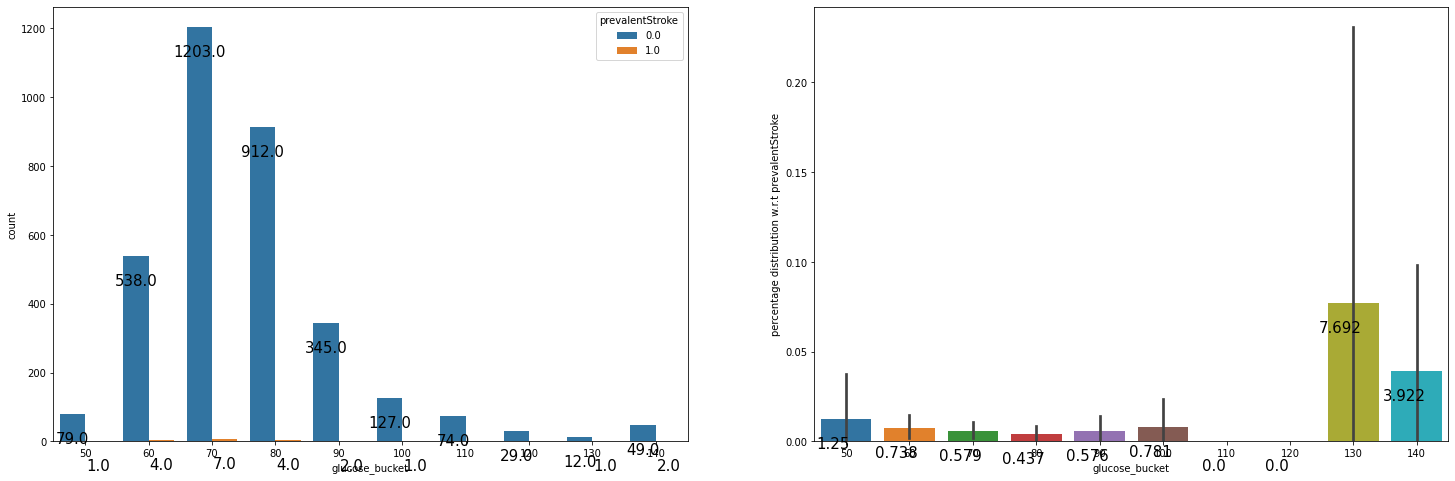

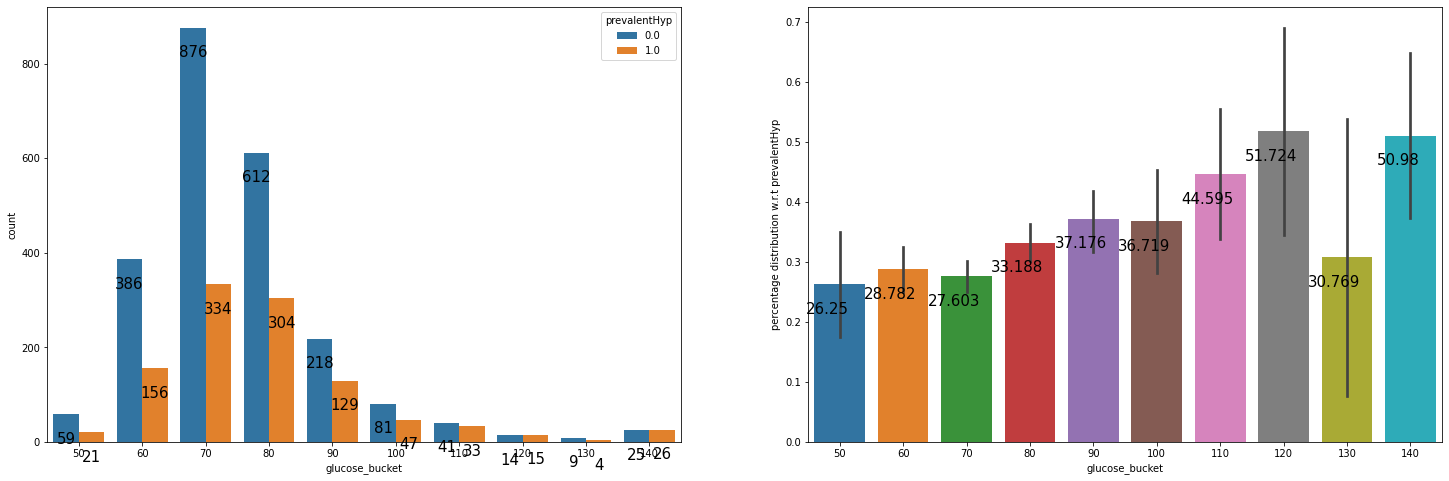

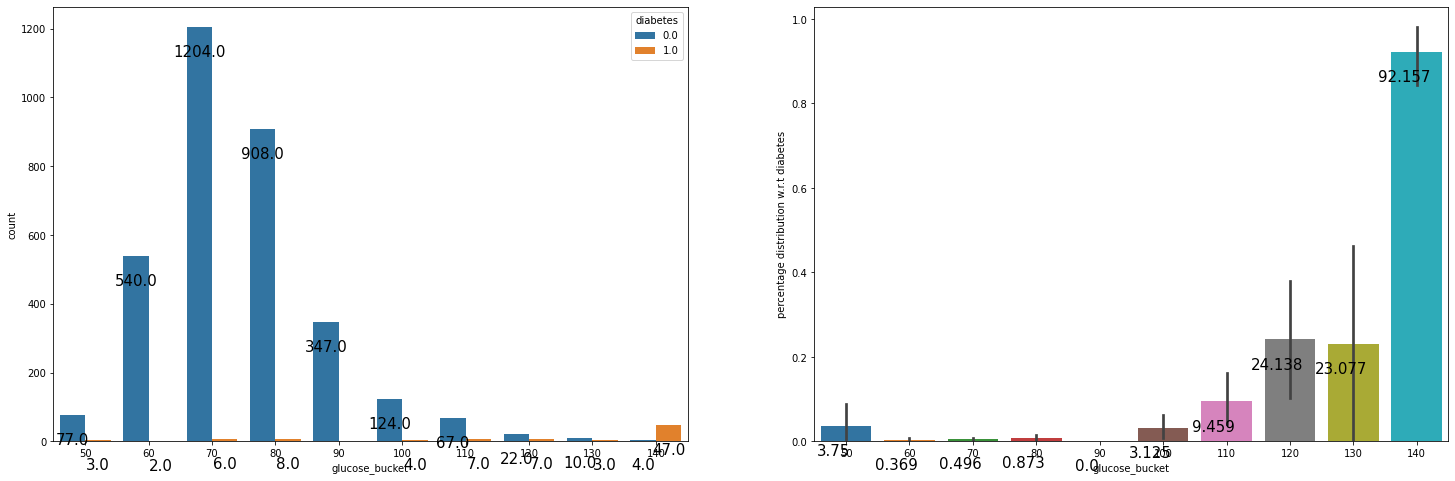

In [ ]:
#For better further analysis binning is implemented on age feature
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10)))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   People with prevalent hypertension tend to have higher glucose levels.



## Analysing numerical features with respect to target feature 

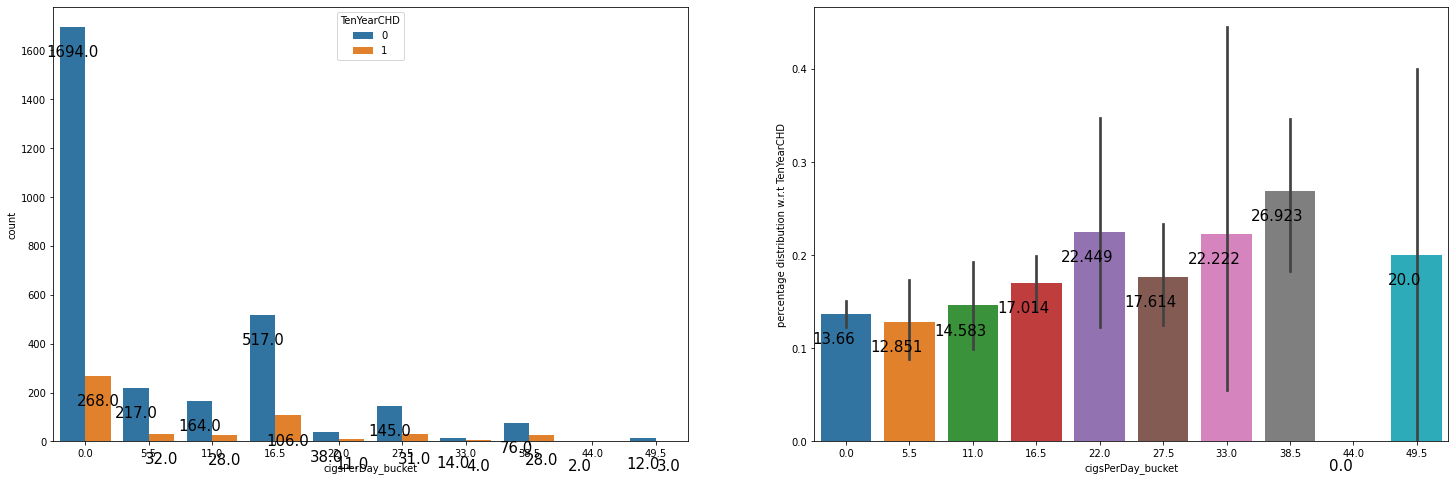

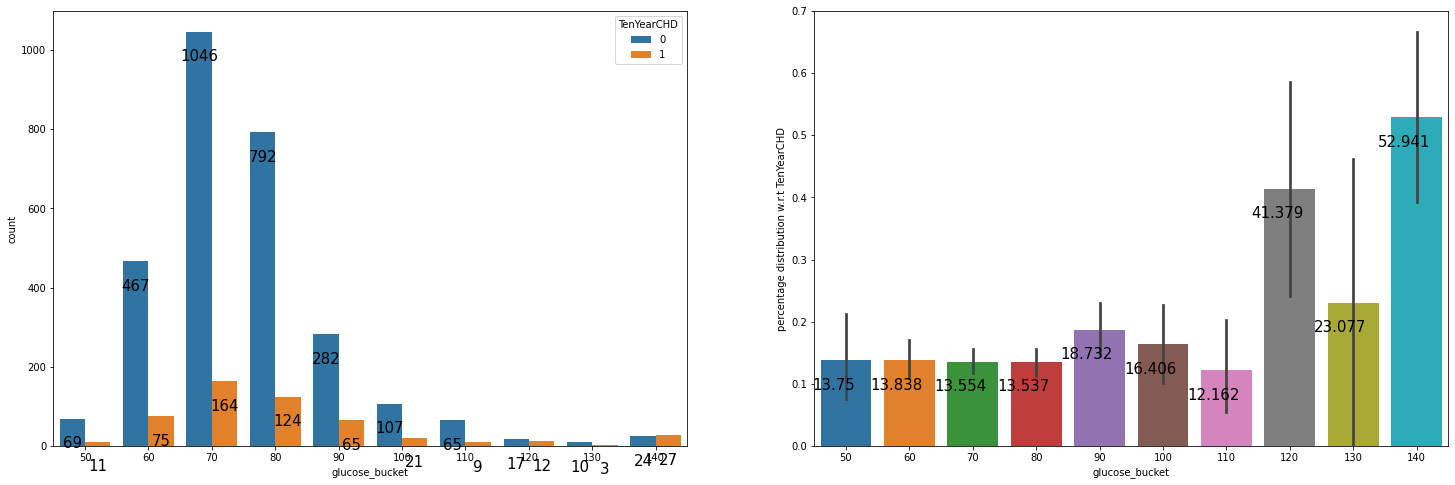

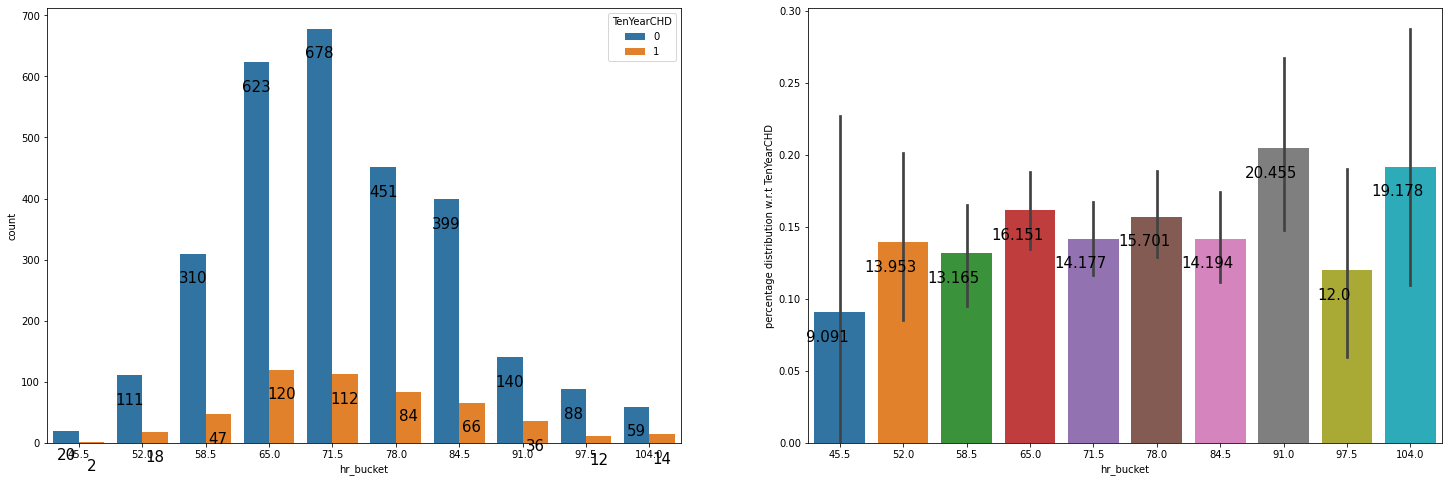

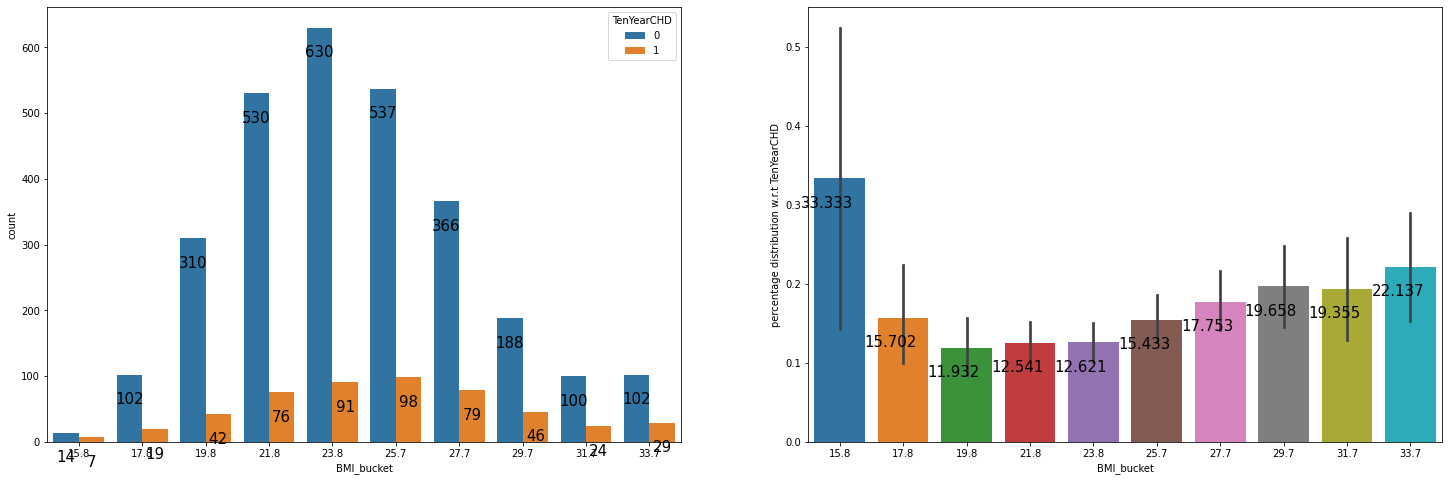

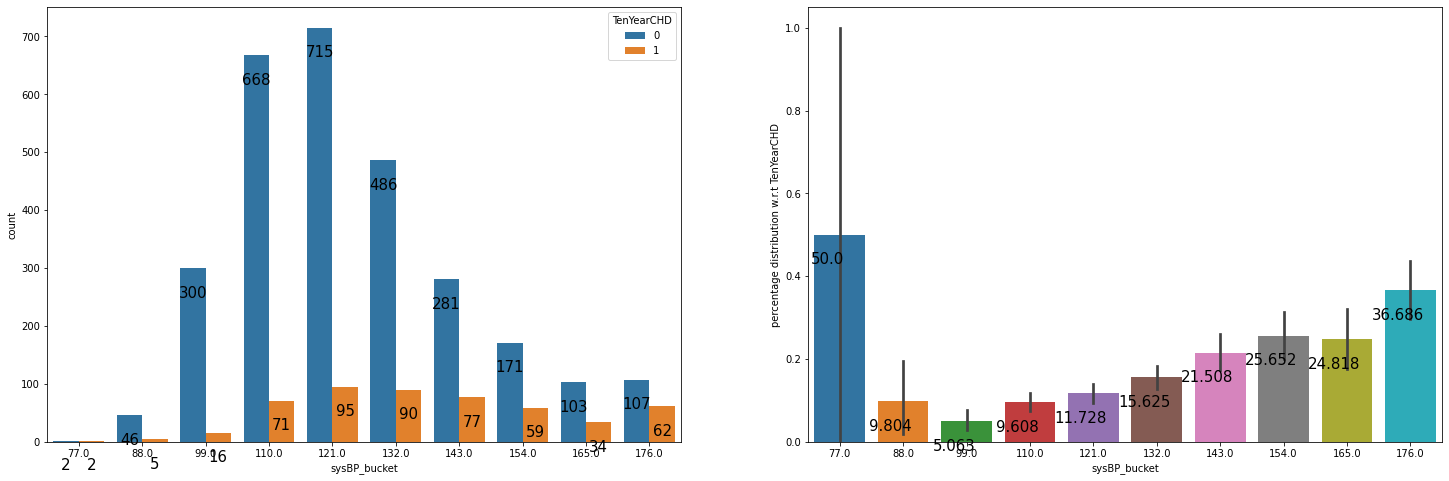

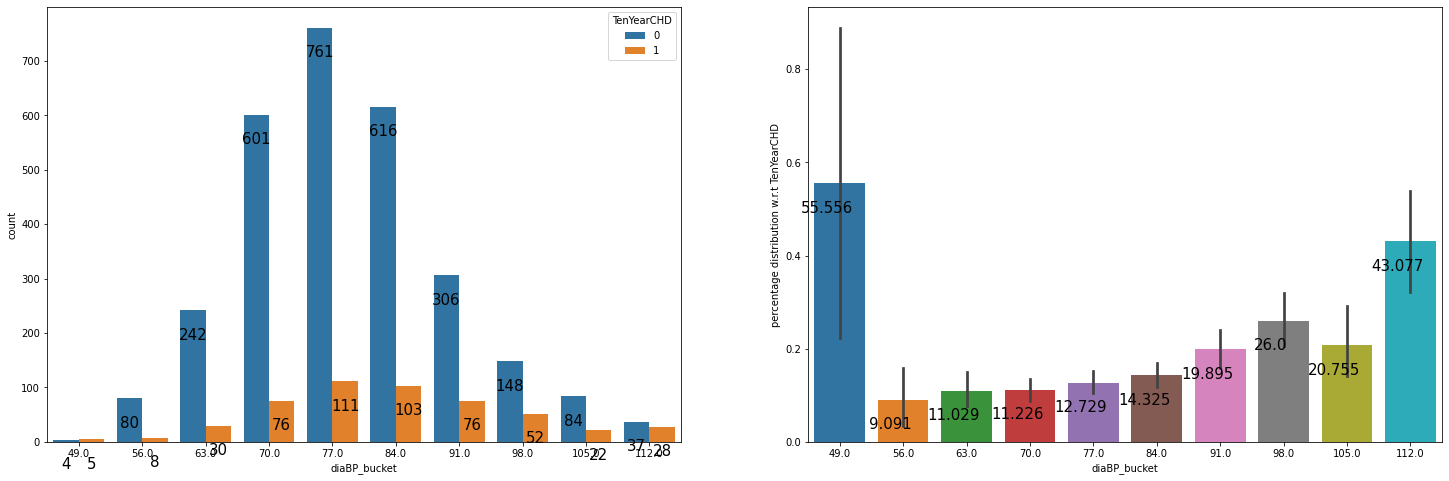

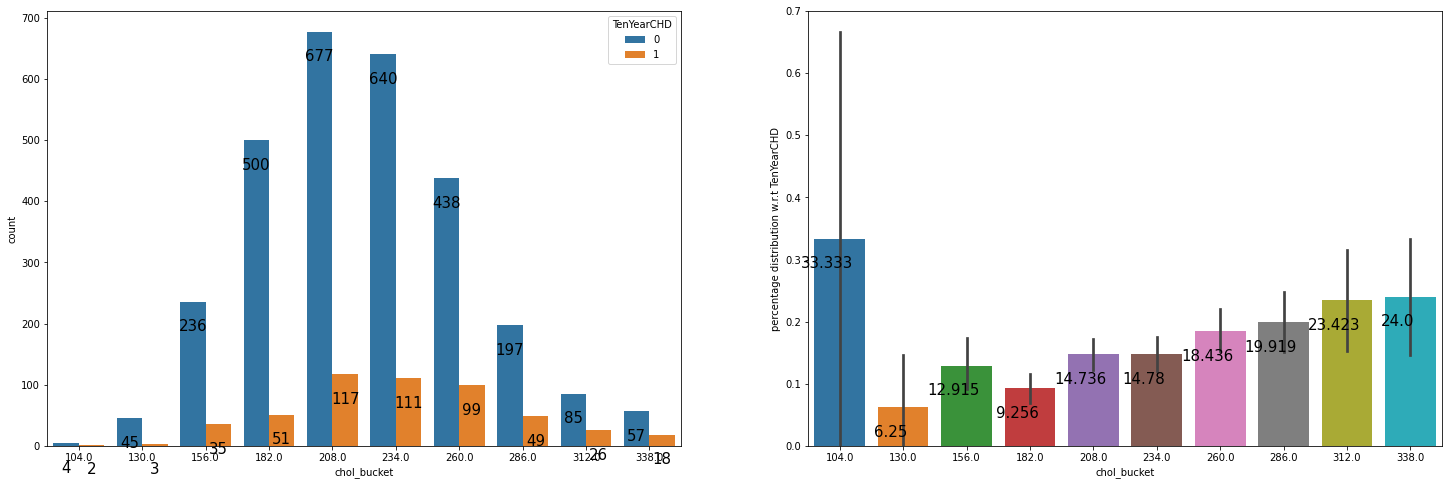

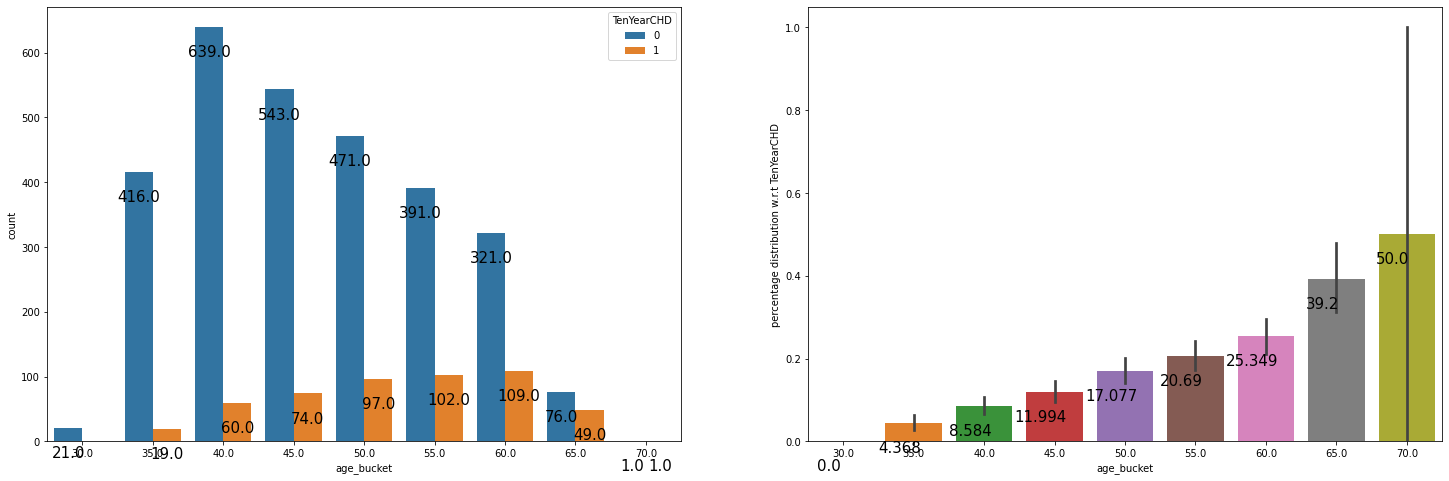

In [ ]:
#Analysising age feature with respect to other categorical features
for v in ['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(v,'TenYearCHD', data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   An increase in glucose levels, SysBp , DiaBp and age tend to have a higher chance for CHD.



# Feature selection and final data processing

In [ ]:
#droping those binned features which were created while doing EDA
data_df=data_df.drop(columns=['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket'])

In [ ]:
data_df=data_df.apply(pd.to_numeric)#for further analysis,converting data values to numeric since some values are encoded as 'object' Dtype


## correlation analysis

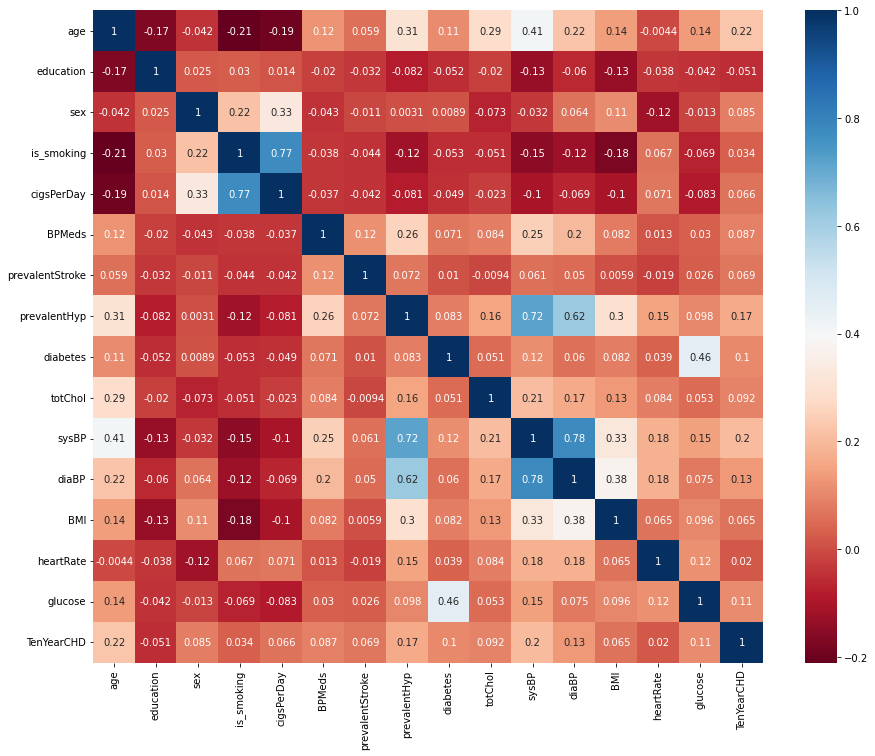

In [ ]:
#Checking correlation between each features
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

REMARKS:

'SysBP' and 'DiaBp' is having high correlation of 0.78 followed by 'cigsPerDay' and 'is_smoking' with 0.77, 'SysBP' and 'prevalentHyp' with 0.72  and 'DiaBp' and 'prevalentHyp' with 0.62.

In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'.



In [ ]:
data_df['PP']=abs(data_df['sysBP']-data_df['diaBP'])#Introducing 'PP' feature in the dataset
data_df=data_df.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])#removing other irrelevant highly correlated features 

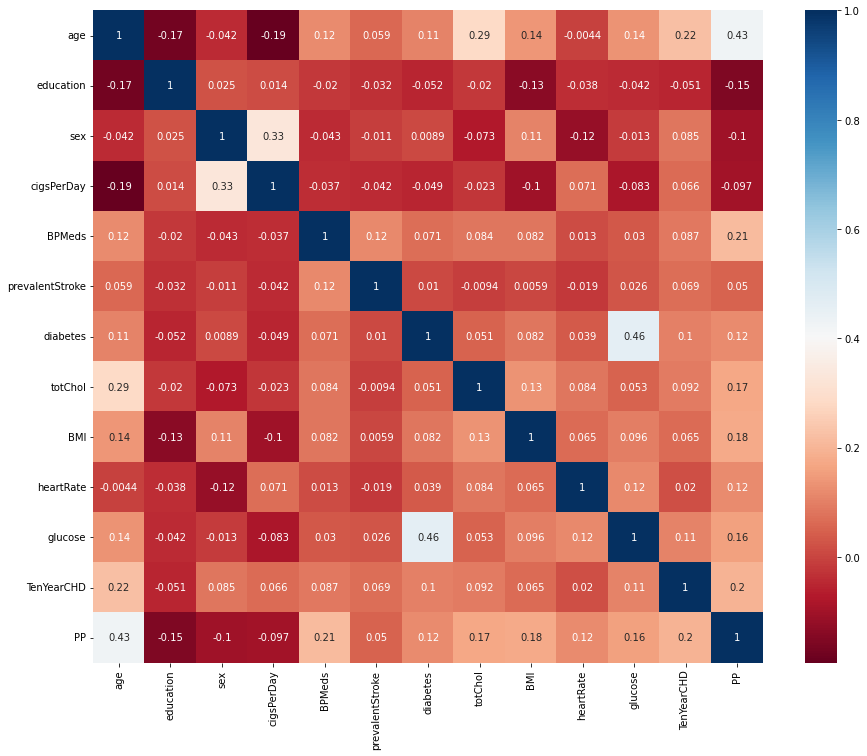

In [ ]:
#Rechecking correlation after necessary changes
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

## Handling class imbalance

In [ ]:
#Assigning x and y variables
X = data_df.drop(columns=['TenYearCHD'], axis=1)
y = data_df['TenYearCHD']

In [ ]:
#checking value count of target variable
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Class imbalance is observed w.r.t target variable.

inorder to resolve class imbalance Synthetic Minority Over-sampling Technique is used here. 

In [ ]:
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [ ]:
#checking value count of target variable
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

## Feature selection based on information gain and feature importance

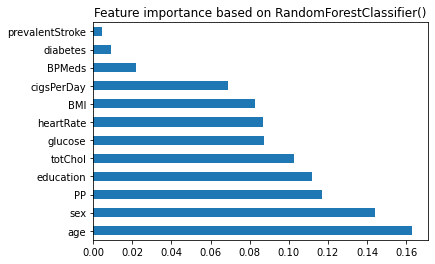

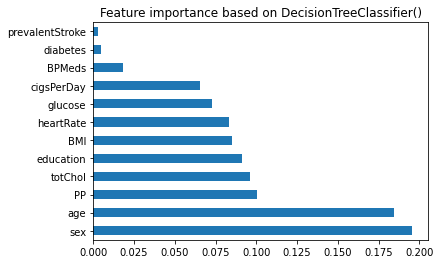

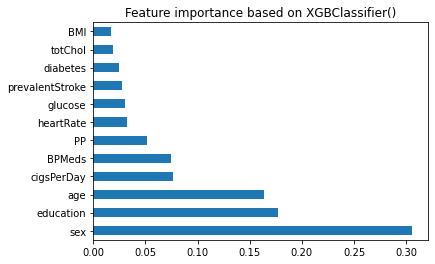

In [ ]:
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

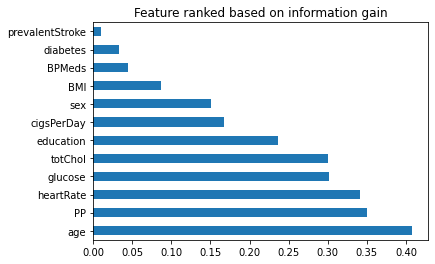

In [ ]:
#Analysing feature based on information gain using mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
ranked_features=pd.Series(mutual_data,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')#barplot based based on information gain
plt.title('Feature ranked based on information gain')
plt.show()

REMARKS:

After analysing feature importance and mutual information, features such as 'prevalentStroke','diabetes','BPMeds' and 'BMI' are having less preference.

In [ ]:
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])#Droping features from x variables for further model implementation.

# Model Implementation

## Initialising Train and Test data sets

In [ ]:
#Initialising train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


In [ ]:
#Scaling data using StandardScaler() since all the features are having measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Model implementation preprocessing

In [ ]:
# Creating a dataframe for feeding evaluation score based on each model implemented
model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1'])
 
# Creating necessary dictionaries for feeding the confusion matrix and ROC curve for each model implemented
train_confusion_matrix = {}  
test_confusion_matrix = {}  
curve = {}

In [ ]:
# Creating a function for model implementation as well as feeding the evalution metrics  to the above dataframes dictionaries 
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df):
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:#for gridsearchcv
      print(f'{model.best_estimator_}')
      model_best=model.best_estimator_
      #model prediction
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      #model prediction
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    test_probs = test_probs[:,1]

    # Evaluation scores
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, test_preds))
    # Appendin the dataframe for each iteration
    model_df=model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score
                                },
                               ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

  return model_df, train_confusion_matrix, test_confusion_matrix, curve#This fuction returns the a dataframe with model evaluation score,
                                                                       #confusion_matrix and ROC curve

The below function is used during loop based cross validation and hyperparameter tuning

In [ ]:
# Creating a function for model implementation
def model_build_param_wise(X_train, y_train, X_test, y_test, model_dict,model_df_1):
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'Parameters': model.best_params_
                                },
                               ignore_index = True)
    #For better understanding of parameter based performance rank feature is introduced with respect to each evaluation matric
    #new feature for ranking the evaluation scores
    model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
    model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

    model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
    model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

    model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
    model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

    model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
    model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

    model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
    model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

    #introducing new feature 'score' which is sum of all test score ranks
    model_df_1['score']=0
    for col in ["Test Accuracy Rank",
            "Test Precision Rank","Test Recall Rank",
            "Test ROC AUC Rank","Test F1 Rank"]:
        model_df_1['score']= model_df_1['score']+ model_df_1[col]
    #Sorting the dataframe based on the 'score'
    model_df_1=model_df_1.sort_values(by='score',ascending=False)
    

  return model_df_1

## 1. Decision Tree Classifier

In [ ]:
# Creating a dictionary for model for passing in model built function
models = {'Decision Tree Classifier'        : DecisionTreeClassifier(random_state=42) }

# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       733
           1       0.80      0.82      0.81       707

    accuracy                           0.81      1440
   macro avg       0.81      0.81      0.81      1440
weighted avg       0.81      0.81      0.81      1440



In [ ]:
model_df#Evaluation score

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Decision Tree Classifier             1.0       0.811111              1.0   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0         0.80083           1.0     0.818953            1.0       0.81125   

   Train F1  Test F1  
0       1.0  0.80979

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**


In [ ]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                  'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters'])  

In [ ]:
#Cross validation and hyperparameter tuning
for x in range(5,24):
  for y in range(1,15):
    for z in ["auto", "sqrt", "log2",None, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)                                                            


In [ ]:
Decision_Tree_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Decision_Tree_param_wise.head()

Model  Train Accuracy  Test Accuracy  \
0  Decision Tree Classifier tunned        0.965262       0.838889   
1  Decision Tree Classifier tunned        0.965262       0.838889   
2  Decision Tree Classifier tunned        0.988884       0.838194   
3  Decision Tree Classifier tunned        0.988884       0.838194   
4  Decision Tree Classifier tunned        0.975683       0.836806   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         0.986058        0.843705      0.944291     0.824611       0.965389   
1         0.986058        0.843705      0.944291     0.824611       0.965389   
2         0.994413        0.840517      0.983425     0.827440       0.988917   
3         0.994413        0.840517      0.983425     0.827440       0.988917   
4         0.986811        0.835227      0.964549     0.831683       0.975751   

   Test ROC AUC  Train F1  ...  Test Accuracy Rank Train Precision Rank  \
0      0.838636  0.964722  ...              7970.5               7659.5   
1      0.838636  0.964722  ...              7970.5               7659.5   
2      0.838004  0.988889  ...              7968.5               7829.5   
3      0.838004  0.988889  ...              7968.5               7829.5   
4      0.836715  0.975553  ...              7964.5               7672.5   

   Test Precision Rank  Train Recall Rank  Test Recall Rank  \
0               7858.5             7519.0            7784.0   
1               7858.5             7519.0            7784.0   
2               7780.5             7766.5            7828.5   
3               7780.5             7766.5            7828.5   
4               7689.5             7717.0            7881.0   

   Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  Test F1 Rank    score  
0              7609.5             7970.5         7604.5        7970.5  39554.0  
1              7609.5             7970.5         7604.5        7970.5  39554.0  
2              7792.5             7968.5         7792.5        7968.5  39514.5  
3              7792.5             7968.5         7792.5        7968.5  39514.5  
4              7743.5             7965.5         7742.5        7966.5  39467.0  

[5 rows x 23 columns]

In [ ]:
#Doing some filtering on the above dataframe to understand some of the best performing parameter combination
Decision_Tree_param_wise[Decision_Tree_param_wise['Test Recall']>0.850071][['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
18          0.999305       0.845833         0.999539        0.827260   
19          0.999305       0.845833         0.999539        0.827260   
56          0.983789       0.839583         0.983441        0.822493   
57          0.983789       0.839583         0.983441        0.822493   
797         0.863131       0.816667         0.841174        0.790301   
798         0.863131       0.816667         0.841174        0.790301   
6           0.994210       0.842361         0.997221        0.831492   
7           0.994210       0.842361         0.997221        0.831492   
419         0.999768       0.822917         1.000000        0.800532   
2254        0.835109       0.798611         0.809847        0.764930   
2255        0.835109       0.798611         0.809847        0.764930   

      Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
18        0.999079     0.867044       0.999307      0.846210  0.846685   
19        0.999079     0.867044       0.999307      0.846210  0.846685   
56        0.984346     0.858557       0.983785      0.839920  0.840138   
57        0.984346     0.858557       0.983785      0.839920  0.840138   
797       0.897330     0.852900       0.862924      0.817309  0.820408   
798       0.897330     0.852900       0.862924      0.817309  0.820408   
6         0.991252     0.851485       0.994228      0.842523  0.841370   
7         0.991252     0.851485       0.994228      0.842523  0.841370   
419       0.999540     0.851485       0.999770      0.823423  0.825223   
2254      0.878453     0.851485       0.834846      0.799549  0.805890   
2255      0.878453     0.851485       0.834846      0.799549  0.805890   

      Train F1                                         Parameters  
18    0.999309  {'criterion': 'gini', 'max_depth': 23, 'max_fe...  
19    0.999309  {'criterion': 'gini', 'max_depth': 23, 'max_fe...  
56    0.983893  {'criterion': 'gini', 'max_depth': 19, 'max_fe...  
57    0.983893  {'criterion': 'gini', 'max_depth': 19, 'max_fe...  
797   0.868345  {'criterion': 'entropy', 'max_depth': 10, 'max...  
798   0.868345  {'criterion': 'entropy', 'max_depth': 10, 'max...  
6     0.994228  {'criterion': 'gini', 'max_depth': 21, 'max_fe...  
7     0.994228  {'criterion': 'gini', 'max_depth': 21, 'max_fe...  
419   0.999770  {'criterion': 'gini', 'max_depth': 19, 'max_fe...  
2254  0.842756  {'criterion': 'entropy', 'max_depth': 10, 'max...  
2255  0.842756  {'criterion': 'entropy', 'max_depth': 10, 'max...

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [ ]:
#the best parameters
Decision_Tree_param_wise['Parameters'][18]

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 3,
 'min_samples_leaf': 1}

In [ ]:
#Appending the the same to the main dataframe for future comparison
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           param_grid={'max_depth':  [23],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': [3],
                                                                      'criterion': ['gini']},cv=5)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)                                                                     

DecisionTreeClassifier(max_depth=23, max_features=3, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.83      0.84       733
           1       0.83      0.87      0.85       707

    accuracy                           0.85      1440
   macro avg       0.85      0.85      0.85      1440
weighted avg       0.85      0.85      0.85      1440



Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.811111   
1  Decision Tree Classifier tunned        0.999305       0.845833   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000         0.80083      1.000000     0.818953       1.000000   
1         0.999539         0.82726      0.999079     0.867044       0.999307   

   Test ROC AUC  Train F1   Test F1  
0       0.81125  1.000000  0.809790  
1       0.84621  0.999309  0.846685

Train and test confusion matrix for Decision Tree Classifier


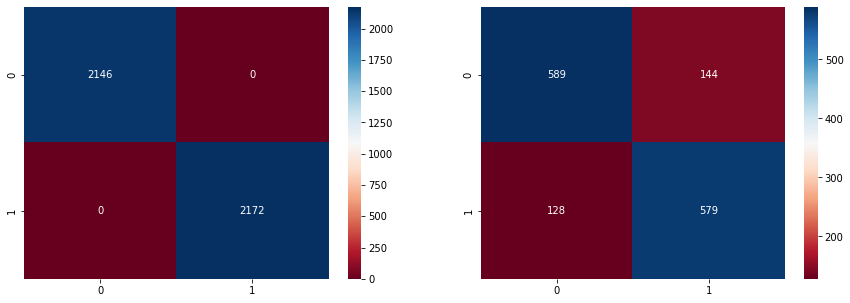

Train and test confusion matrix for Decision Tree Classifier tunned


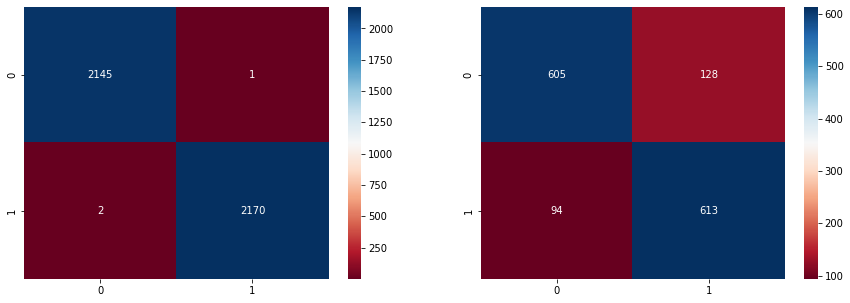

Text(0.5, 1.0, 'ROC CURVE')

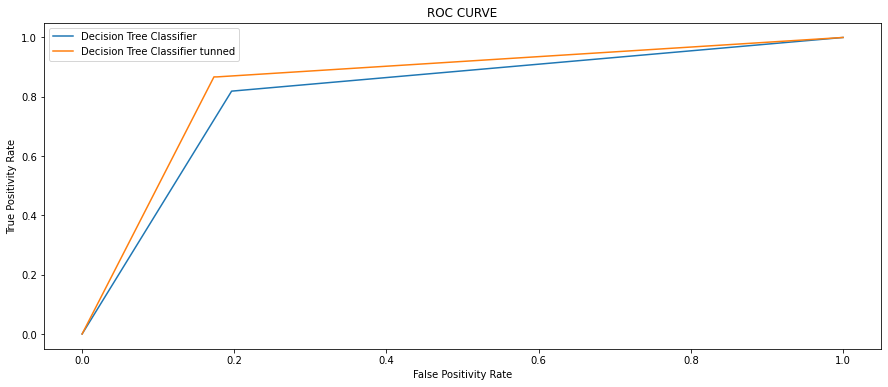

In [ ]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['Decision Tree Classifier','Decision Tree Classifier tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Decision Tree Classifier')
sns.heatmap(train_confusion_matrix['Decision Tree Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Decision Tree Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Decision Tree Classifier tunned')
sns.heatmap(train_confusion_matrix['Decision Tree Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Decision Tree Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['Decision Tree Classifier']
sns.lineplot(x = value[0], y = value[1], label = 'Decision Tree Classifier')#ROC curve for untunned model
value=curve['Decision Tree Classifier tunned']
sns.lineplot(x = value[0], y = value[1], label = 'Decision Tree Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 2. Logistic Regression classification

In [ ]:
# Creating a dictionary for model for passing in model built function
models = {'Logistic Regression'        : LogisticRegression(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       733
           1       0.67      0.70      0.68       707

    accuracy                           0.68      1440
   macro avg       0.68      0.68      0.68      1440
weighted avg       0.68      0.68      0.68      1440



In [ ]:
display(model_df[model_df['Model'].isin(['Logistic Regression','Logistic Regression tunned'])])#Evaluation scores

Model  Train Accuracy  Test Accuracy  Train Precision  \
2  Logistic Regression        0.660723       0.679167         0.659882   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
2        0.665317      0.671731     0.697313       0.660656      0.679488   

   Train F1   Test F1  
2  0.665754  0.680939

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [ ]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])  

In [ ]:
#Hyperparameter tuning for liblinear solver and updating model_df_1 for every parameter combination
for x in ['l1', 'l2']:
  for y in np.logspace(-5, 4, 30):
    for z in ['liblinear']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)  

#Hyperparameter tuning for 'lbfgs' & 'newton-cg' solver and updating model_df_1 for every parameter combination
for x in ['l2','none']:
  for y in np.logspace(-5, 4, 30):
    for z in ['lbfgs','newton-cg']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)   
          
#Hyperparameter tuning for 'elasticnet' solver and updating model_df_1 for every parameter combination
for x in ['elasticnet']:
  for y in np.logspace(-5, 4, 30):
    for z in ['saga']:
      for a in np.logspace(-5, 0, 30):
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z],
                                                                   'l1_ratio' :[a]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)    

In [ ]:
Logistic_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Logistic_param_wise.head()

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression tunned        0.660954       0.681944         0.659603   
1  Logistic Regression tunned        0.660028       0.681944         0.658702   
2  Logistic Regression tunned        0.662112       0.682639         0.660948   
3  Logistic Regression tunned        0.660491       0.681250         0.659296   
4  Logistic Regression tunned        0.660259       0.680556         0.659574   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0        0.666667      0.673573     0.704385       0.660878      0.682342   
1        0.667564      0.672652     0.701556       0.659951      0.682292   
2        0.669377      0.674033     0.698727       0.662040      0.682924   
3        0.666667      0.672652     0.701556       0.660417      0.681610   
4        0.666218      0.670810     0.700141       0.660195      0.680903   

    Test F1  ...  Test Accuracy Rank Train Precision Rank  \
0  0.685007  ...              1077.5                958.0   
1  0.684138  ...              1077.5                314.0   
2  0.683737  ...              1080.0               1068.0   
3  0.683666  ...              1074.5                413.0   
4  0.682759  ...              1070.0                431.0   

   Test Precision Rank  Train Recall Rank  Test Recall Rank  \
0               1065.5              960.0             985.0   
1               1072.0              954.0             979.5   
2               1078.0              962.0             964.0   
3               1065.5              954.0             979.5   
4               1061.5              293.0             974.0   

   Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  Test F1 Rank   score  
0              1049.0             1079.0          964.0        1023.0  5230.0  
1               386.0             1078.0          905.0        1021.0  5228.0  
2              1066.0             1080.0          970.0        1020.0  5222.0  
3               445.0             1075.0          956.0        1019.0  5213.5  
4               439.0             1071.5          339.0        1014.5  5191.5  

[5 rows x 23 columns]

In [ ]:
#Doing some filtering on the above dataframe to understand some of the best performing parameter combination
df=Logistic_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].sort_values(by='Train Precision',ascending=False)
df[(df['Test Recall']>0.691655) & (df['Test Accuracy']>0.676389)].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0          0.660954       0.681944         0.659603        0.666667   
17         0.660491       0.679861         0.659584        0.664439   
8          0.660491       0.680556         0.659009        0.665328   
16         0.660723       0.679861         0.659594        0.664439   
1          0.660028       0.681944         0.658702        0.667564   
..              ...            ...              ...             ...   
863        0.659101       0.677083         0.657942        0.663957   
870        0.659101       0.677083         0.657942        0.663957   
877        0.659101       0.677083         0.657942        0.663957   
860        0.659101       0.677083         0.657942        0.663957   
713        0.656322       0.678472         0.655235        0.665761   

     Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
0        0.673573     0.704385       0.660878      0.682342  0.685007   
17       0.671731     0.702970       0.660423      0.680271  0.683162   
8        0.673573     0.702970       0.660412      0.680953  0.683631   
16       0.672652     0.702970       0.660650      0.680271  0.683162   
1        0.672652     0.701556       0.659951      0.682292  0.684138   
..            ...          ...            ...           ...       ...   
863      0.671271     0.693069       0.659028      0.677367  0.678201   
870      0.671271     0.693069       0.659028      0.677367  0.678201   
877      0.671271     0.693069       0.659028      0.677367  0.678201   
860      0.671271     0.693069       0.659028      0.677367  0.678201   
713      0.668508     0.693069       0.656249      0.678731  0.679141   

     Train F1                                         Parameters  
0    0.666515  {'C': 0.05298316906283713, 'l1_ratio': 0.45203...  
17   0.665602  {'C': 0.22122162910704501, 'l1_ratio': 1.0, 'p...  
8    0.666211  {'C': 0.1082636733874054, 'l1_ratio': 1.0, 'pe...  
16   0.666059  {'C': 0.1082636733874054, 'l1_ratio': 0.672335...  
1    0.665604  {'C': 0.02592943797404667, 'l1_ratio': 0.30391...  
..        ...                                                ...  
863  0.664540  {'C': 0.006210169418915616, 'l1_ratio': 0.0011...  
870  0.664540  {'C': 0.006210169418915616, 'l1_ratio': 0.0003...  
877  0.664540  {'C': 0.006210169418915616, 'l1_ratio': 0.0005...  
860  0.664540  {'C': 0.006210169418915616, 'l1_ratio': 0.0007...  
713  0.661805  {'C': 0.0030391953823131978, 'l1_ratio': 0.028...  

[787 rows x 11 columns]

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [ ]:
#the best parameters
Logistic_param_wise['Parameters'][0]

{'C': 0.05298316906283713,
 'l1_ratio': 0.452035365636025,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [ ]:
#Appending the the same to the main dataframe for future comparison
models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : ['elasticnet'],
                                                                   'C'       : [0.05298316906283713],
                                                                   'solver'  : ['saga'],
                                                                   'l1_ratio' :[0.452035365636025]}
                                                      )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

LogisticRegression(C=0.05298316906283713, l1_ratio=0.452035365636025,
                   penalty='elasticnet', random_state=42, solver='saga')
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       733
           1       0.67      0.70      0.69       707

    accuracy                           0.68      1440
   macro avg       0.68      0.68      0.68      1440
weighted avg       0.68      0.68      0.68      1440



Model  Train Accuracy  Test Accuracy  Train Precision  \
2         Logistic Regression        0.660723       0.679167         0.659882   
3  Logistic Regression tunned        0.660954       0.681944         0.659603   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
2        0.665317      0.671731     0.697313       0.660656      0.679488   
3        0.666667      0.673573     0.704385       0.660878      0.682342   

   Train F1   Test F1  
2  0.665754  0.680939  
3  0.666515  0.685007

Train and test confusion matrix for Logistic Regression


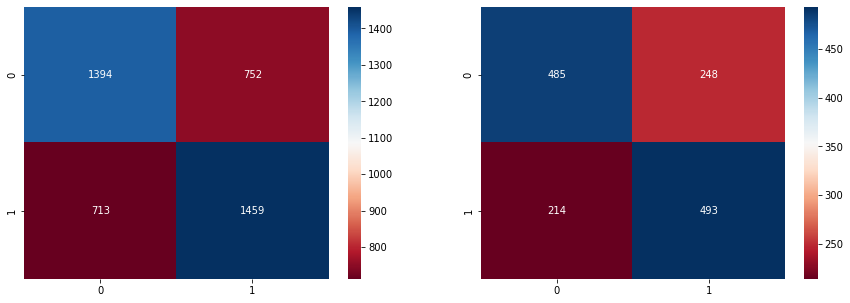

Train and test confusion matrix for Logistic Regression tunned


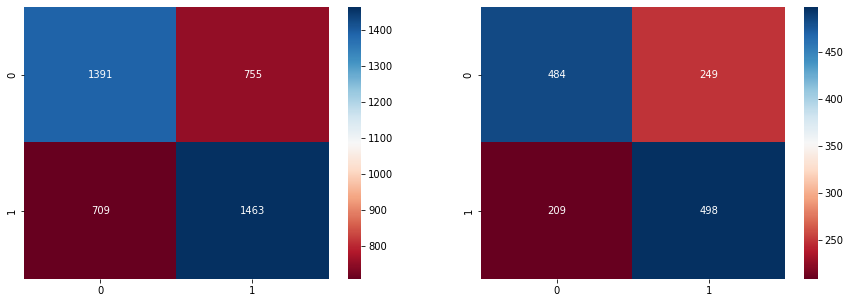

Text(0.5, 1.0, 'ROC CURVE')

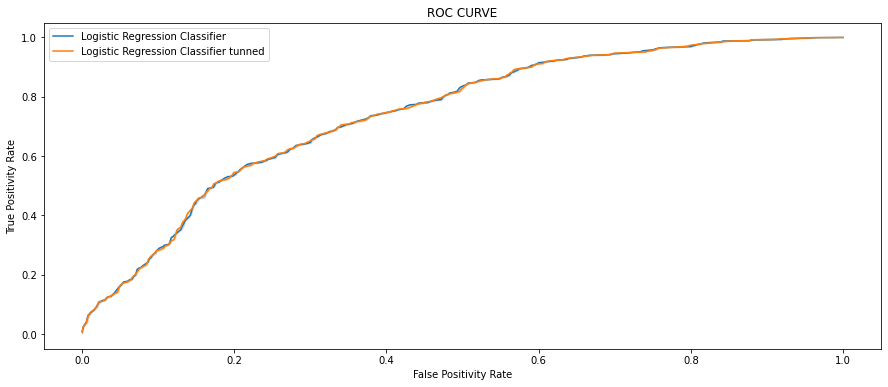

In [ ]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['Logistic Regression','Logistic Regression tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Logistic Regression')
sns.heatmap(train_confusion_matrix['Logistic Regression'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Logistic Regression'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Logistic Regression tunned')
sns.heatmap(train_confusion_matrix['Logistic Regression tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Logistic Regression tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['Logistic Regression']
sns.lineplot(x = value[0], y = value[1], label = 'Logistic Regression Classifier')#ROC curve for untunned model
value=curve['Logistic Regression tunned']
sns.lineplot(x = value[0], y = value[1], label = 'Logistic Regression Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 3. KNN Classifier

In [ ]:
# Creating a dictionary for model for passing in model built function
models = {'KNN' : KNeighborsClassifier()}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       733
           1       0.75      0.95      0.84       707

    accuracy                           0.82      1440
   macro avg       0.84      0.82      0.82      1440
weighted avg       0.84      0.82      0.82      1440



In [ ]:
display(model_df[model_df['Model'].isin(['KNN','KNN tunned'])])#Evaluation scores

Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4   KNN        0.877026       0.818056         0.815941        0.748603   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  
4      0.975599     0.947666       0.876429      0.820354  0.888656  0.836454

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [ ]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [ ]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in range(1,10):
  for y in ['uniform','distance']:
    for z in ['minkowski','euclidean','manhattan']:
        models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [x],
                                                   'weights' : [y],
                                                   'metric' : [z]},
                                      cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [ ]:
KNN_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
KNN_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0   KNN tunned        1.000000       0.899306         1.000000   
1   KNN tunned        1.000000       0.899306         1.000000   
2   KNN tunned        1.000000       0.899306         1.000000   
3   KNN tunned        1.000000       0.884028         1.000000   
4   KNN tunned        1.000000       0.884028         1.000000   
5   KNN tunned        1.000000       0.884028         1.000000   
6   KNN tunned        1.000000       0.884028         1.000000   
7   KNN tunned        1.000000       0.884028         1.000000   
8   KNN tunned        1.000000       0.884028         1.000000   
9   KNN tunned        0.985873       0.896528         1.000000   
12  KNN tunned        1.000000       0.875694         1.000000   
11  KNN tunned        0.987726       0.882639         1.000000   
10  KNN tunned        0.987726       0.882639         1.000000   
13  KNN tunned        1.000000       0.873611         1.000000   
14  KNN tunned        1.000000       0.859028         1.000000   
15  KNN tunned        1.000000       0.859028         1.000000   
16  KNN tunned        1.000000       0.872222         1.000000   
17  KNN tunned        1.000000       0.868750         1.000000   
18  KNN tunned        1.000000       0.863889         1.000000   
20  KNN tunned        0.933302       0.862500         0.888614   
19  KNN tunned        0.939324       0.865972         0.923316   
21  KNN tunned        1.000000       0.858333         1.000000   
22  KNN tunned        1.000000       0.852083         1.000000   
23  KNN tunned        1.000000       0.852083         1.000000   
53  KNN tunned        1.000000       0.858333         1.000000   
25  KNN tunned        1.000000       0.845833         1.000000   
24  KNN tunned        1.000000       0.845833         1.000000   
26  KNN tunned        0.906670       0.852083         0.885403   
27  KNN tunned        0.915007       0.844444         0.861723   
28  KNN tunned        0.915007       0.844444         0.861723   
29  KNN tunned        1.000000       0.835417         1.000000   
30  KNN tunned        1.000000       0.835417         1.000000   
31  KNN tunned        0.903659       0.843056         0.854318   
32  KNN tunned        0.883742       0.845139         0.866872   
33  KNN tunned        0.884437       0.842361         0.839626   
34  KNN tunned        0.922186       0.843750         0.893654   
35  KNN tunned        0.922186       0.843750         0.893654   
36  KNN tunned        1.000000       0.831944         1.000000   
37  KNN tunned        1.000000       0.831944         1.000000   
39  KNN tunned        1.000000       0.828472         1.000000   
38  KNN tunned        1.000000       0.828472         1.000000   
40  KNN tunned        1.000000       0.825000         1.000000   
41  KNN tunned        1.000000       0.825000         1.000000   
42  KNN tunned        0.871700       0.830556         0.832648   
43  KNN tunned        0.884206       0.820833         0.850671   
44  KNN tunned        0.884206       0.820833         0.850671   
45  KNN tunned        0.877026       0.818056         0.815941   
46  KNN tunned        0.877026       0.818056         0.815941   
47  KNN tunned        0.854794       0.799306         0.797688   
48  KNN tunned        0.854794       0.799306         0.797688   
49  KNN tunned        0.861973       0.803472         0.826159   
50  KNN tunned        0.861973       0.803472         0.826159   
51  KNN tunned        0.842288       0.796528         0.788618   
52  KNN tunned        0.842288       0.796528         0.788618   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0         0.843521      1.000000     0.975955       1.000000      0.900665   
1         0.843521      1.000000     0.975955       1.000000      0.900665   
2         0.843521      1.000000     0.975955       1.000000      0.900665   
3         0.817647      1.000000     0.983027       1.000000      

In [ ]:
#Dataframe of evalustion scores for each combination of parameters
KNN_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
15        1.000000       0.859028         1.000000        0.784424   
3         1.000000       0.884028         1.000000        0.817647   
4         1.000000       0.884028         1.000000        0.817647   
5         1.000000       0.884028         1.000000        0.817647   
6         1.000000       0.884028         1.000000        0.817647   
7         1.000000       0.884028         1.000000        0.817647   
8         1.000000       0.884028         1.000000        0.817647   
14        1.000000       0.859028         1.000000        0.784424   
23        1.000000       0.852083         1.000000        0.776286   
22        1.000000       0.852083         1.000000        0.776286   
0         1.000000       0.899306         1.000000        0.843521   
30        1.000000       0.835417         1.000000        0.758242   
29        1.000000       0.835417         1.000000        0.758242   
24        1.000000       0.845833         1.000000        0.770950   
1         1.000000       0.899306         1.000000        0.843521   
25        1.000000       0.845833         1.000000        0.770950   
2         1.000000       0.899306         1.000000        0.843521   
36        1.000000       0.831944         1.000000        0.755214   
37        1.000000       0.831944         1.000000        0.755214   
40        1.000000       0.825000         1.000000        0.748092   
41        1.000000       0.825000         1.000000        0.748092   
21        1.000000       0.858333         1.000000        0.790081   
39        1.000000       0.828472         1.000000        0.752747   
38        1.000000       0.828472         1.000000        0.752747   
12        1.000000       0.875694         1.000000        0.813539   
27        0.915007       0.844444         0.861723        0.772881   
17        1.000000       0.868750         1.000000        0.804706   
28        0.915007       0.844444         0.861723        0.772881   
18        1.000000       0.863889         1.000000        0.799531   
13        1.000000       0.873611         1.000000        0.813620   
16        1.000000       0.872222         1.000000        0.812425   
53        1.000000       0.858333         1.000000        0.794842   
20        0.933302       0.862500         0.888614        0.803337   
45        0.877026       0.818056         0.815941        0.748603   
46        0.877026       0.818056         0.815941        0.748603   
31        0.903659       0.843056         0.854318        0.784615   
33        0.884437       0.842361         0.839626        0.789855   
47        0.854794       0.799306         0.797688        0.735892   
48        0.854794       0.799306         0.797688        0.735892   
9         0.985873       0.896528         1.000000        0.878049   
11        0.987726       0.882639         1.000000        0.854881   
10        0.987726       0.882639         1.000000        0.854881   
35        0.922186       0.843750         0.893654        0.797531   
34        0.922186       0.843750         0.893654        0.797531   
42        0.871700       0.830556         0.832648        0.780606   
19        0.939324       0.865972         0.923316        0.835509   
43        0.884206       0.820833         0.850671        0.779577   
44        0.884206       0.820833         0.850671        0.779577   
26        0.906670       0.852083         0.885403        0.826720   
32        0.883742       0.845139         0.866872        0.818421   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
15      1.000000     0.983027       1.000000      0.861227  0.872567   
3       1.000000     0.983027       1.000000      0.885784  0.892742   
4       1.000000     0.983027       1.000000      0.885784  0.892742   
5       1.000000     0.983027       1.000000      0.885784  0.892742   
6       1.000000     0.983027       1.000000      0.885784  0.892742   
7

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [ ]:
#the best parameters
KNN_param_wise['Parameters'][5]

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
#Appending the the same to the main dataframe for future comparison
models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [2],
                                                   'weights' : ['distance'],
                                                   'metric' : ['minkowski']},
                                      cv=5)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

KNeighborsClassifier(n_neighbors=2, weights='distance')
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       733
           1       0.82      0.98      0.89       707

    accuracy                           0.88      1440
   macro avg       0.90      0.89      0.88      1440
weighted avg       0.90      0.88      0.88      1440



Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4         KNN        0.877026       0.818056         0.815941        0.748603   
5  KNN tunned        1.000000       0.884028         1.000000        0.817647   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  
4      0.975599     0.947666       0.876429      0.820354  0.888656  0.836454  
5      1.000000     0.983027       1.000000      0.885784  1.000000  0.892742

Train and test confusion matrix for KNN


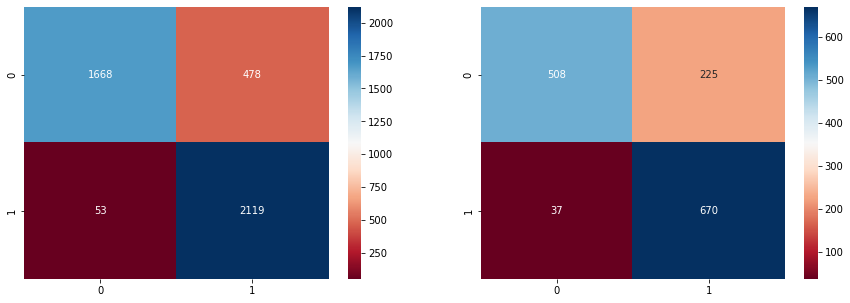

Train and test confusion matrix for KNN tunned


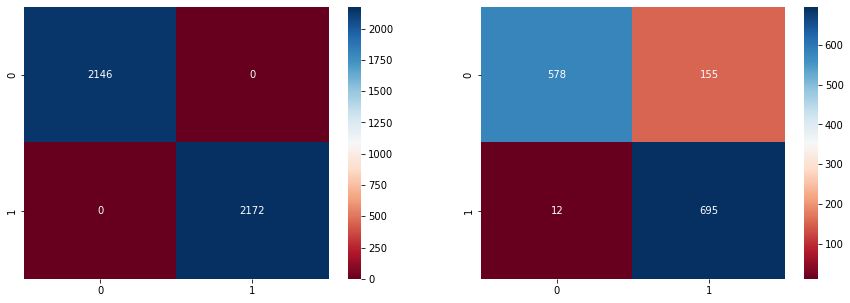

Text(0.5, 1.0, 'ROC CURVE')

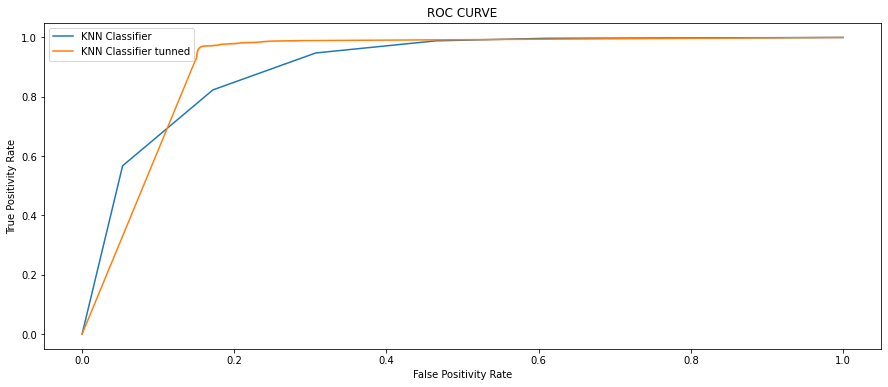

In [ ]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['KNN','KNN tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for KNN')
sns.heatmap(train_confusion_matrix['KNN'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['KNN'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for KNN tunned')
sns.heatmap(train_confusion_matrix['KNN tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['KNN tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['KNN']
sns.lineplot(x = value[0], y = value[1], label = 'KNN Classifier')#ROC curve for untunned model
value=curve['KNN tunned']
sns.lineplot(x = value[0], y = value[1], label = 'KNN Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 4. Support vector classifier

In [ ]:
# Creating a dictionary for model for passing in model built function
models = {'SVC'        : SVC(probability=True,random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       733
           1       0.77      0.73      0.75       707

    accuracy                           0.76      1440
   macro avg       0.76      0.76      0.76      1440
weighted avg       0.76      0.76      0.76      1440



In [ ]:
display(model_df[model_df['Model'].isin(['SVC','SVC tunned'])])#Evaluation scores

Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
6   SVC        0.790875       0.759028         0.812716        0.767857   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  
6      0.759208     0.729844       0.791067       0.75851  0.785051  0.748368

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [ ]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [ ]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in [0.1, 1, 10, 100, 1000]:
        models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [x]}
                                            )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [ ]:
SVC_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
SVC_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4  SVC tunned        0.978925       0.850000         0.975766        0.815148   
0  SVC tunned        0.935155       0.825000         0.932358        0.801325   
1  SVC tunned        0.863131       0.789583         0.876967        0.790230   
2  SVC tunned        0.790875       0.759028         0.812716        0.767857   
3  SVC tunned        0.710746       0.713889         0.701089        0.691310   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  ...  \
4      0.982505     0.898161       0.978904      0.850854  0.854643  ...   
0      0.939227     0.855728       0.935131      0.825545  0.827633  ...   
1      0.846685     0.777935       0.863231      0.789377  0.784034  ...   
2      0.759208     0.729844       0.791067      0.758510  0.748368  ...   
3      0.740792     0.753890       0.710564      0.714598  0.721245  ...   

   Test Accuracy Rank Train Precision Rank  Test Precision Rank  \
4                 5.0                  5.0                  5.0   
0                 4.0                  4.0                  4.0   
1                 3.0                  3.0                  3.0   
2                 2.0                  2.0                  2.0   
3                 1.0                  1.0                  1.0   

   Train Recall Rank  Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  \
4                5.0               5.0                 5.0                5.0   
0                4.0               4.0                 4.0                4.0   
1                3.0               3.0                 3.0                3.0   
2                2.0               1.0                 2.0                2.0   
3                1.0               2.0                 1.0                1.0   

   Train F1 Rank  Test F1 Rank  score  
4            5.0           5.0   25.0  
0            4.0           4.0   20.0  
1            3.0           3.0   15.0  
2            2.0           2.0    9.0  
3            1.0           1.0    6.0  

[5 rows x 23 columns]

In [ ]:
#Dataframe of evalustion scores for each combination of parameters
SVC_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4        0.978925       0.850000         0.975766        0.815148   
0        0.935155       0.825000         0.932358        0.801325   
1        0.863131       0.789583         0.876967        0.790230   
3        0.710746       0.713889         0.701089        0.691310   
2        0.790875       0.759028         0.812716        0.767857   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  \
4      0.982505     0.898161       0.978904      0.850854  0.979124  0.854643   
0      0.939227     0.855728       0.935131      0.825545  0.935780  0.827633   
1      0.846685     0.777935       0.863231      0.789377  0.861560  0.784034   
3      0.740792     0.753890       0.710564      0.714598  0.720394  0.721245   
2      0.759208     0.729844       0.791067      0.758510  0.785051  0.748368   

                     Parameters  
4  {'C': 1000, 'kernel': 'rbf'}  
0   {'C': 100, 'kernel': 'rbf'}  
1    {'C': 10, 'kernel': 'rbf'}  
3   {'C': 0.1, 'kernel': 'rbf'}  
2     {'C': 1, 'kernel': 'rbf'}

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [ ]:
#the best parameters
SVC_param_wise['Parameters'][4]

{'C': 1000, 'kernel': 'rbf'}

In [ ]:
#Appending the the same to the main dataframe for future comparison
models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [1000]}
                                            )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

SVC(C=1000, probability=True, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       733
           1       0.82      0.90      0.85       707

    accuracy                           0.85      1440
   macro avg       0.85      0.85      0.85      1440
weighted avg       0.85      0.85      0.85      1440



Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
6         SVC        0.790875       0.759028         0.812716        0.767857   
7  SVC tunned        0.978925       0.850000         0.975766        0.815148   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  
6      0.759208     0.729844       0.791067      0.758510  0.785051  0.748368  
7      0.982505     0.898161       0.978904      0.850854  0.979124  0.854643

Train and test confusion matrix for SVC


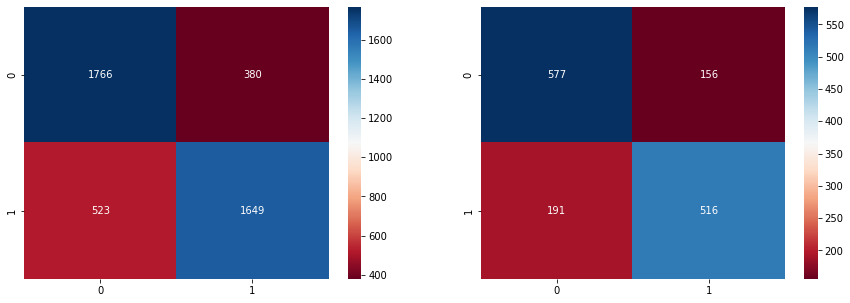

Train and test confusion matrix for SVC tunned


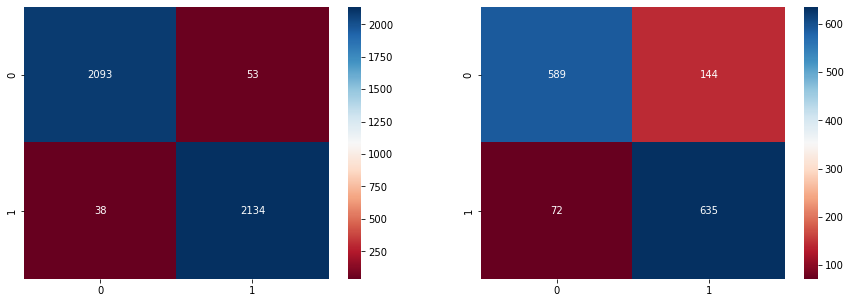

Text(0.5, 1.0, 'ROC CURVE')

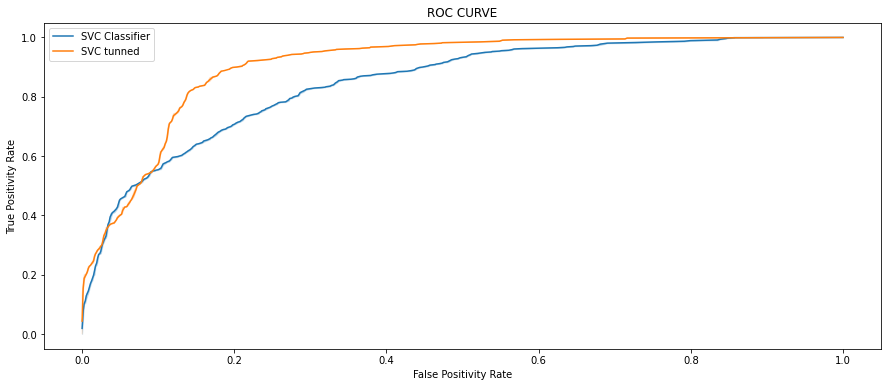

In [ ]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['SVC','SVC tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for SVC')
sns.heatmap(train_confusion_matrix['SVC'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['SVC'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for SVC tunned')
sns.heatmap(train_confusion_matrix['SVC tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['SVC tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['SVC']
sns.lineplot(x = value[0], y = value[1], label = 'SVC Classifier')#ROC curve for untunned model
value=curve['SVC tunned']
sns.lineplot(x = value[0], y = value[1], label = 'SVC tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 5. XGB Classifier

In [ ]:
# Creating a dictionary for model for passing in model built function
models = {'XGB Classifier'        : XGBClassifier(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       733
           1       0.93      0.77      0.84       707

    accuracy                           0.86      1440
   macro avg       0.87      0.86      0.86      1440
weighted avg       0.87      0.86      0.86      1440



In [ ]:
display(model_df[model_df['Model'].isin(['XGB Classifier','XGB Classifier tunned'])])#Evaluation scores

Model  Train Accuracy  Test Accuracy  Train Precision  \
8  XGB Classifier        0.882353       0.857639         0.938356   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
8        0.925424      0.819982     0.772277       0.882731      0.856125   

   Train F1   Test F1  
8  0.875184  0.841943

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above (model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [ ]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [ ]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in [3,  5,  7,  9,  11, 13]:
  for y in np.arange(0.0,40.0,5):
        models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [x],
                                                                    'gamma'   : [y]},  
                                                       )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [ ]:
XGB_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
XGB_param_wise.head()

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  XGB Classifier tunned        0.990736       0.895139         0.999064   
1  XGB Classifier tunned        0.938397       0.886806         0.974129   
2  XGB Classifier tunned        0.962251       0.885417         0.990718   
3  XGB Classifier tunned        0.998610       0.890972         1.000000   
4  XGB Classifier tunned        1.000000       0.890972         1.000000   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0        0.927692      0.982505     0.852900       0.990786      0.894390   
1        0.931746      0.901473     0.830269       0.938621      0.885803   
2        0.930159      0.933702     0.828854       0.962424      0.884414   
3        0.921779      0.997238     0.850071       0.998619      0.890247   
4        0.912913      1.000000     0.859972       1.000000      0.890422   

    Test F1  ...  Test Accuracy Rank Train Precision Rank  \
0  0.888725  ...                48.0                 46.0   
1  0.878085  ...                45.0                 43.0   
2  0.876589  ...                44.0                 45.0   
3  0.884474  ...                46.5                 47.5   
4  0.885652  ...                46.5                 47.5   

   Test Precision Rank  Train Recall Rank  Test Recall Rank  \
0                 43.0               46.0              47.0   
1                 48.0               44.0              45.0   
2                 45.0               45.0              44.0   
3                 34.0               47.0              46.0   
4                 28.0               48.0              48.0   

   Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  Test F1 Rank  score  
0                46.0               48.0           46.0          48.0  234.0  
1                43.0               45.0           43.0          45.0  228.0  
2                45.0               44.0           45.0          44.0  221.0  
3                47.0               46.0           47.0          46.0  218.5  
4                48.0               47.0           48.0          47.0  216.5  

[5 rows x 23 columns]

In [ ]:
#Dataframe of evaluation scores for each combination of parameters
XGB_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4         1.000000       0.890972         1.000000        0.912913   
0         0.990736       0.895139         0.999064        0.927692   
3         0.998610       0.890972         1.000000        0.921779   
1         0.938397       0.886806         0.974129        0.931746   
2         0.962251       0.885417         0.990718        0.930159   
6         0.939555       0.877778         0.979910        0.923445   
7         0.923807       0.877778         0.961905        0.924800   
8         0.920565       0.872222         0.970180        0.925203   
11        0.908986       0.870139         0.958742        0.923453   
5         0.896711       0.872917         0.949479        0.930921   
9         0.896480       0.871528         0.947587        0.929276   
10        0.894627       0.869444         0.945049        0.930348   
12        0.891385       0.865972         0.943259        0.922697   
14        0.884900       0.861111         0.934163        0.916256   
34        0.846920       0.838889         0.880605        0.870515   
19        0.870310       0.855556         0.922432        0.905691   
40        0.833256       0.825694         0.862637        0.848624   
16        0.873553       0.859722         0.926996        0.918740   
15        0.869152       0.860417         0.922672        0.921667   
13        0.879574       0.862500         0.933368        0.926298   
18        0.879805       0.857639         0.933403        0.915563   
33        0.842288       0.839583         0.883685        0.878981   
32        0.842288       0.839583         0.883685        0.878981   
25        0.854562       0.847917         0.896304        0.896104   
22        0.860815       0.853472         0.908902        0.909241   
28        0.848773       0.844444         0.891293        0.890145   
29        0.848773       0.844444         0.891293        0.890145   
35        0.841593       0.839583         0.879592        0.880192   
30        0.844604       0.840972         0.884281        0.884244   
23        0.856183       0.852083         0.909667        0.908940   
37        0.848078       0.838889         0.887526        0.881220   
17        0.874479       0.859028         0.931217        0.924242   
45        0.833025       0.825694         0.863295        0.856250   
36        0.853173       0.839583         0.894359        0.883871   
47        0.833025       0.825694         0.863295        0.856250   
24        0.871237       0.852083         0.926160        0.910299   
27        0.861047       0.850000         0.910230        0.905785   
26        0.861047       0.850000         0.910230        0.905785   
21        0.864289       0.856944         0.917808        0.921008   
41        0.840435       0.834028         0.880452        0.873802   
31        0.847846       0.843056         0.893916        0.893617   
43        0.832330       0.833333         0.865288        0.873600   
20        0.882353       0.857639         0.938356        0.925424   
38        0.844372       0.838194         0.890219        0.887255   
39        0.843678       0.836111         0.887623        0.882927   
42        0.840899       0.834722         0.879020        0.880065   
44        0.835109       0.832639         0.867203        0.877023   
46        0.834414       0.828472         0.875709        0.870968   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
4       1.000000     0.859972       1.000000      0.890422  1.000000   
0       0.982505     0.852900       0.990786      0.894390  0.990715   
3       0.997238     0.850071       0.998619      0.890247  0.998617   
1       0.901473     0.830269       0.938621      0.885803  0.936394   
2       0.933702     0.828854       0.962424      0.884414  0.961365   
6       0.898250     0.818953       0.939806      0.876735  0.937305   
7       0.883517     0.817539       0.924051      0.876709  0.921046 

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [ ]:
#the best parameters
XGB_param_wise['Parameters'][0]

{'gamma': 0.0, 'max_depth': 9}

In [ ]:
#Appending the the same to the main dataframe for future comparison
models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [9],
                                                                    'gamma'   : [0]},  
                                                       )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

XGBClassifier(max_depth=9, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       733
           1       0.93      0.85      0.89       707

    accuracy                           0.90      1440
   macro avg       0.90      0.89      0.89      1440
weighted avg       0.90      0.90      0.89      1440



Model  Train Accuracy  Test Accuracy  Train Precision  \
8         XGB Classifier        0.882353       0.857639         0.938356   
9  XGB Classifier tunned        0.990736       0.895139         0.999064   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
8        0.925424      0.819982     0.772277       0.882731      0.856125   
9        0.927692      0.982505     0.852900       0.990786      0.894390   

   Train F1   Test F1  
8  0.875184  0.841943  
9  0.990715  0.888725

Train and test confusion matrix for XGB Classifier


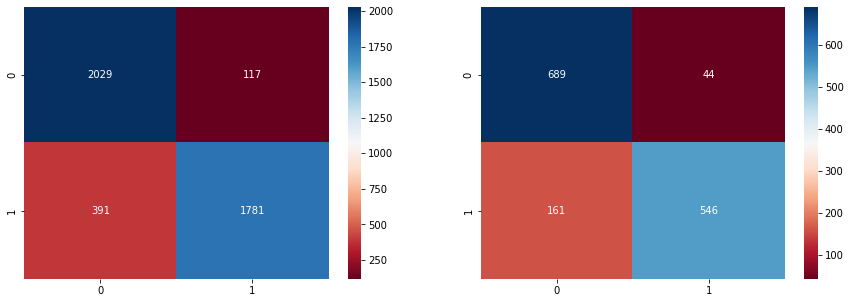

Train and test confusion matrix for XGB Classifier tunned


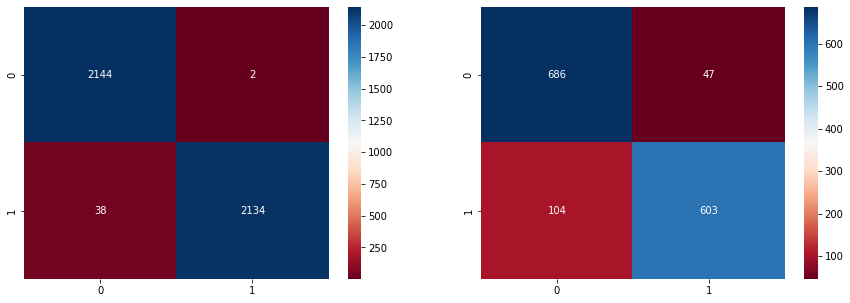

Text(0.5, 1.0, 'ROC CURVE')

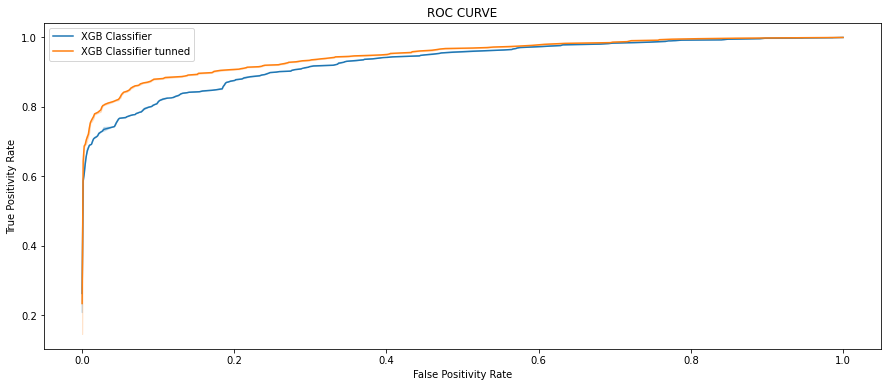

In [ ]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['XGB Classifier','XGB Classifier tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for XGB Classifier')
sns.heatmap(train_confusion_matrix['XGB Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['XGB Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for XGB Classifier tunned')
sns.heatmap(train_confusion_matrix['XGB Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['XGB Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['XGB Classifier']
sns.lineplot(x = value[0], y = value[1], label = 'XGB Classifier')#ROC curve for untunned model
value=curve['XGB Classifier tunned']
sns.lineplot(x = value[0], y = value[1], label = 'XGB Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 6. RandomForest Classifier

In [ ]:
# Creating a dictionary for model for passing in model built function
models = {'Random Forest' : RandomForestClassifier(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       733
           1       0.93      0.88      0.90       707

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



In [ ]:
#Evaluation scores
display(model_df[model_df['Model'].isin(['Random Forest','Random Forest tunned'])])

Model  Train Accuracy  Test Accuracy  Train Precision  \
10  Random Forest             1.0        0.90625              1.0   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
10        0.928144           1.0     0.876945            1.0       0.90573   

    Train F1   Test F1  
10       1.0  0.901818

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above (model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [ ]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [ ]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in ['entropy', 'gini']:
  for y in [6,9,11,15,17,19,21,24]:
    for z in [50,100]:
      for a in ["auto", "sqrt", "log2",None,1,3,5,7]:
        models = {'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': [x],
                                                                'max_depth': [y],
                                                                'n_estimators': [z],
                                                                'max_features': [a] },
                                                          cv = 3)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)          

In [ ]:
Random_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Random_param_wise.head()

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Random Classifier tunned        1.000000       0.911806          1.00000   
1  Random Classifier tunned        1.000000       0.911806          1.00000   
2  Random Classifier tunned        0.999537       0.907639          0.99954   
3  Random Classifier tunned        0.999537       0.907639          0.99954   
4  Random Classifier tunned        1.000000       0.907639          1.00000   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0        0.934132       1.00000     0.882603       1.000000      0.911288   
1        0.934132       1.00000     0.882603       1.000000      0.911288   
2        0.928358       0.99954     0.879774       0.999537      0.907145   
3        0.928358       0.99954     0.879774       0.999537      0.907145   
4        0.929641       1.00000     0.878359       1.000000      0.907120   

    Test F1  ...  Test Accuracy Rank Train Precision Rank  \
0  0.907636  ...               255.5                197.0   
1  0.907636  ...               255.5                197.0   
2  0.903413  ...               252.5                133.5   
3  0.903413  ...               252.5                133.5   
4  0.903273  ...               252.5                197.0   

   Test Precision Rank  Train Recall Rank  Test Recall Rank  \
0                255.5              219.5             255.5   
1                255.5              219.5             255.5   
2                240.5              156.0             249.5   
3                240.5              156.0             249.5   
4                242.5              219.5             247.5   

   Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  Test F1 Rank   score  
0               220.0              255.5          220.0         255.5  1277.5  
1               220.0              255.5          220.0         255.5  1277.5  
2               135.5              253.5          138.5         253.5  1249.5  
3               135.5              253.5          138.5         253.5  1249.5  
4               220.0              251.5          220.0         251.5  1245.5  

[5 rows x 23 columns]

In [ ]:
#Dataframe of evaluation scores for each combination of parameters
Random_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0         1.000000       0.911806         1.000000        0.934132   
1         1.000000       0.911806         1.000000        0.934132   
32        0.999768       0.902083         1.000000        0.916176   
8         0.999768       0.905556         1.000000        0.922963   
40        0.997221       0.901389         0.997238        0.914831   
10        0.999537       0.904861         0.999540        0.921598   
2         0.999537       0.907639         0.999540        0.928358   
3         0.999537       0.907639         0.999540        0.928358   
4         1.000000       0.907639         1.000000        0.929641   
5         1.000000       0.907639         1.000000        0.929641   
14        1.000000       0.904167         1.000000        0.923994   
37        0.999768       0.901389         1.000000        0.918519   
24        1.000000       0.902778         1.000000        0.921248   
23        1.000000       0.902778         1.000000        0.921248   
35        0.999768       0.901389         1.000000        0.918519   
36        0.999537       0.901389         1.000000        0.918519   
13        1.000000       0.904167         1.000000        0.923994   
15        1.000000       0.904167         1.000000        0.923994   
16        1.000000       0.904167         1.000000        0.923994   
6         0.999768       0.906944         1.000000        0.930827   
30        1.000000       0.902083         1.000000        0.921131   
7         0.999768       0.906944         1.000000        0.930827   
46        1.000000       0.900694         1.000000        0.918398   
45        1.000000       0.900694         1.000000        0.918398   
22        0.999768       0.903472         1.000000        0.925150   
12        1.000000       0.904861         1.000000        0.927928   
21        0.999768       0.903472         1.000000        0.925150   
28        0.999768       0.902778         1.000000        0.923767   
27        0.999768       0.902778         1.000000        0.923767   
41        1.000000       0.901389         1.000000        0.921013   
42        1.000000       0.901389         1.000000        0.921013   
31        1.000000       0.902083         1.000000        0.922388   
11        1.000000       0.904861         1.000000        0.927928   
9         1.000000       0.905556         1.000000        0.930618   
26        0.997684       0.903472         0.997240        0.927711   
34        1.000000       0.902083         1.000000        0.924925   
33        1.000000       0.902083         1.000000        0.924925   
29        1.000000       0.902778         1.000000        0.926316   
25        0.997684       0.903472         0.997240        0.927711   
20        0.998147       0.904861         0.997243        0.930514   
19        0.998147       0.904861         0.997243        0.930514   
18        1.000000       0.905556         1.000000        0.933232   
17        1.000000       0.905556         1.000000        0.933232   
47        1.000000       0.901389         1.000000        0.924812   
48        1.000000       0.901389         1.000000        0.924812   
49        1.000000       0.901389         1.000000        0.924812   
39        0.997221       0.902778         0.997696        0.930197   
38        0.997221       0.902778         0.997696        0.930197   
43        0.998610       0.902778         0.999539        0.932824   
44        0.998610       0.902778         0.999539        0.932824   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
0       1.000000     0.882603       1.000000      0.911288  1.000000   
1       1.000000     0.882603       1.000000      0.911288  1.000000   
32      0.999540     0.881188       0.999770      0.901713  0.999770   
8       0.999540     0.881188       0.999770      0.905123  0.999770   
40      0.997238     0.881188       0.997221      0.901031  0.997238   
1

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [ ]:
#the best parameters
Random_param_wise['Parameters'][1]

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
#Appending the the same to the main dataframe for future comparison
models = {'Random Forest tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy'],
                                                                'max_depth': [21],
                                                                'n_estimators': [100],
                                                                'max_features': ['sqrt'] },
                                                          cv = 3)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

RandomForestClassifier(criterion='entropy', max_depth=21, max_features='sqrt',
                       random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       733
           1       0.93      0.88      0.91       707

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



Model  Train Accuracy  Test Accuracy  Train Precision  \
10         Random Forest             1.0       0.906250              1.0   
11  Random Forest tunned             1.0       0.911806              1.0   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
10        0.928144           1.0     0.876945            1.0      0.905730   
11        0.934132           1.0     0.882603            1.0      0.911288   

    Train F1   Test F1  
10       1.0  0.901818  
11       1.0  0.907636

Train and test confusion matrix for Random Forest Classifier


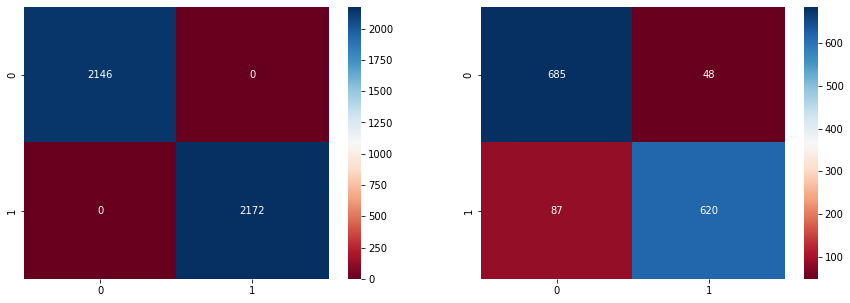

Train and test confusion matrix for Random Forest Classifier tunned


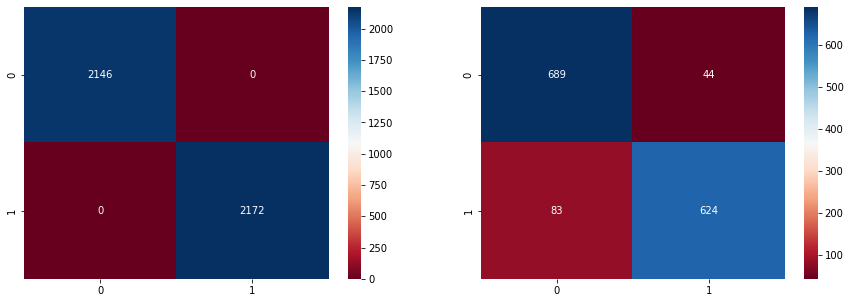

Text(0.5, 1.0, 'ROC CURVE')

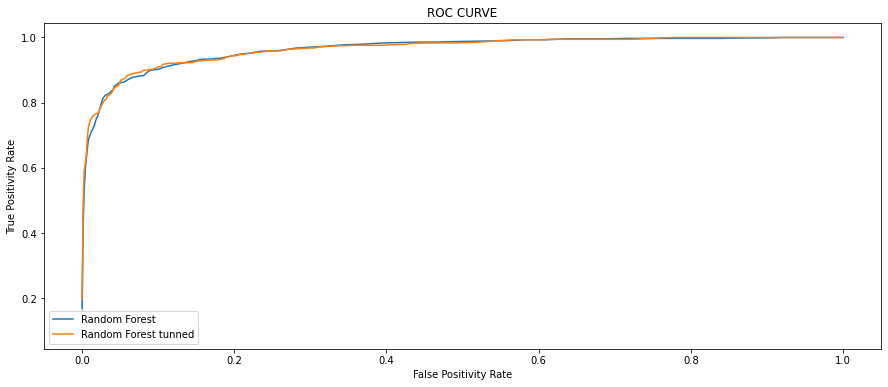

In [ ]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['Random Forest','Random Forest tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Random Forest Classifier')
sns.heatmap(train_confusion_matrix['Random Forest'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Random Forest'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Random Forest Classifier tunned')
sns.heatmap(train_confusion_matrix['Random Forest tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Random Forest tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['Random Forest']
sns.lineplot(x = value[0], y = value[1], label = 'Random Forest')#ROC curve for untunned model
value=curve['Random Forest tunned']
sns.lineplot(x = value[0], y = value[1], label = 'Random Forest tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

# **Results and Conclusion :**

I started off with data cleaning and necessary feature changes, then to comprehend the data an EDA was performed which yielded many meaningful insights about the data, then the features were trimmed down based on various feature selection techniques and finally 6 classification models were implemented namely decision tree classifier, logistic regression classifier, KNN classifier, SVC, XGB and random forest classifier. All of the models were hyperparameter tunned and evaluated based on different evaluation techniques, and the main intention of hyperparameter tunning was to improve overall model performance with stress on reducing true negatives. Out of the models implemented Random Forest, XGB and KNN showed good results and while considering overall performance Random Forest showed great results.

In [ ]:
model_df#the summary of evaluation scores for all the models implemented

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.811111   
1   Decision Tree Classifier tunned        0.999305       0.845833   
2               Logistic Regression        0.660723       0.679167   
3        Logistic Regression tunned        0.660954       0.681944   
4                               KNN        0.877026       0.818056   
5                        KNN tunned        1.000000       0.884028   
6                               SVC        0.790875       0.759028   
7                        SVC tunned        0.978925       0.850000   
8                    XGB Classifier        0.882353       0.857639   
9             XGB Classifier tunned        0.990736       0.895139   
10                    Random Forest        1.000000       0.906250   
11             Random Forest tunned        1.000000       0.911806   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.800830      1.000000     0.818953       1.000000   
1          0.999539        0.827260      0.999079     0.867044       0.999307   
2          0.659882        0.665317      0.671731     0.697313       0.660656   
3          0.659603        0.666667      0.673573     0.704385       0.660878   
4          0.815941        0.748603      0.975599     0.947666       0.876429   
5          1.000000        0.817647      1.000000     0.983027       1.000000   
6          0.812716        0.767857      0.759208     0.729844       0.791067   
7          0.975766        0.815148      0.982505     0.898161       0.978904   
8          0.938356        0.925424      0.819982     0.772277       0.882731   
9          0.999064        0.927692      0.982505     0.852900       0.990786   
10         1.000000        0.928144      1.000000     0.876945       1.000000   
11         1.000000        0.934132      1.000000     0.882603       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.811250  1.000000  0.809790  
1       0.846210  0.999309  0.846685  
2       0.679488  0.665754  0.680939  
3       0.682342  0.666515  0.685007  
4       0.820354  0.888656  0.836454  
5       0.885784  1.000000  0.892742  
6       0.758510  0.785051  0.748368  
7       0.850854  0.979124  0.854643  
8       0.856125  0.875184  0.841943  
9       0.894390  0.990715  0.888725  
10      0.905730  1.000000  0.901818  
11      0.911288  1.000000  0.907636

Text(0.5, 1.0, 'ROC CURVE')

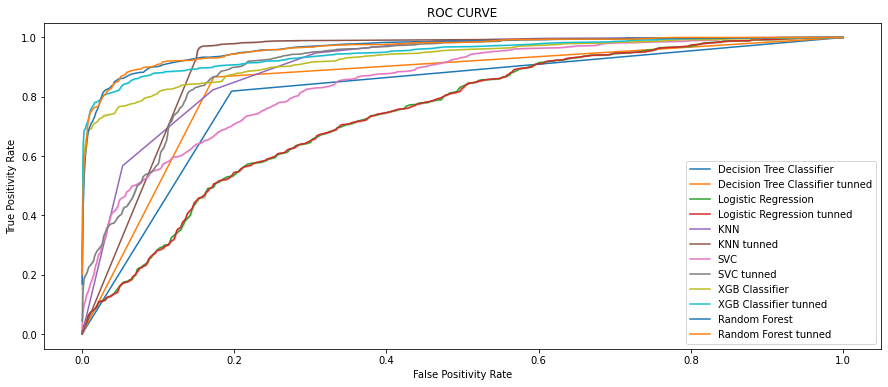

In [ ]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')